# Aprendizaje supervisado con Scikit-Learn

## Consideraciones previas

El documento `ipynb` mostrado a continuación utiliza el entorno **ks-sl** con la configuración guardada en el documento **environment.yml**.

### Instalación y activación del entorno

Sigue los siguientes pasos para crear el entorno:

**1. Activa Anaconda, si es que lo tenías desactivado. Activar Anaconda signifca que los ejecutables de conda estén en tu variable `$PATH`**

**2. Crea un nuevo entorno Anaconda:**

	```Shell
	$ conda env create -f environment.yml
	```
	
Si quieres usar una GPU porque tu portátil o entorno nube disponga de una, edita el fichero `environment.yml` y sustituye `tensorflow=2.0.0` por `tensorflow-gpu=2.0.0`. También deberías sustituir `tensorflow-serving-api=2.0.0` por `tensorflow-serving-api-gpu=2.0.0`.
	
**3. Activa el nuevo entorno que has creado:**

	```Shell
	$ conda activate ks-sl
	```

**3. Añade el nuevo entorno como kernel de Jupyter:**


	```Shell
	$ python -m ipykernel install --user --name=ks-sl
	```
	
Hemos utilizado un nombre personalizado distinto al nombre `python3` que los notebooks de Jupyter abrirán por defecto. Por ello, cada vez que abras un notebook en la lase, tendrás que seleccionar el Kernel correcto yendo a `Kernel > Change kernel...` en Jupyter y seleccionando el kernel `ks-sl` cada vez que abras un notebook nuevo de esta clase.

4. Antes de abrir cada sesión, recuerda ejecutar:

	```Shell
    $ cd <directorio donde están los cuadernos ipynb>
	$ conda env list
    $ conda activate ks-sl
    $ jupyter notebook
	```

5. Finalmente, en el Jupyter Notebook hay que asegurar en cada sesión que está activado el kernel ks-sl en la esquina superior derecha

#### Apagar Jupyter
Cuando hayas acabado con Jupyter, puedes cerrarlo sin más que pulsar `Ctrl + C` en la ventana de terminal en la que lo hayas abierto.

#### Desactivar el entorno

Si tienes que trabajar en otros materiales del curso y necesitas desactivar este entorno, no tienes más que introducir en tu terminal:

```Shell
$ conda deactivate
```

Para volver a activalo, puedes hacer `conda activate ks-sl`.

#### Eliminar el entorno

El entorno que has creado para estas clases puede serte útil si vas a basar tu trabajo fin de máster en alguna de las cosas que hemos visto en clase (Supervised Learning y Deep Learning). Si quieres eliminar el entorno una vez haya finalizado el máster para liberar tu portátil de configuración innecesaria, puedes seguir estos pasos:

1. Primero, asegúrate de que estás en el entorno correcto con `conda env list`. El entorno **`ks-sl`** debería aparecer en el listado y con un asterisco a su izquierda, que denota que está activo.
2. Desactiva el entorno con `conda deactivate`.
3. Finalmente, elimina el entorno haciendo	
	```Shell
	conda remove --name ks-sl --all
	```
4. Verifica que el entorno que acabas de borrar no aparece ya en la lista de entornos instalados haciendo un `conda env list`.

### Clonando el repositorio con el que se trabajará
El repositorio que contiene todos los datos se encuentra en **Gitlab**.

gitlab.com/Sh3llD00m/kschool-supervised-learning.git

Para clonarlo, hay que escribir en la Shell, en el directorio que queremos copiarlo:

```Shell
$ git clone gitlab.com/Sh3llD00m/kschool-supervised-learning.git
```

Para interconectarlo con nuestro repositorio Github, hay que crear un repo en Github. No hace falta inicializarlo con un `README.md`.  Por convención, se va a asumir que habéis llamado a tu proyecto my-ks-sl y que vuestro usuario de GitHub se llama ks-student.

Con el siguiente código, se puede conectar con nuestro remoto:

```Shell
$ git remote add myremote https://github.com/ks-student/my-ks-sl
$ git remote -v #verificamos que teneis un nuevo remote
    > gitlab https://gitlab.com/Sh3llD00m/kschool-supervised-learning.git (fetch)
    > gitlab https://gitlab.com/Sh3llD00m/kschool-supervised-learning.git (push)
    > myremote https://github.com/ks-student/my-ks-sl (fetch)
    > myremote https://github.com/ks-student/my-ks-sl (push)
```

Ahora ya se puede utilizar el remote para subir cambios. Cada vez modificais un fichero podéis seguir la secuencia:

```Shell
$ git pull origin master 
$ git commit -a -m "New commit" #Anadimos los cambios a Git
$ git push myremote #Los subimos al nuevo remote
```

# Aprendizaje Supervisado con Scikit-Learn - Día 1

Antes que nada, vamos a comprobar las versiones de las diferentes librerías que vamos a estar utilizando a lo largo de las clases:

In [7]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.2
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 7.10.1
scikit-learn version: 0.21.3


Por último, vamos a desactivar los mensajes de advertencia *`DeprecationWarnings`*, ya que no afectan en nada al código ni nuestros objetivos formativos para las clases:

In [4]:
# Importamos un filtro de warnings
from warnings import simplefilter
# Ignoramos los DeprecationWarnings, en concreto el del módulo six.py
simplefilter(action='ignore', category=DeprecationWarning)

In [5]:
# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

## Lab 0 - Datasets de ejemplo

En esta clase se van a utilizar entre otros dos datasets de ejemplo. Los dos que se van a presentar a continuación pertenecen a la librería `mglearn`. Son:
- **Forge Dataset**. Que se utilizará para ejemplos de *clasificación supervisada*. Lo plotearemos con `mglearn.descrete_scatter` muy útil para presentar variables discretas ya agrupadas. Así, la X son las coordenadas de cada punto y la Y corresponde a sus etiquetas.
- **Dataset Wave**. Muy útil para regresión lineal.

### Forge Dataset

Text(0, 0.5, 'característica 2')

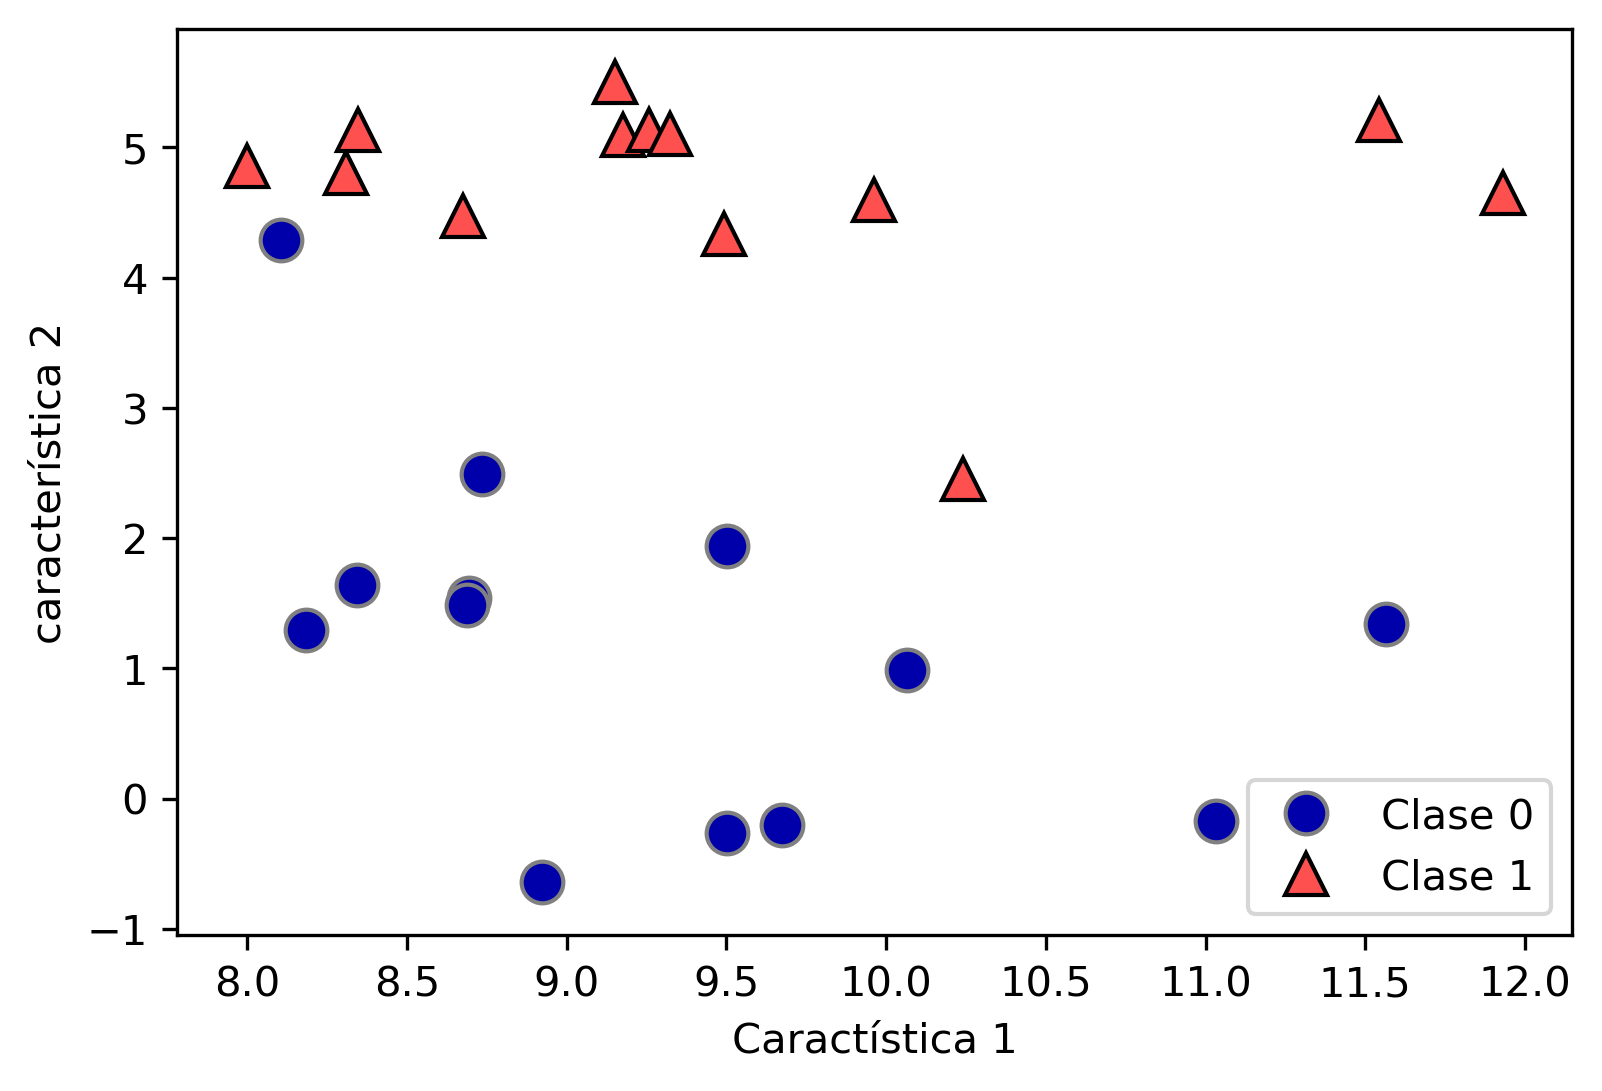

In [6]:
# Generamos un dataset
X, y = mglearn.datasets.make_forge() # Característica, Característica
# Lo pintamos
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Clase 0", "Clase 1"], loc=4)
plt.xlabel("Caractística 1")
plt.ylabel("característica 2")

Los elementos del dataset son de tipo **np.array**

In [7]:
print(f"The type of X is: {type(X)} and the type of y is {type(y)}")

The type of X is: <class 'numpy.ndarray'> and the type of y is <class 'numpy.ndarray'>


El dataset tiene 26 elementos:

In [11]:
print("X.shape:", X.shape[0])

X.shape: 26


### Dataset Wave

Utilizaremos otro dataset llamado *Wave* para los ejemplos básicos de regresión supervisada. Igualmente, utilizamos un dataset muy sencillo, de pocas dimensiones que nos ayude a visualizar y a desarrollar una intuición sobre nuestros modelos.

Text(0, 0.5, 'Objetivo')

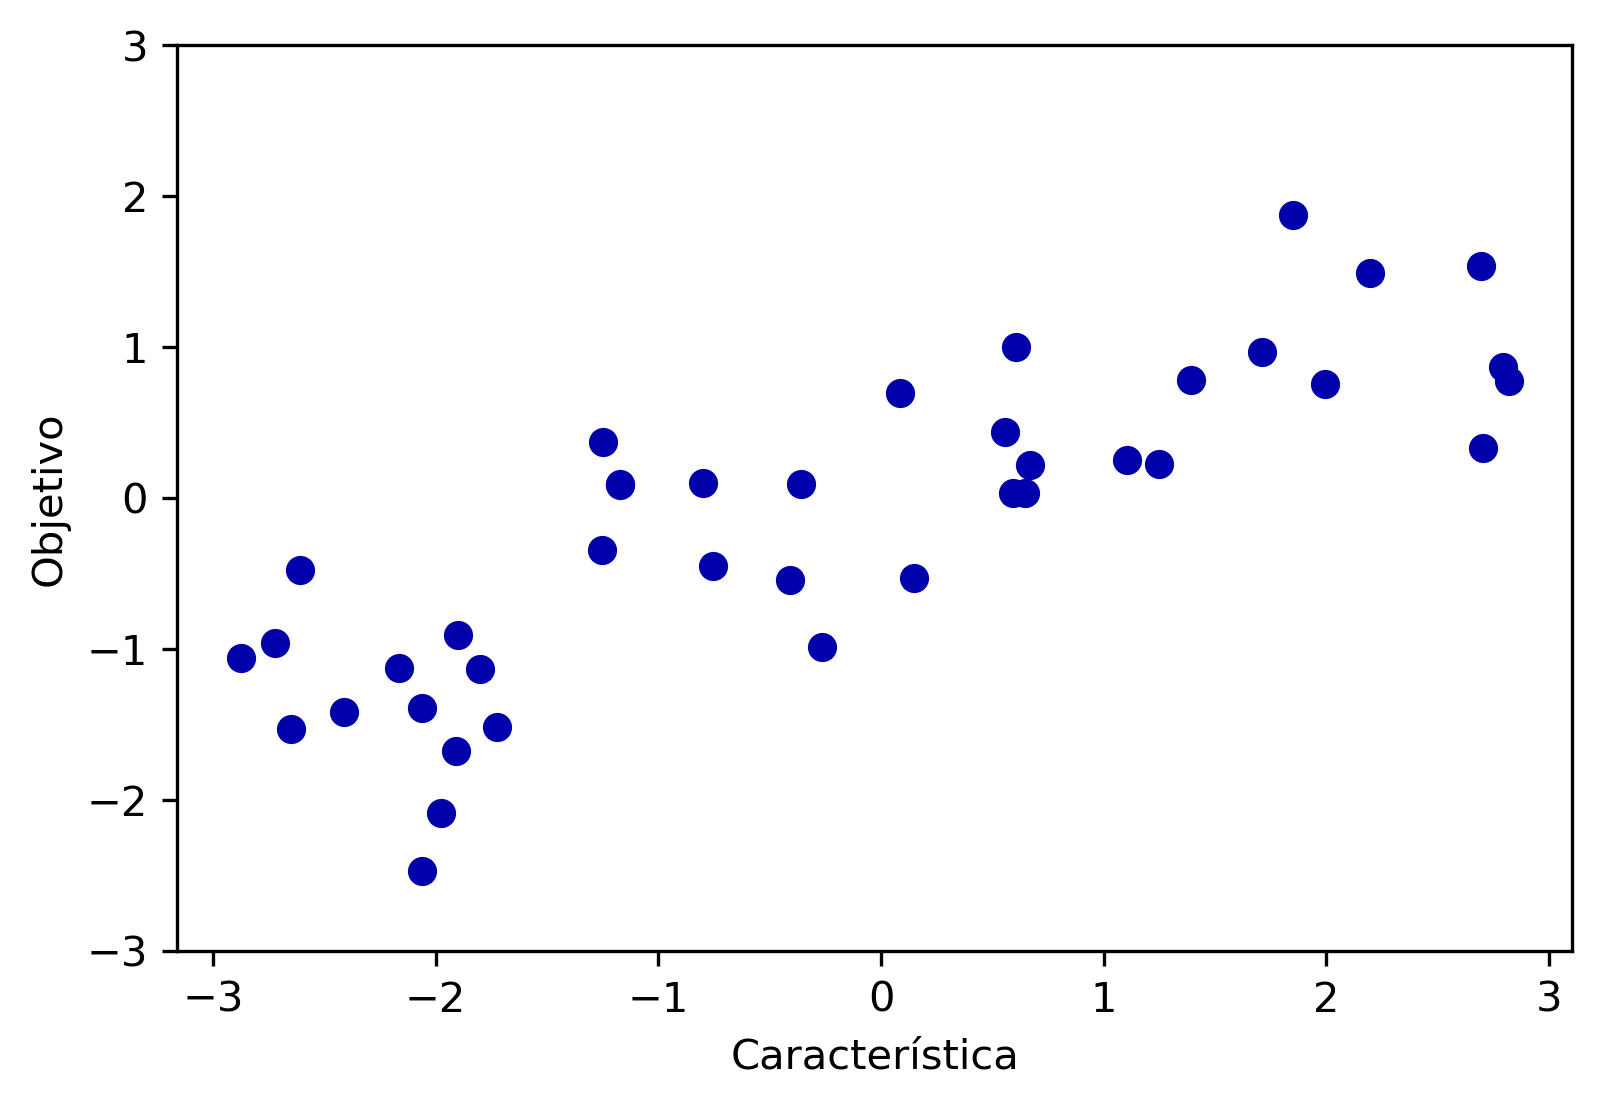

In [12]:
# Generamos un dataset
X, y = mglearn.datasets.make_wave(n_samples=40) #Inputs, Outputs
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Característica")
plt.ylabel("Objetivo")

### Otros datasets: sklearn

Scikit-Learn incluye un paquete llamado `sklearn.datasets` que embebe algunos datasets de aprendizaje de Machine Learning. Éstos se devuelven en un tipo `Bunch`, que no es más que un objeto tipo diccionario, pero con el añadido qde que se puede acceder a sus valores mediante la *dot notation*, donde los atributos interesantes son:

 - `data`: los datos para aprendizaje
 - `target`: las etiquetas de clasificación
 - `target_names`: los significados de las etiquetas
 - `feature_names`: la descripción de las características
 - `DESCR`: la descripción completa del dataset

Dos de los datasets embebidos de ejemplo que incluye Scikit-Learn y que usamos en clase se pueden cargar con los utilidades de carga de datasets `load_boston` y `load_breast_cancer`. Éstas utilidades son las que devuelven un objeto tipo bunch cuando son utilizadas, y con los atributos antes mencionados, la gestión de los datos del dataset es sencilla.

Si no obstante se prefieren utilizar dataframes de Pandas para la gestión de los diferentes datos del dataset, podemos hacer una conversión aprovechando dichos atributos y manejando debidamente el formato en el que debe crearse un DataFrame en Pandas, como se verá más adelante

In [13]:
help(sklearn.datasets)

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _svmlight_format
    base
    california_housing
    covtype
    kddcup99
    lfw
    mldata
    olivetti_faces
    openml
    rcv1
    samples_generator
    setup
    species_distributions
    svmlight_format
    tests (package)
    twenty_newsgroups

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str | None
            The path to scikit-learn data dir.
    
    dump_svmlight_file(X, y, f, zero_based=True, comment=None, query_id=None, multilabel=False)
        Dump the dataset in svmlight / libsvm file format.
        
        This format is a text-based format, wit

Mediante `keys` se puede ver qué se puede hacer con los datasets:

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [23]:
print(load_breast_cancer().DESCR)
#También válido print(load_breast_cancer().["DESCR"]

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Con `filename` podemos acceder a su ubicación:

In [27]:
load_breast_cancer().filename

'/home/dsc/anaconda3/envs/ks-sl/lib/python3.7/site-packages/sklearn/datasets/data/breast_cancer.csv'

In [29]:
type(load_breast_cancer())

sklearn.utils.Bunch

- Mediante `data` podemos acceder al conjunto de datos, que son de tipo `np.array`, así que tienen los métodos y atributos de los `arrays`.

In [30]:
cancer_data = cancer.data
type(cancer_data)

numpy.ndarray

In [31]:
print("Dimensiones del dataset:", cancer.data.shape)

Dimensiones del dataset: (569, 30)


- Cada tumor está etiquetado como *benigno* o *maligno*, y el objetivo será aprender a predecir en base a ciertas características del tejido si un tumor es benigno o maligno.
- Mediante `target_names` podemos acceder a sus etiquetas y mediante `target` podemos acceder al valor que toman sus etiquetas.

In [32]:
print("Conteo de muestras por clase:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Conteo de muestras por clase:
 {'malignant': 212, 'benign': 357}


In [33]:
print("Nombres de las características:\n", cancer.feature_names)

Nombres de las características:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- Se pueden usar todas ellas para constuir un dataset de estilo pandas, que nos ayudaría para realizar un examen exploratorio

In [34]:
cancer_df = pd.DataFrame(np.column_stack((cancer.data, cancer.target)),
                         columns = np.append(cancer.feature_names,['TARGET']))
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  ...  \
0        17.99         10.38          122.80     1001.0  ...   
1        20.57         17.77          132.90     1326.0  ...   
2        19.69         21.25          130.00     1203.0  ...   
3        11.42         20.38           77.58      386.1  ...   
4        20.29         14.34          135.10     1297.0  ...   

   worst concave points  worst symmetry  worst fractal dimension  TARGET  
0                  0.27            0.46                     0.12     0.0  
1                  0.19            0.28                     0.09     0.0  
2                  0.24            0.36                     0.09     0.0  
3                  0.26            0.66                     0.17     0.0  
4                  0.16            0.24                     0.08     0.0  

[5 rows x 31 columns]

In [35]:
cancer_df.describe()

mean radius  mean texture  mean perimeter  mean area  ...  \
count       569.00        569.00          569.00     569.00  ...   
mean         14.13         19.29           91.97     654.89  ...   
std           3.52          4.30           24.30     351.91  ...   
min           6.98          9.71           43.79     143.50  ...   
25%          11.70         16.17           75.17     420.30  ...   
50%          13.37         18.84           86.24     551.10  ...   
75%          15.78         21.80          104.10     782.70  ...   
max          28.11         39.28          188.50    2501.00  ...   

       worst concave points  worst symmetry  worst fractal dimension  TARGET  
count                569.00          569.00                   569.00  569.00  
mean                   0.11            0.29                     0.08    0.63  
std                    0.07            0.06                     0.02    0.48  
min                    0.00            0.16                     0.06    0.00  
25%                    0.06            0.25                     0.07    0.00  
50%                    0.10            0.28                     0.08    1.00  
75%                    0.16            0.32                     0.09    1.00  
max                    0.29            0.66                     0.21    1.00  

[8 rows x 31 columns]

#### Otro ejemplo real: Boston Housing Dataset
El objetivo de este dataset es predecir el valor medio de las casas en varios barrios de Boston en la década de los '70 usando información como la tasa de criminalidad, proximidad al río Charles, acceso a autovías, etc.

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


A efectos de utilizar este dataset, es mejor complementarlo considerando no sólo las 13 características iniciales, sino todos los productos entre características (llamados también *interacciones*). La generación de interacciones la haremos incrementando el grado polinómico del dataset con el transformador de Scikit Learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Además, modificaremos la escala de los datos para uniformizarla y poder utilizar el concepto de medida de los datos correctamente gracias al preprocesador [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de Scikit-Learn.

Estos escalados se realizan porque hay técnicas de aprendizaje supervisado, como se verá, que son muy susceptibles a las distancias de los datos, por lo que es necesario tener los datos en una misma escala para poder obtener buenos resultados.

El incluir características derivadas como estas se llama **Ingeniería de características**. El dataset ampliado puede cargarse gracias a la función `load_extended_boston`.

In [40]:
# Definimos una función en Python para encapsular la ingeniería de características que vamos a realizar sobre el dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Creamos una función llamada "extended" porque incluirá las interacciones en este conjunto de datos
def load_extended_boston():
    boston = load_boston()
    X = boston.data
    # Aplicamos un MinMaxScaler para escalar las características bajo un mismo criterio
    X = MinMaxScaler().fit_transform(boston.data)
    # Finalmente, generamos interacciones entre las diferentes características.
    # El bias no es otra cosa que el intercepto.
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

Como se puede ver, se han pasado de 13 características iniciales o Features a 104.

SIn embargo, estás técnicas deben realizarse después del análisis exploratorio de los datos

In [41]:
X, y = load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## Un poco de teoría: Análisis Supervisado vs Análisis No Supervisado

El aprendizaje supervisado se diferencia del aprendizaje no supervisado en los siguientes puntos:
   - En el **aprendizaje supervisado** tenemos conocimiento previo de los valores de salida (*labels* o etiquetas)
   - El **objetivo** es encontrar función que, dado un dataset de entrada y unas salidas, aproxime de la mejor forma la relación existente entre ellos.
    
Se distinguen los siguientes tipos de **algoritmos supervisados**:
- **Clasificación**. Puede ser binaria o multiclase.
- **Regresión**. Busca la predicción de un número continuo.

![ML](Img/ML_types.JPG)

### ¿Qué es aprendizaje supervisado?
Es un método de aprendizaje que aprende una función a partir de un conjunto de muestras cuya variable de salida o *output* (`y`) ya se encuentra etiquetada e intenta predecir para ella valores futuros.

Como se acaba de comentar, puede intentar predecir valores continuos (**regresión**) o valores discretos (**clasificación**).

Los métodos de aprendizaje supervisado utilizan **funciones de coste**, que son una medida de lo bien que el modelo se ajusta a un problema. Es decir, comparan el valor real o `y` con el valor predicho `ŷ`.

En los modelos de clasificación se utiliza la *entropía cruzada* como función de coste, mientras que en los modelos de regresión se utiliza el *sumatorio del error cuadrático*.
![lf](Img/loss_function.JPG)

#### ¿Cómo maximizar la función de coste?
Derivando, o lo que es lo mismo, midiendo la pendiente
![lf](Img/loss_function_2.JPG)

#### Algoritmo general de minimización de gradiente
![lf](Img/loss_function_3.JPG)

### Los problemas de *underfitting* y *overfitting*
Relacionado con la función de coste, siemrpe buscaremos que nuestro modelo sea generalizable. Esto es, que el modelo que hayamos creado sea extrapolable a casos futuros.

En este sentido, encontramos los problemas de **overfitting** y **underfitting**.

Se dice que un modelo está *overfit* cuando no generaliza demasiado bien. Un síntoma claro de *overfitting* es que el modelo funciona demasiado bien con el training set, pero no con el *test set*.

Se dice que un modelo está *underfit* cuando predice mal, incluso en el *training set*, y por el contrario generaliza demasiado.

![over_vs_under](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

### Objetivo: el punto medio
El objetivo es encontrar el punto medio entre el *training set* y el *test set*: un modelo que generalice y que se ajuste bien a nuestro set, para que tenga buena capacidad predictiva.
![over_vs_under](Img/under_vs_over.JPG)

## 1. K-vecinos o *k-Nearest-Neighbors* (k-NN)
K-vecinos es un método de aprendizaje supervisado, de **clasificación** y **no paramétrico**. Sus características son:
- Es un método de **clasificación**, aunque hay una variante de **regresión**.
- Es un método **no paramétrico**.
- Intenta clasificar los elementos en base al número de vecinos más cercano, que se ha indicado de antemano.
    - Generalmente, un número adecuado de vecinos es la raíz cuadrada de *features* o características y suele funcionar bien con 3 o 5.
- Para clasificar, utiliza por defecto la *métrica de Minkowski* o *distancia euclídea*, aunque existen otras utilizadas como la *distancia Manhattan*
- Es, por lo tanto, muy susceptible a la distancia y conviene escalar variables.
- Es un método fácil de comprender, con training rápido pero lento para grandes datasets, aunque se usa menos que la regresión lineal.
- Funciona bien con **datasets pequeños**

![knn](Img/k-vecinos.JPG)
![knn](Img/k-vecinos_2.JPG)

### Ejemplo de k-vecinos o k-NN

Usemos para empezar nuestro dataset *Forge*. Primero, separamos los datos en un set de training y de test para poder evaluar el rendimiento del modelo:

In [48]:
#Importamos sklearn.model_selection para hacer el split entre 'training set' y 'test set'
#El 'traing_set' permitirá entrenar el modelo y en el 'test set' se evaluará la precisión del modelo
#Importamos también K-vecinos
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Se cargan los datos
X, y = mglearn.datasets.make_forge()

#Se separa entre training set y test set
#Random_state permite que la selección no sea aleatoria y comparar resultados con otras personas
#Cuando elaboremos modelos, generalmente NO estableceremos un random_state para evitar tomar decisiones forzando alcanzar unos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Indicamos que queremos un classifier K-vecinos, de momento con 3 vecinos
clf = KNeighborsClassifier(n_neighbors=3)

#Hacemos un fit del modelo de entrenamiento
clf.fit(X_train, y_train)

#Realizamos predicciones
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))

#Analizamos la precisión del modelo
print("Precisión training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Precisión test set: {:.2f}".format(clf.score(X_test, y_test)))

Predicciones sobre el juego de pruebas: [1 0 1 0 1 0 0]
Precisión training set: 0.95
Precisión test set: 0.86


### Análisis de KNeighborsClassifier

Se puede ilustrar la predicción para todos los puntos en el plano $xy$. Se usan colores en el plano de acuero con la clase predicha para el punto en cuestión. Eso permite ver la frontera de decisión y desarrollar una cierta intuición sobre el modelo en función del número de vecinos.

En el siguiente código, se generan gráficas para valores de vecinos de 1, 3 y 9:

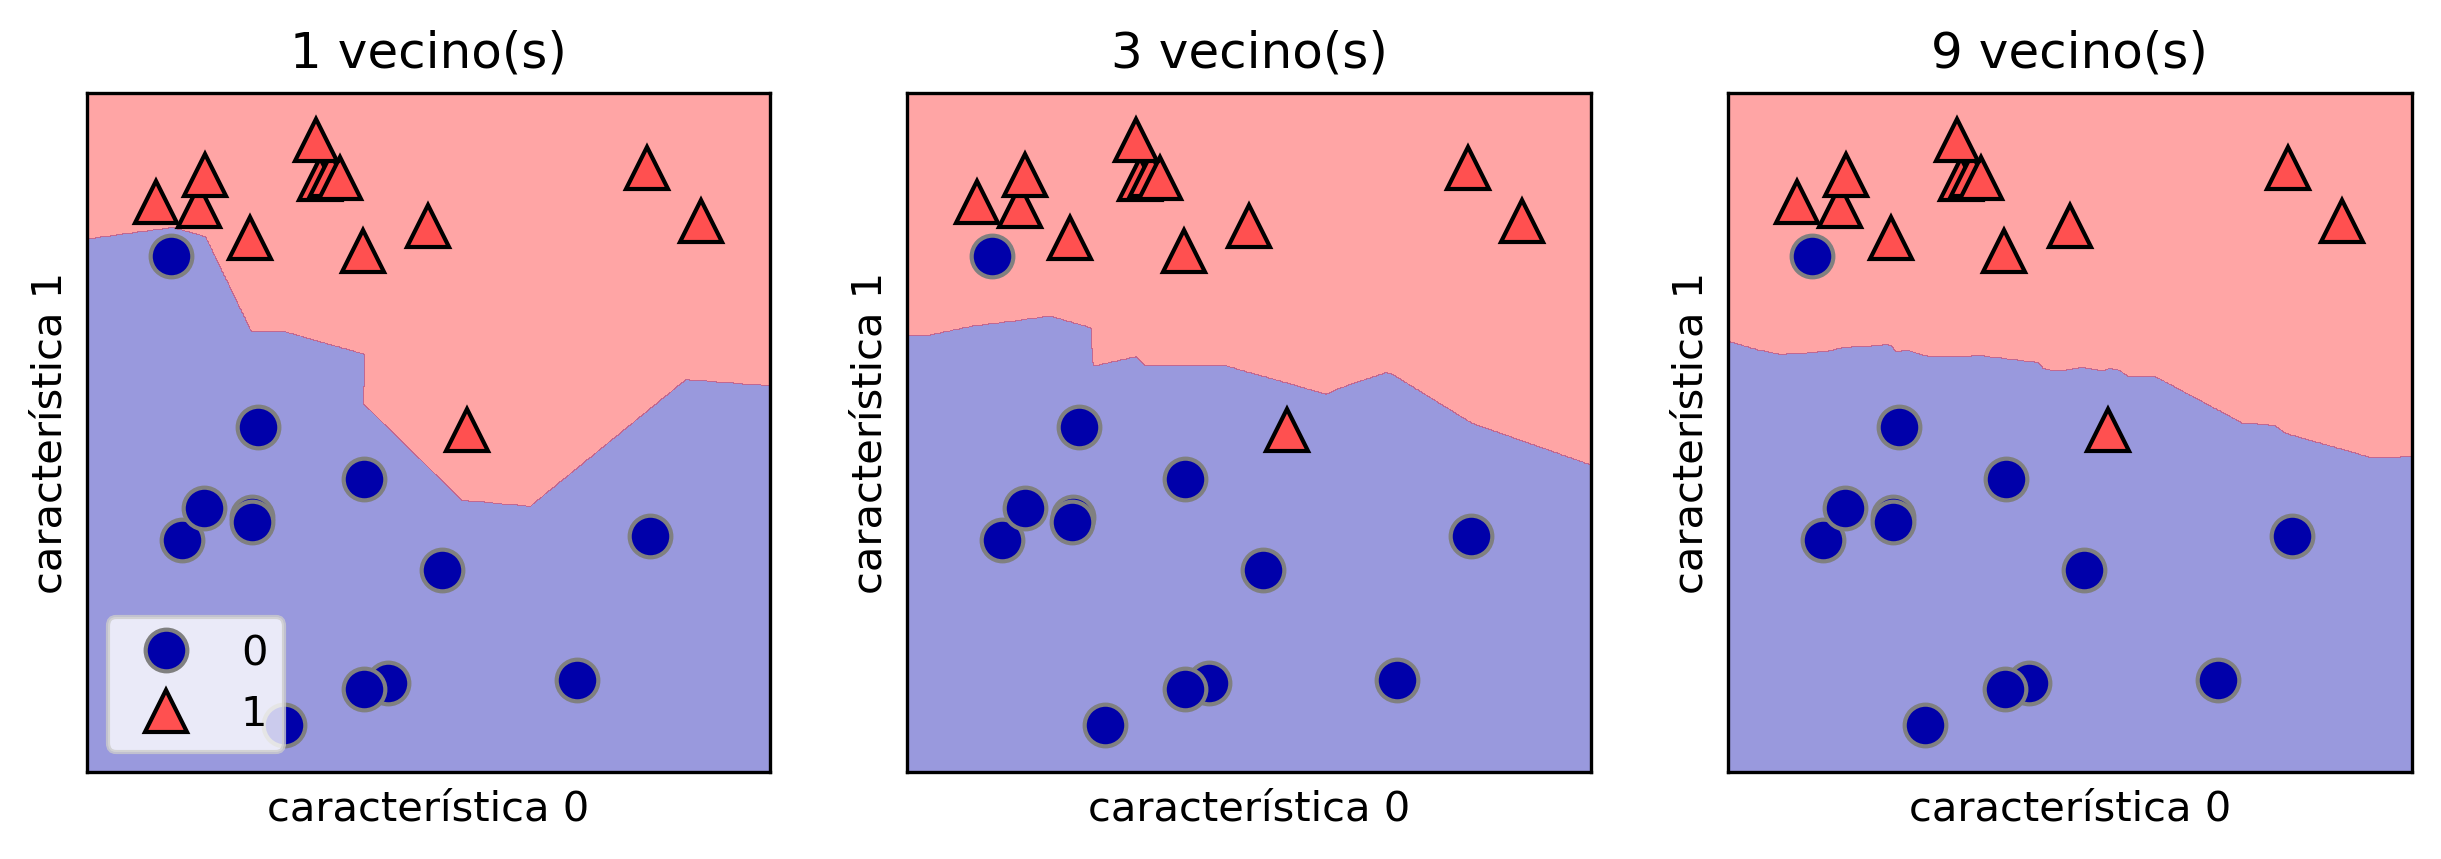

In [49]:
#Dibujamos tres plots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

#Indicamos en qué plot va a ir cada k-vecinos
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

**Pregunta**: ¿qué diferencias observas en la frontera de clasificación y qué puede decirse del uso de varios vecinos frente al uso de uno sólo?

<font color='grey'>
Un sólo vecino hace que la frontera de decisión se ajuste mucho a los datos de entrenamiento __(overfitting)__. Si se incrementa el número de vecinos, la frontera se suaviza.
    
Esto implica que con un número bajo de vecinos, el modelo es más complejo, y con un número alto, menos. 
    
Yendo a un extremo, si $k=n$, donde n es el número de muestras del juego de entrenamiento, todos los puntos tendrían el mismo número de vecinos y la predicción sería siempre la misma: la clase más frecuente en el juego de entrenamiento. Es decir, si k=26, es decir k=n, agruparía a todos los elementos en la clase modal, la que más se repite.

Vamos a evaluar ahora la conexión entre complejidad y generalización usando un dataset real (Breast Cancer Dataset):

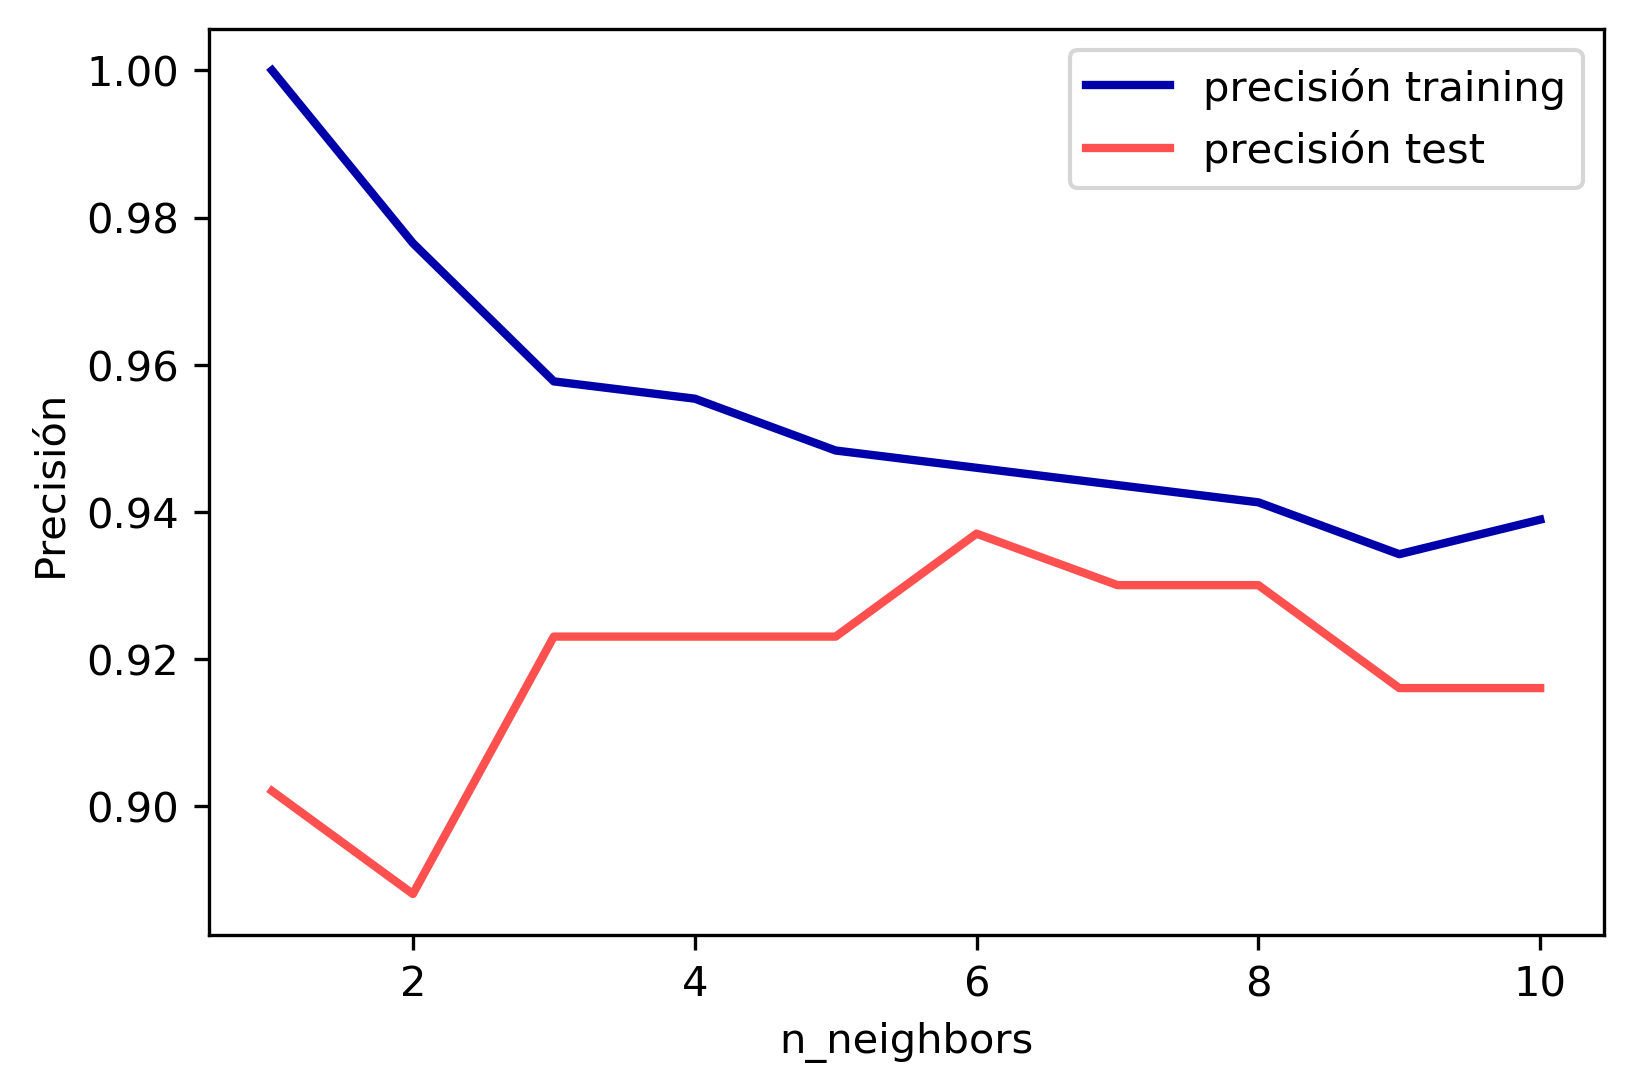

In [52]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train, y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,
         training_accuracy, label="precisión training")
plt.plot(neighbors_settings, test_accuracy, label="precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()

¿Reconoces las características de las curvas  de complejidad frente a precisión que vimos al principio? (Nótese que por el eje de ordenadas, la curva correspondiente al training set está invertida)

**¿Qué numero de vecinos es el mejor para obtener el mejor rendimiento del modelo?**

<font color='grey'>
Como puede verse en la gráfica, obtenemos el mejor rendimiento en test para k=6, lo que nos da también la precisión que obtenemos en el dataset de training.

### Regresión k-NN
También hay una variante de regresión de k-Nearest Neighbors. De nuevo, comparemos el uso de un solo vecino frente a tres para ver la variación de las predicciones:

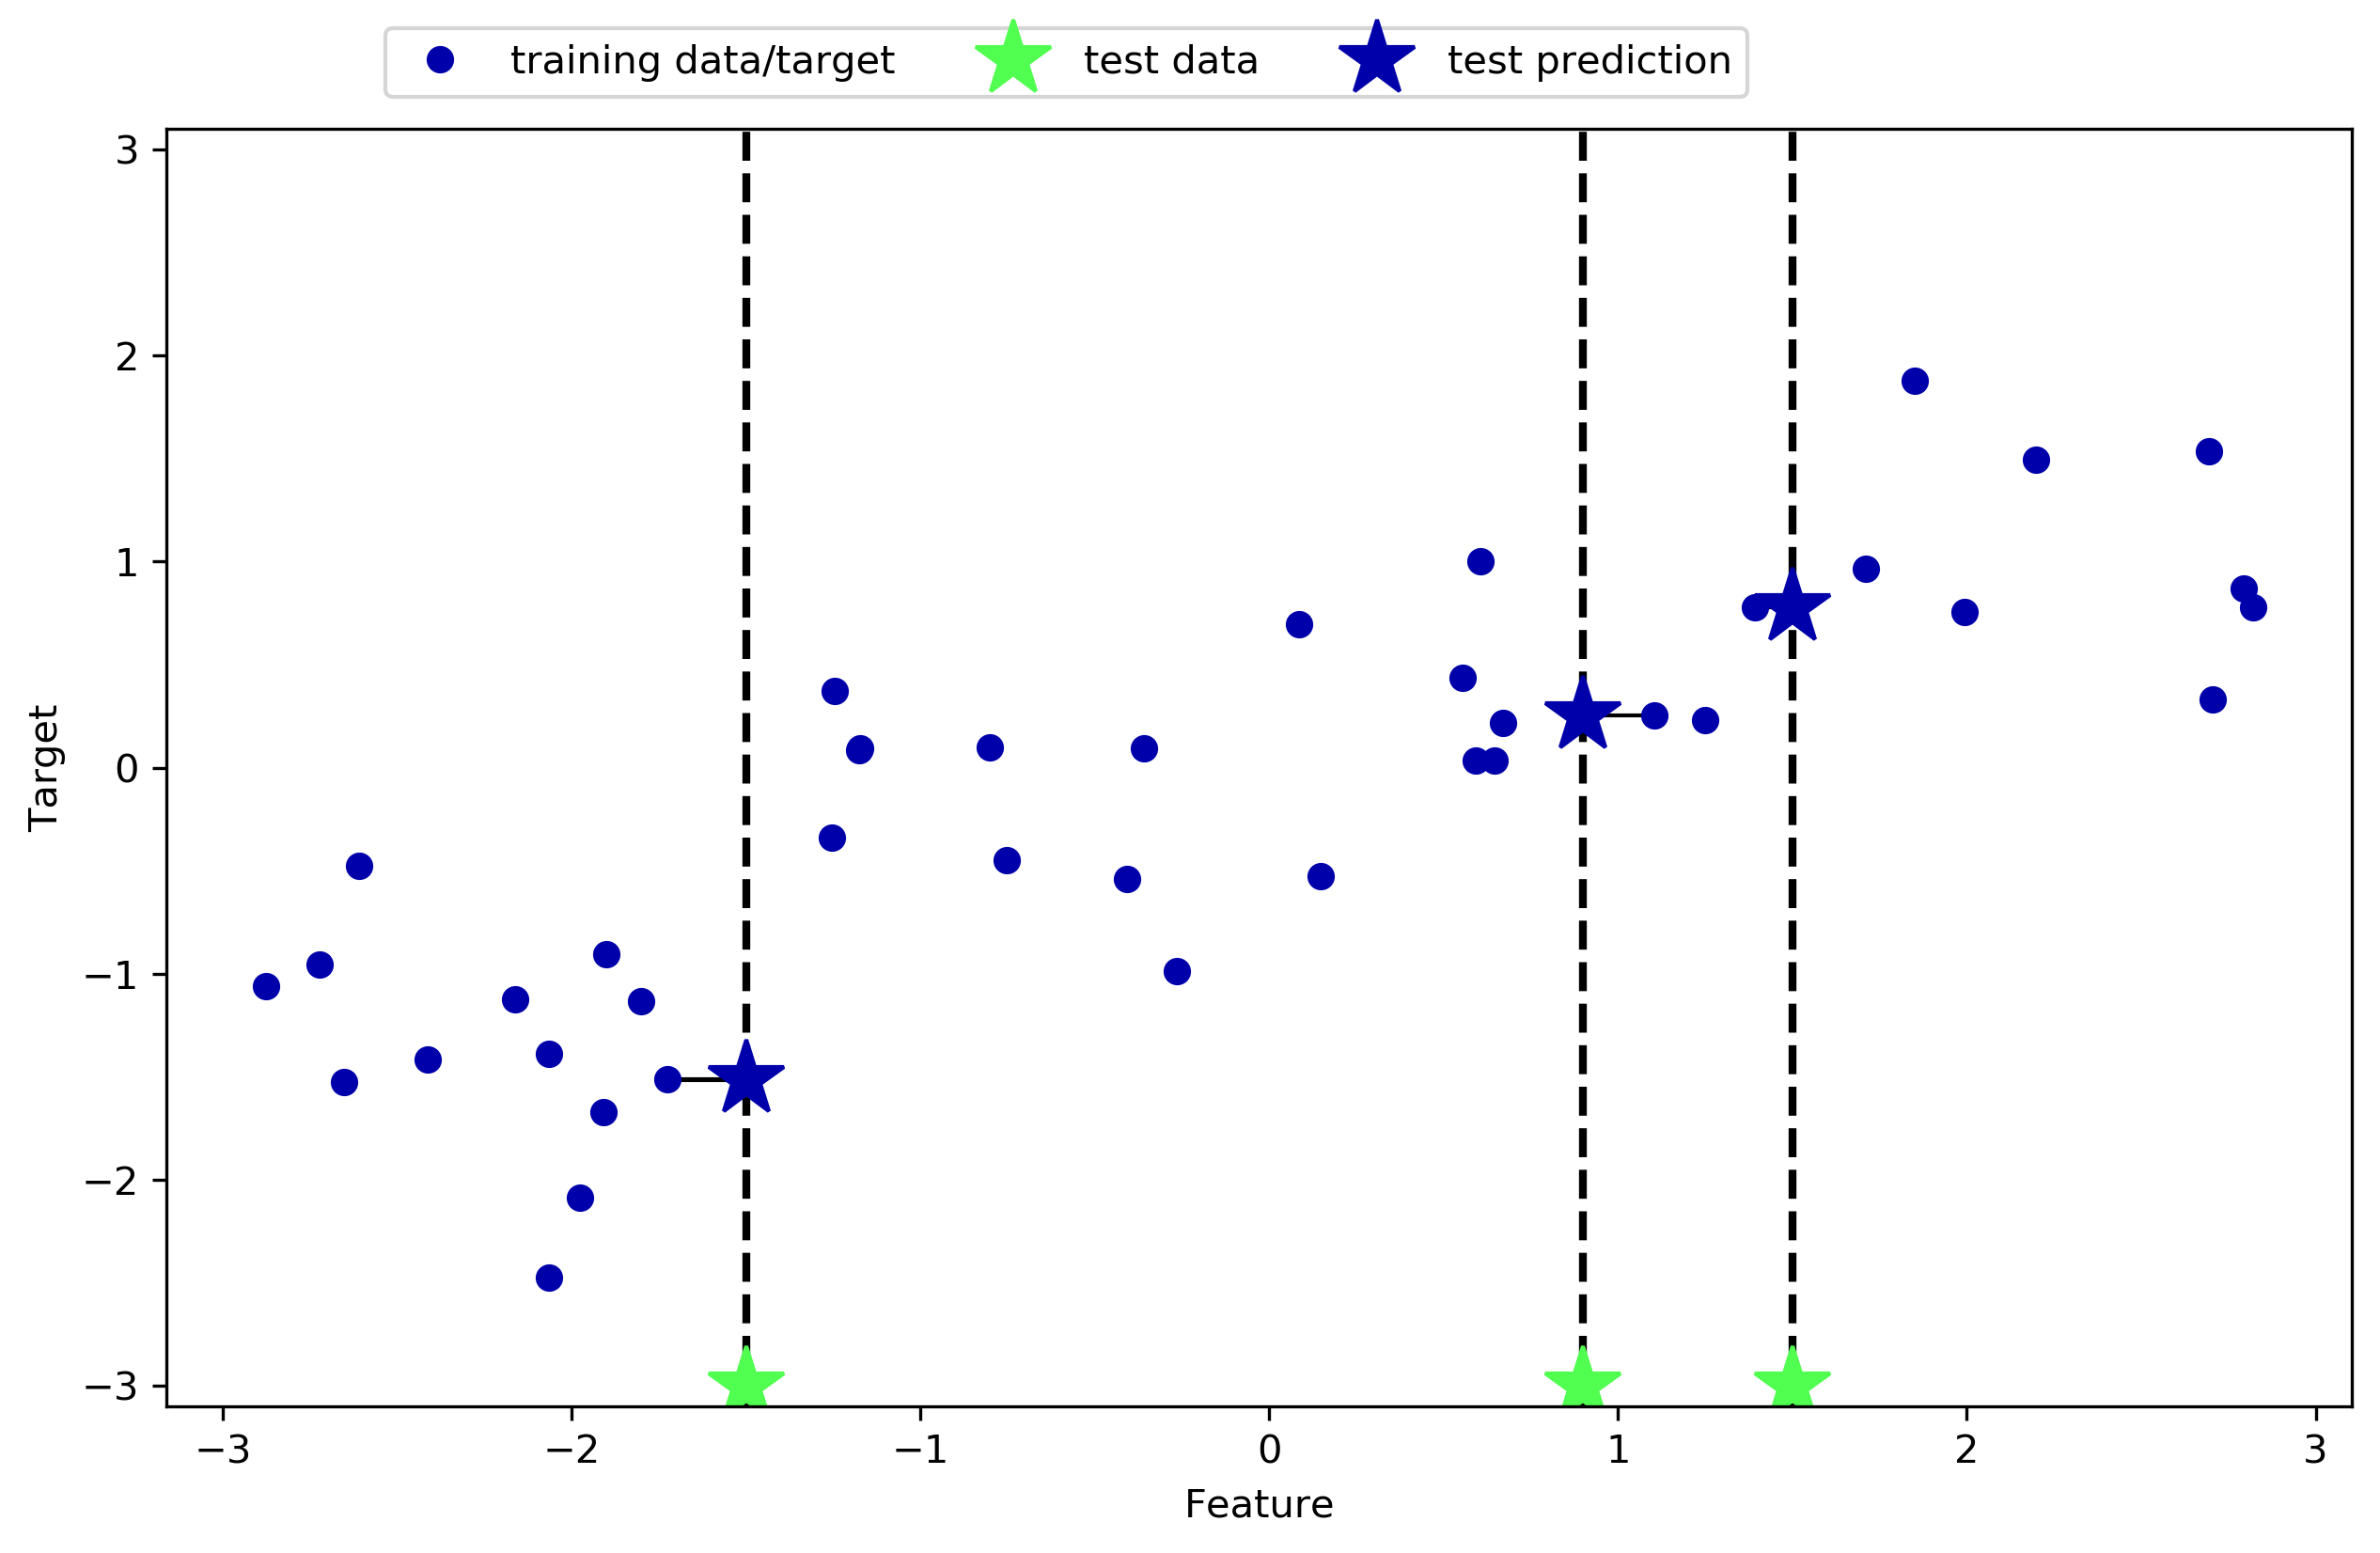

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

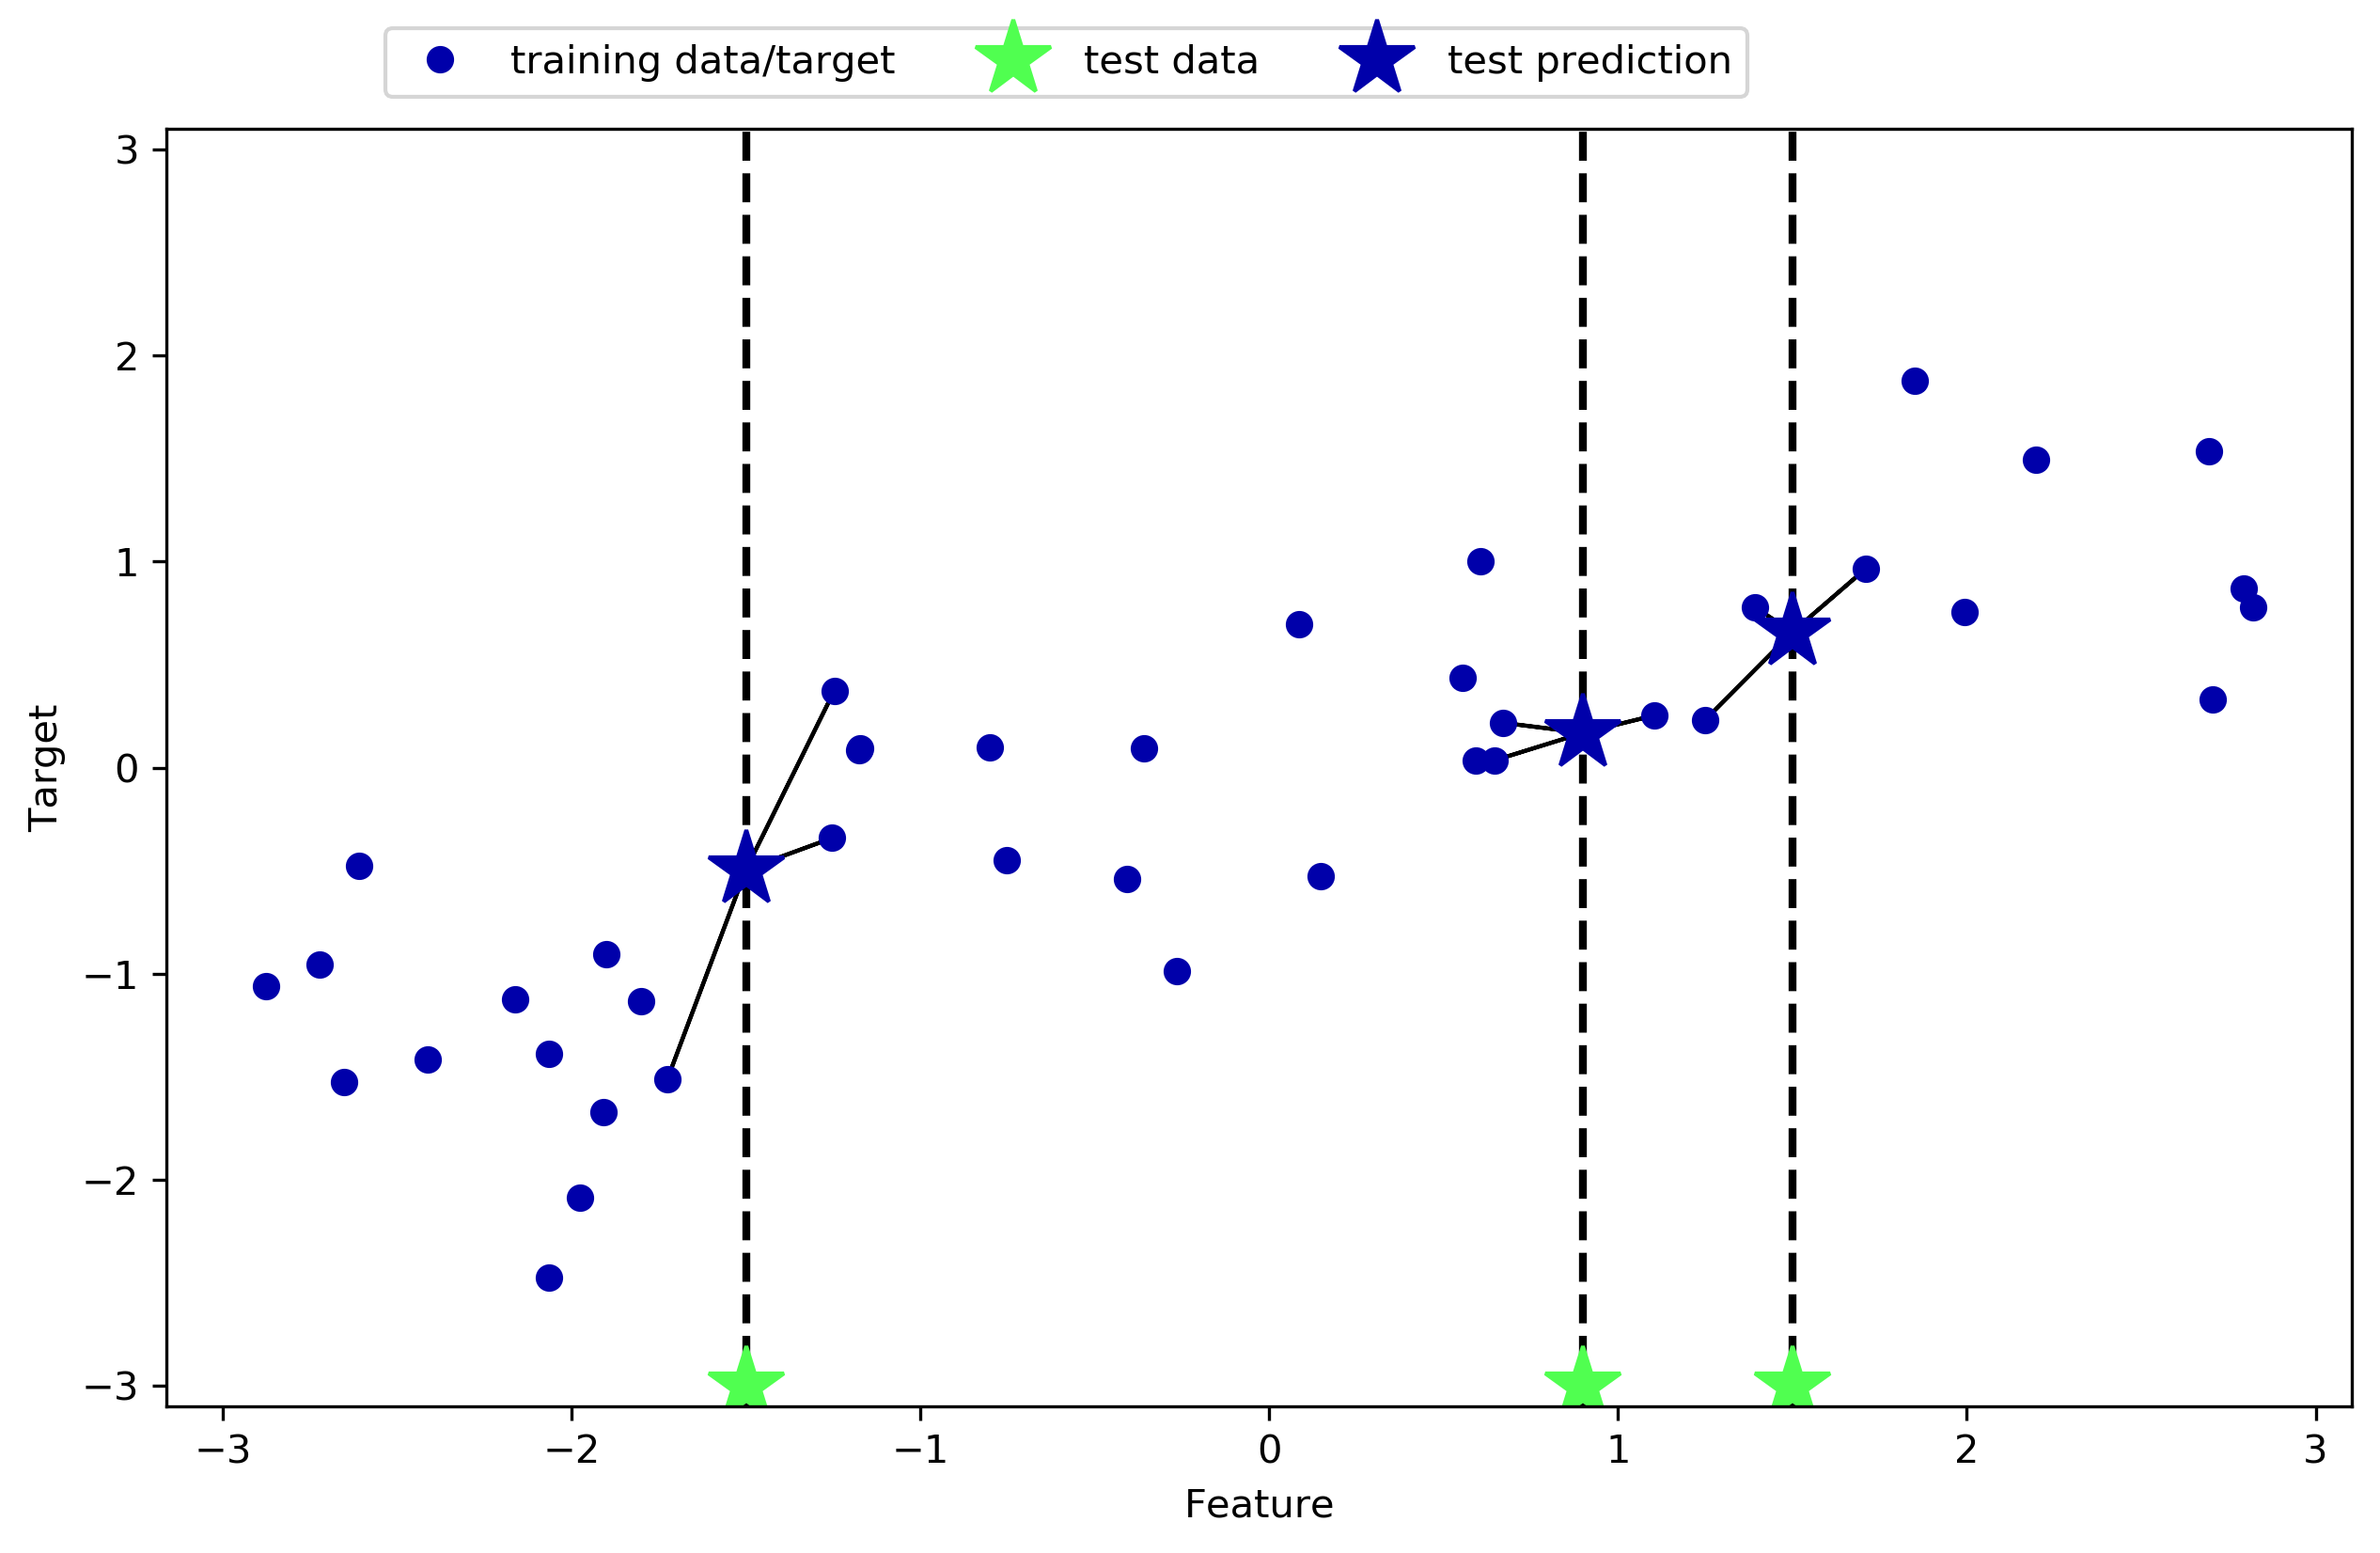

In [54]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

La implementación de kNN para regresión en Scikit-learn es muy parecida a su equivalente de clasificación. Lo hacemos aquí para el *Wave* dataset:

In [57]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Ajustamos el modelo usando los objetivo y datos de training
reg.fit(X_train, y_train)

print("Predicciones sobre el test set:\n", reg.predict(X_test))
print("Coeficiente de determinación del training set: {:.2f}".format(reg.score(X_train, y_train)))
print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test, y_test)))

Predicciones sobre el test set:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
Coeficiente de determinación del training set: 0.82
Coeficiente de determinación del test set: 0.83


### Análisis de KNeighborsRegressor

Para establecer el análisis, vamos a hacer una predicción de todos los posibles valores que puede tener la característica $x$ (donde $x\in[1,3000]$), y para ello creamos un dataset que tenga todos los puntos en una línea:

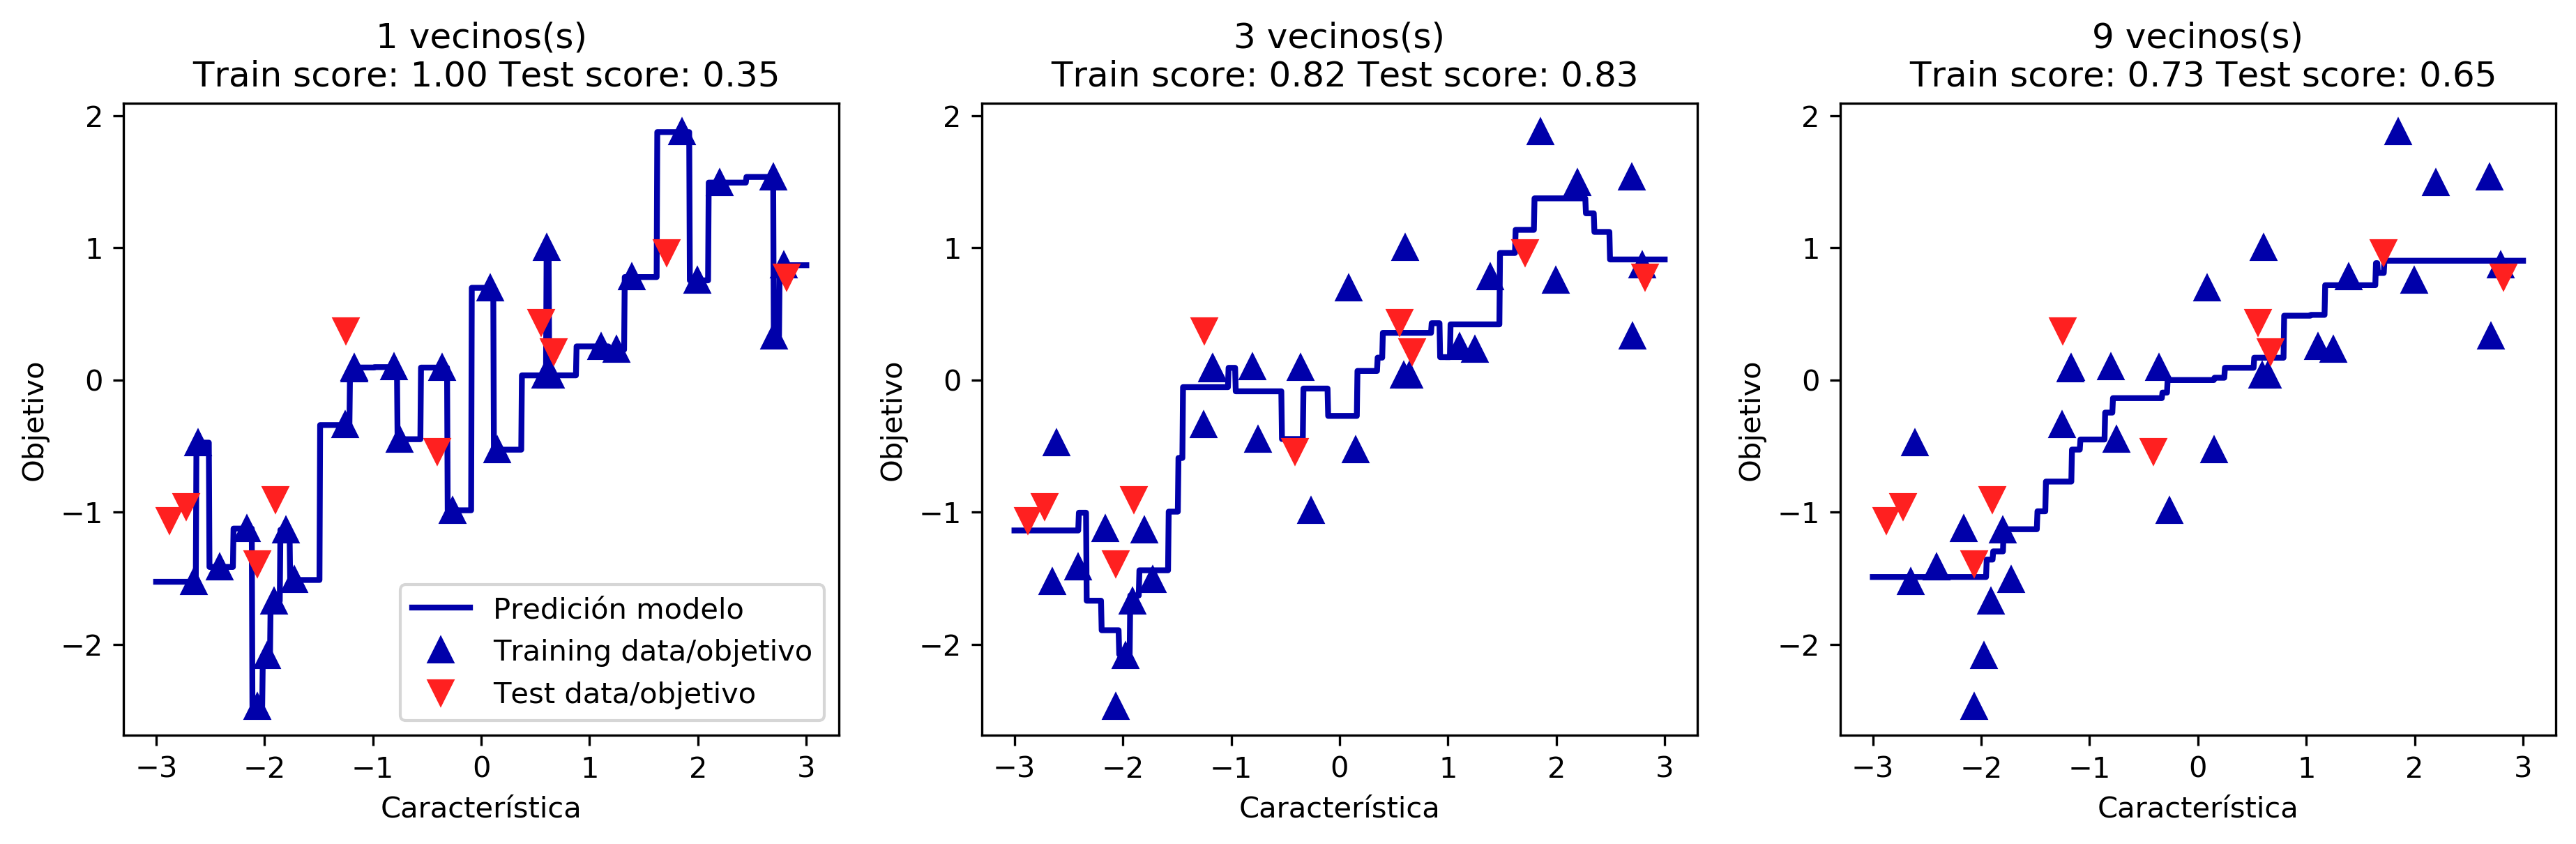

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Crear 1,000 data points, igualmente espaciados entre -3 y 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecinos(s)\n Train score: {:.2f} Test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
axes[0].legend(["Predición modelo", "Training data/objetivo",
                "Test data/objetivo"], loc="best")

Como ejercicio adicional con kNNs, ábrase el fichero [kNNs-Exercise.ipynb](kNNs-Exercise.ipynb).

##  Modelos lineales de regresión
La regresión lineal aproxima la relación entre variables de entrada (`X`) y la variable objetivo (`y`) mediante un hiperplano.
- Es un modelo simple pero poderoso y muy utilizado.
- Devuelve una recta, en una dimesión.
- Se utiliza para datasets grandes

Distinguimos entre:
- Modelos lineales de regresión:
    - **OLS**
    - **Ridge (L2)**
    - **Lasso (L1)**
    - **ElasticNet (L1 | L2)**
- Modelos lineales de clasificación:
    - **Regresión Logística**
    - **Support Vector Classifier (SVC)**
    

Su forma general es:

\begin{align*}
ŷ = w0 · x0 + w1 · x1 + ... + wp ·xp
\end{align*}

![linear_reg](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1280px-Linear_regression.svg.png)

A continuación, se muestra el gráfico del ajuste por regresión lineal de los datos del dataset *Wave*. Lo mostramos para adelantar la discusión teórica sobre el modelo, más abajo aprenderemos cómo entrenar modelos lineales.

w[0]: 0.393906  b: -0.031804


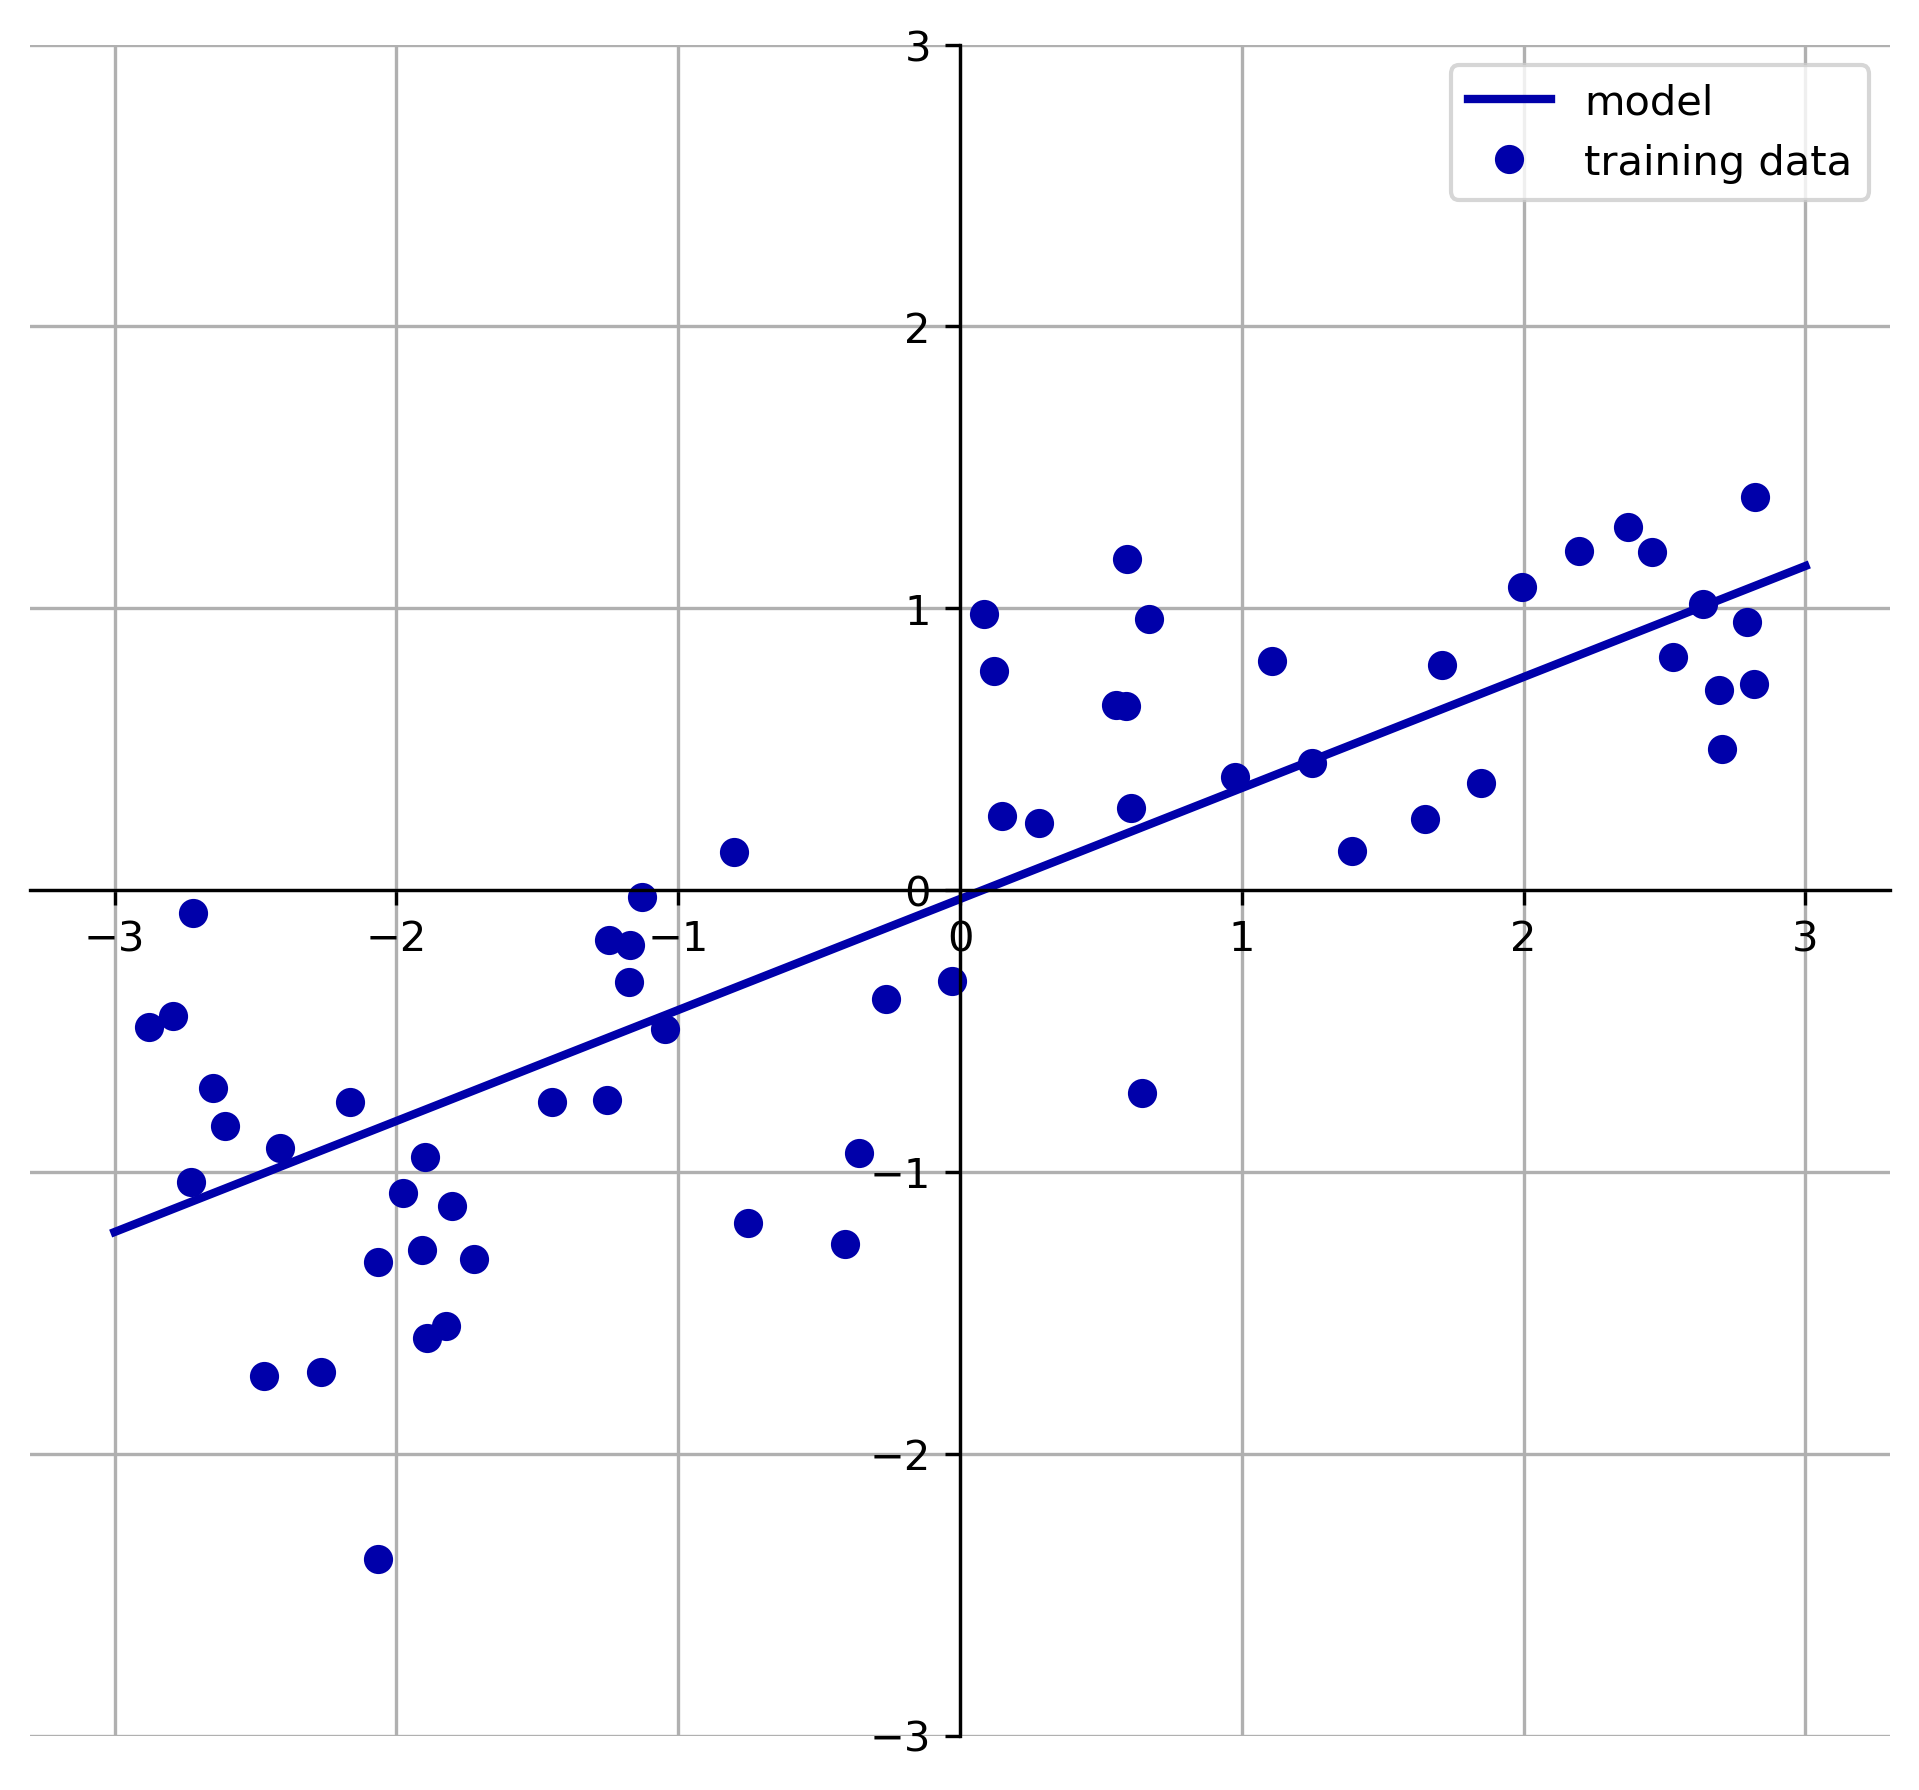

In [4]:
mglearn.plots.plot_linear_regression_wave()

Se puede ver que el corte de la línea coincide con $b$, y que la pendiente es $w_0$. Si se compara esta recta con lo que hemos pintado previamente para el regresor kNN, una línea parece una predicción demasiado restrictiva y que el detalle de los datos se pierde. En parte es cierto, y es una asunción muy fuerte el suponer que el objetivo es una combinación lineal de características.

Pero no nos dejemos engañar por la visión unidimensional del modelo. **Para datasets con muchas características** los modelos lineales pueden ser muy potentes.

Hay diferentes modelos lineales para la regresión. La diferencia está en:

  - cómo se aprenden $w$ y $b$ a partir de los datos de entrenamiento
  - cómo se controla la complejidad del modelo.

### Regresión lineal, alias Ordinary Least Squares (OLS)

La regresión lineal OLS es el método más simple y clásico de regresión lineal. Se trata de buscar los parámetros $w$ (también llamado pesos o coeficientes) y $b$ (también llamado *offset* o *intercept*) que minimicen el error cuadrático medio entre predicción y objetivo. No tiene más parámetros, lo que implica sencillez, pero también menos capacidad para controlar la complejidad del modelo.

Éste es el código que produce la gráfica que aparece más arriba:

In [5]:
#Se importa sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Hacemos un dataset tipo wave con 60 muestras
X, y = mglearn.datasets.make_wave(n_samples=60)

# Hacemos el split, con un random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Por último, instanciamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

#Scikit-learn almacena siempre los datos derivados del entrenamiento de un modelo en atributos que terminan en guión bajo. 
#En este caso, podemos consultar los pesos y el corte a través de las variables `coef_` y `intercept_`:
print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

#Se muestra el rendimiento del test a través de $R{2}$:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_:  [0.39390555]
lr.intercept_:  -0.03180434302675973
Training set score: 0.67
Test set score: 0.66


**¿Qué significa esto?**

El $R^2$ de test no es demasiado bueno:estamos haciendo *underfitting*. 

SIn embargo, nuestro dataset tiene solamente una característica y 60 muestras, a priori no se puede hacer mucho con él. Generalmente para datasets tan pequeños no se suelen utilizar regresiones lineales, sino árboles de decisión.

**Ejercicio**

Veamos cómo se comporta una OLS sobre un dataset como Boston Housing, que tiene mayor dimensionalidad (106 características), ya que extendimos su número de características creando interacciones. La manera de hacerlo es igual que en una dimensión:

In [12]:
# Cargamos el dataset con la herramienta de carga de Scikit-Learn
from sklearn.datasets import load_boston

# Mediante load_extended_boston escalo y genero interacciones entre las características de manera automática
# en vez de realizarlo de manera automática como se ha mostrado arriba
X,y = mglearn.datasets.load_extended_boston()

# Creamos datasets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entrenamos el modelo
lr = LinearRegression().fit(X_train, y_train)

#Mostramos el score
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.78


**¿Qué significa esto?**

$R^2$ es ahora bueno en el training set, pero mucho peor en el test set, lo que implica un caso claro de **overfitting**.

**Más detalles**.
Como se ha comentado anteriormente, cuando trabajemos con nuestro propio dataset es aconsejable NO utilizar `random_state`, ya que puede hacernos caer en el error de ir haciendo ingeniería para adecuarnos a los resultados del train.

En este sentido, si se indicase un `random_state=40`, el valor del *test score* es nefasto. Para evitar esto, una **buena práctica** es realizar un ajuste hiperparamétrico de *k-fold* que divida a su vez el training set en una parte de training y una de validación, de tal manera que la validación irá rotando en un bucle para que el resultado final de $R^{2}$ sea una media de todos los resultados de $R^{2}$ .

### Regresión contraída, de Tikhonov, o *Ridge*

La regresión contraída, de Tikhonov o *Ridge* usa la misma fórmula que OLS, pero los coeficientes $w$ se eligen de forma que se añaden al modelo de regresión lineal un parámetro alpha que deteriora el modelo, llamado **penalty term**, y que provoca que mejore su generalización.

Esta técnica es un ejemplo de lo que se llama en ML **Regularización**, que es justamente restringir un modelo para evitar el *overfitting*. En particular, *Ridge* realiza una regularización de norma 2 ($L2$), ya que añade un coeficiente de penalización al cuadrado, a diferencia de Lasso, que no lo eleva al cuadrado.

Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (*features*) estén correlados entre ellos. En este sentido, Ridge hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor. Por todo ello, Ridge funciona mejor cuando la mayoría de los atributos son relevantes.

Para Ridge, el valor por defecto de alpha que usa scikit-learn es 1.

Veamos cómo funciona en el dataset Boston Housing con Scikit-Learn:

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.81


**Discutimos los resultados**

Vemos que $R^2$ para el training set es más bajo que OLS, mientras que para test es más alto, lo cual es consistente con lo que estábamos esperando ya que antes teníamos una situación de sobreajuste, es decir, aunque el rendimiento en el conjunto de aprendizaje sea peor, **generaliza mejor**.

El parámetro de control del modelo por el cual elegimos el balance entre simplicidad y rendimiento en el training set se llama ***alpha***. En el caso anterior se usaba el valor por defecto, $\alpha=1.0$.

El valor óptimo de $\alpha$ dependerá del dataset particular.

**Ejercicio: vuelve a entrenar un Rigde sobre Boston Housing, pasando un valor de alpha = 10, y muestra los valores de $R^2$ para training y test**

In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.73


**Ejercicio: Haz lo mismo pasando un valor de alpha = 0.1, y muestra los valores de $R^2$ para training y test**

In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.82


**Pregunta: ¿qué funciona mejor y cómo podríamos intentar mejorarlo?**

$\alpha=0.1$ funciona mejor, y podríamos intentar decrementar `alpha` aún algo más para ganar en generalización. Lo que se observa claramente es que el parámetro $\alpha$ tiene una correspondencia con la complejidad del modelo que hemos visto en la presentación. Métodos concretos para seleccionar el parámetro entrarían dentro del campo de la **evaluación y mejora de modelos**.

Un valor de `alpha = 0` en Ridge sería la regresión lineal cĺasica (OLS) y un valor de alpha muy alto destruiría el modelo al añadir exceiso ruido.

También podemos tener una visión cualitativa más amplia si inspeccionamos cómo cambian los coeficientes con el valor de `alpha`. Recordemos que en Scikit-learn tenemos el valor de estos coeficientes en el atributo `coef_`.

Pintamos en un gráfico los coeficientes para los tres valores de $\alpha$:

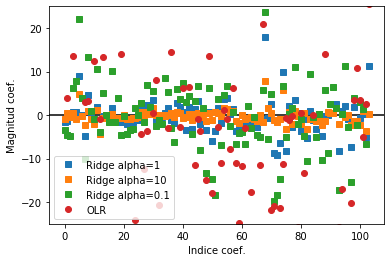

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "s", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "s", label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="OLR")

plt.xlabel("Indice coef.")
plt.ylabel("Magnitud coef.")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

**Discusión**

El eje $x$ tiene las componentes del vector de coeficientes ($x=0$ es $w_0$, $x=100$ es $w_100$), y el eje $y$ tiene el valor numérico del coeficiente.

Un $\alpha$ más alto significa un modelo más restringido, así que esperamos que las magnitudes de los coeficientes sean menores. Para $\alpha=10$, vemos que el valor de los coeficientes permanece mayormente en el intervalo $[-3,3]$. Para $\alpha=1$ los coeficientes son lago más grandes, y para $\alpha=0.1$ lo son aún más y se ve que muchos de sus datapoints corresponden con el valor de la regresión lineal (que sería $\alpha=0$) y son tan grandes que se salen de la gráfica.

Dicho de otro modo, a medida que se aumenta el valor de `alpha` en Ridge, la magnitud de los coeficientes tiende a 0.

Otra manera de entender la influencia de la regularización es fijar $\alpha$ e ir cambiando la cantidad de datos en el training dataset. Eso es lo que puede verse en el gráfico que sigue:

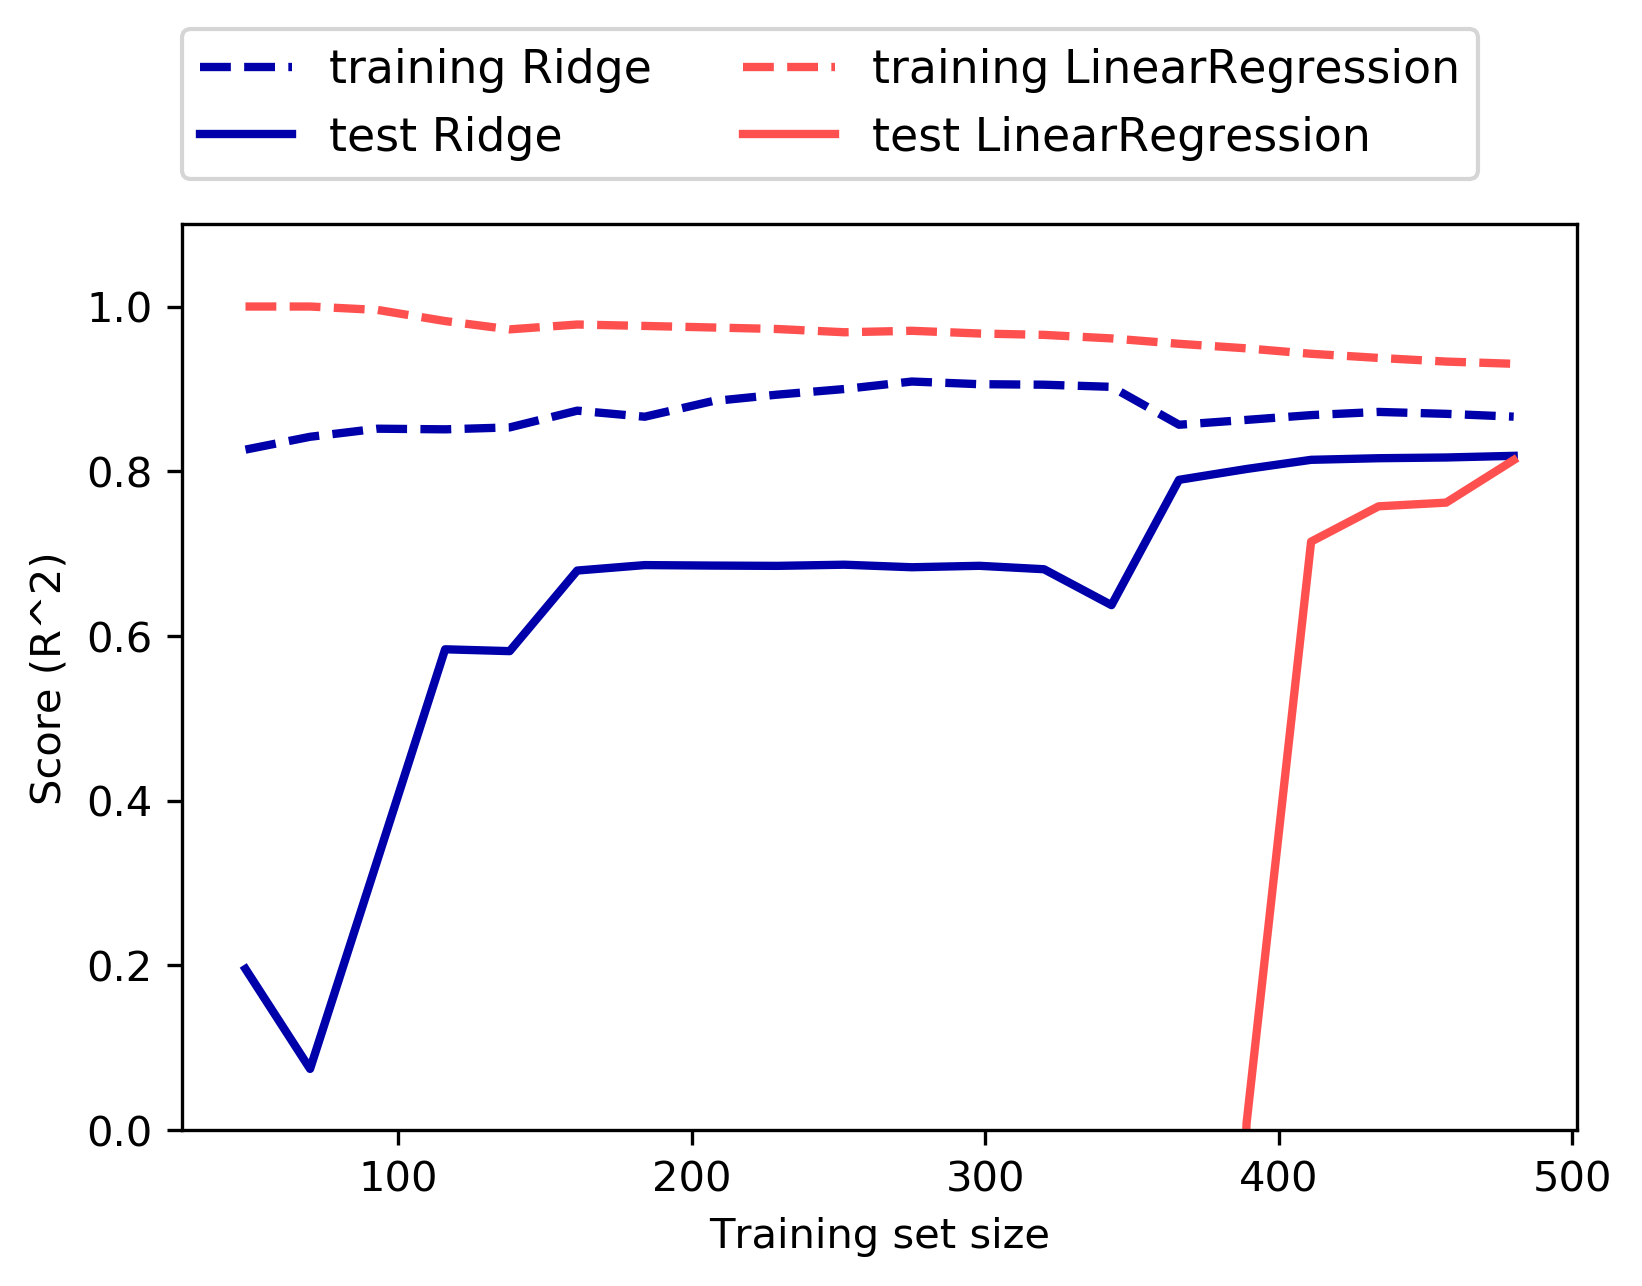

In [50]:
mglearn.plots.plot_ridge_n_samples()

**Discusión**

De esto se pueden extraer diferentes conclusiones:

Como esperábamos, $R^2$ para el traning set es más alto que para el testing set tanto para Ridge como para OLS. Ya que Ridge está regularizado, su $Rˆ2$ en training es más bajo que para OLS independientemente del tamaño del dataset.

Sin embargo, su test score es mejor, en particular para datasets más pequeños. Para menos de 400 puntos OLS no aprende nada. En cuanto vamos incrementando la cantidad de datos, se ve que ambos modelos mejoran, y OLS alcanza el rendimiento del Ridge justo al final.

La conclusión es que con datasets suficientemente grandes, la regularización pierde importancia, y que ambos Ridge y OLS tiene el mismo rendimiento.

Otro aspecto interesante es que el rendimiento de entrenamiento decrece con el aumento de datos para la regresión lineal. Esto implica que cuantos más datos se añaden al modelo, más difícil es que se produzca sobreajuste o que se memoricen los datos.

### Regresión LASSO (Least Absolute Shrinkage and Selection Operator)

Al igual que Ridge (L2), Lasso (L1) también es un modelo de regularización. Utiliza una técnica similar consistente en reducir los coeficientes a casi cero, pero utilizando regularización $L1$, es decir, se diferencia de Ridge en que no eleva al cuadrado el **penalty term** para optimizar la función de coste (**Loss function**). 

La **consecuencia directa** es que, cuando se usa $L1$, algunos coeficientes se hacen directamente cero, que implica que algunos coeficientes son ignorados por completo por el modelo.

Por ello, Lasso (L1) sirve cuando se sospeche que varios de los atributos de entrada (features) son irrelevantes, provocando que se reduzca sus coeficientes a 0. Al contrario que Ridge, Lasso funciona mejor cuando los atributos no están muy correlados entre ellos.

Vamos a aplicar la técnica LASSO al dataset de Boston Housing:

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Características usadas:", np.sum(lasso.coef_ != 0))

Training set score: 0.27
Test set score: 0.26
Características usadas: 3


**Discusión**

Como puede verse, Lasso ha funcionado bastante mal en ambos sets de datos, lo cual indica que el modelo está subajustando. Esto puede verse porque sólo se han usado 3 características de 105.

Al igual que Ridge, Lasso tiene un parámetro $\alpha$ de regularización que controla cómo de rápido los coeficientes convergen a cero. En el ejemplo anterior, al no ser especificado, se está usando un valor por defecto $\alpha=1.0$.

Para reducir el subajuste, se decrece el valor de $\alpha$. Cuando se hace esto también hay que incrementar el valor por defecto de `max_iter` (que por defecto es 1000):

In [73]:
# Decrementamos el valor de alpha a 0.01
# Incrementamos el número de "max_iter" a 10000
# De otra forma, el modelo nos advertirá de que deberíamos incrementarlo.
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Características usadas:", np.sum(lasso001.coef_ != 0))

Training set score: 0.89
Test set score: 0.80
Características usadas: 34


In [75]:
# Probamos con un alpha de 0001
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Características usadas:", np.sum(lasso0001.coef_ != 0))

Training set score: 0.94
Test set score: 0.81
Características usadas: 95


**Discusión**


Se ha subido la precisión a 0.81 a costa de ajustar más el modelo. ¿Se ha sobreajustado? Es difícil decir, porque ha subido el test score también, pero posiblemente la opción de 34 features es más adecuada, ya que reduce la complejidad respecto a las 95 características usadas en el útimo modelo.

Un `alpha` más bajo nos permite ajustar a más complejo, que funcionará mejor sobre los datasets de training y test, y el rendimiento es algo mejor que usando Ridge.

Si hiciésemos `alpha` demasiado bajo, eliminaríamos el efecto de la regularización y acabaríamos sobreajustando, con un resultado en consecuencia muy similar al de `LinearRegression`.

Una vez más, podemos pintar los coeficientes de los modelos anteriores con valores distintos de `alpha`:

Text(0, 0.5, 'Magnitud del coeficiente')

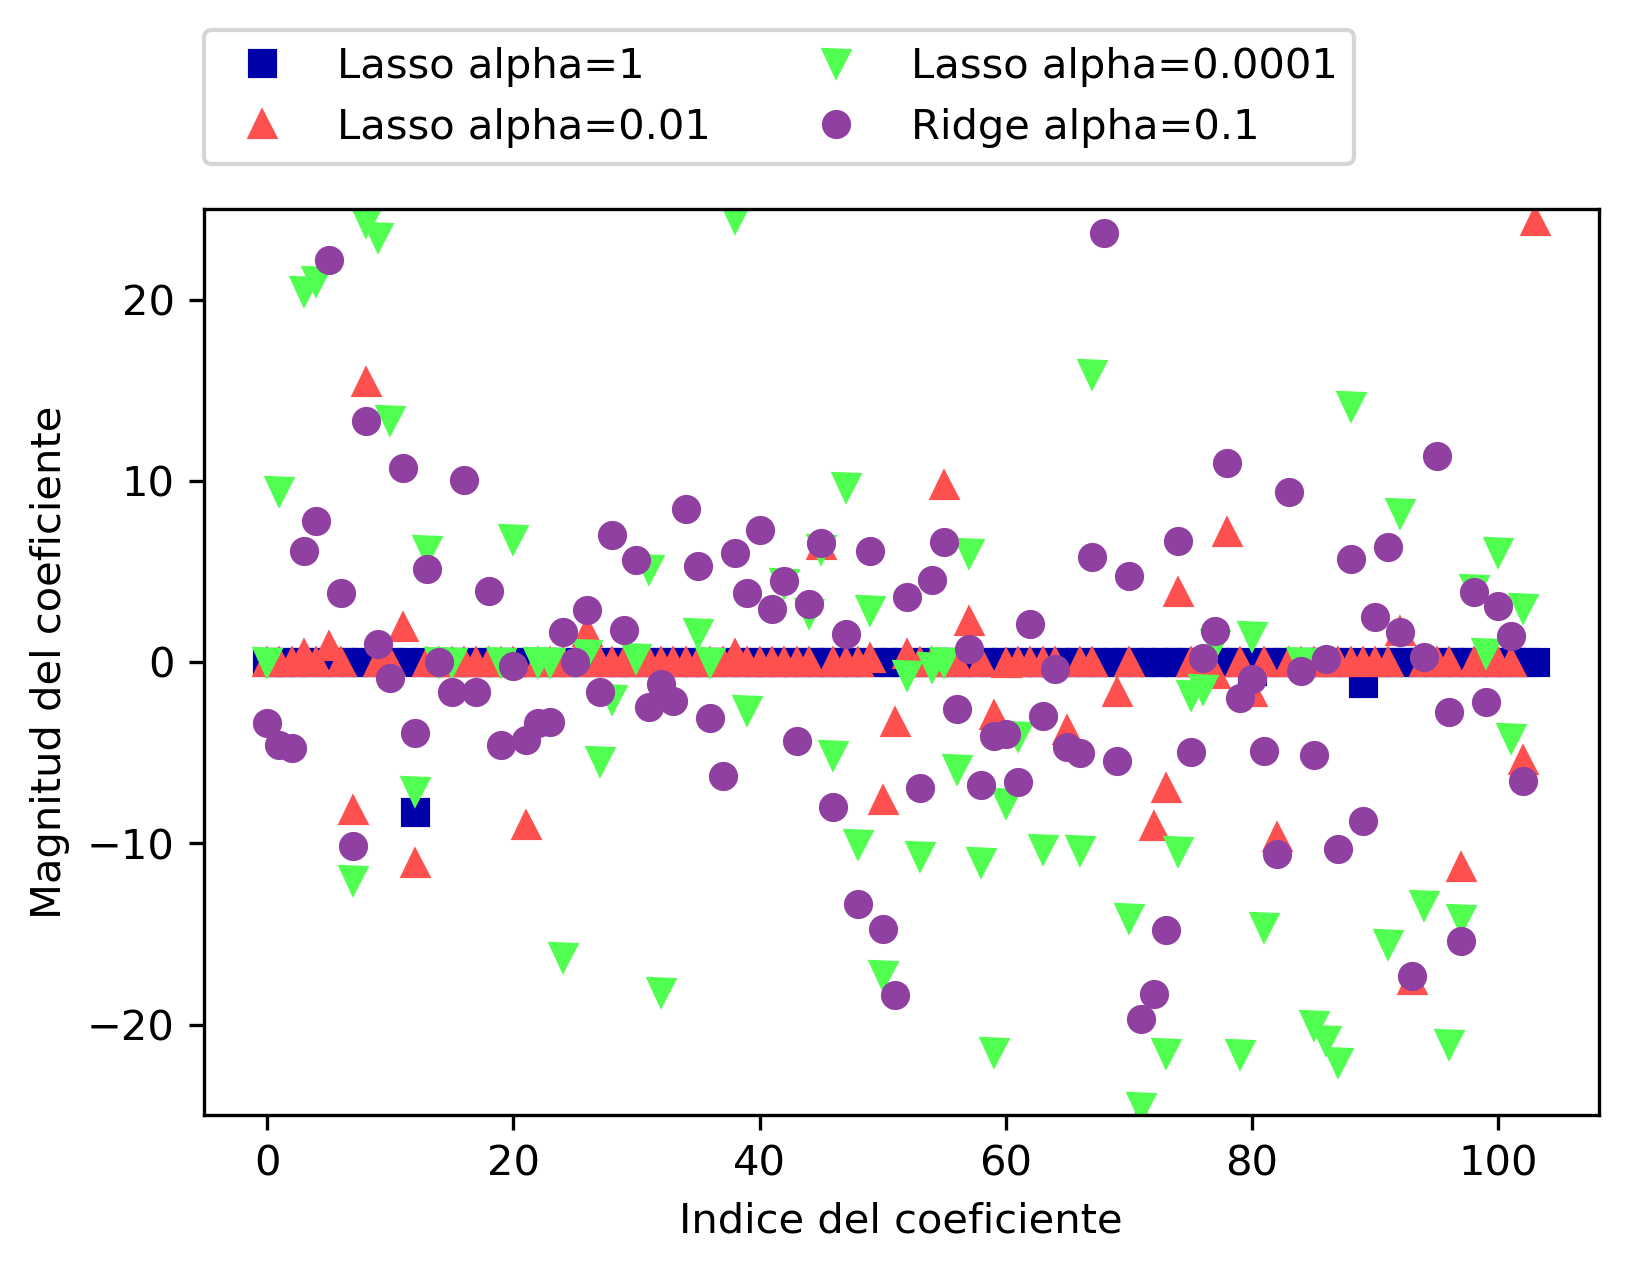

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Indice del coeficiente")
plt.ylabel("Magnitud del coeficiente")

**Discusión**

Para `alpha`=1 se ve que la mayoría de los coeficientes son cero, y que los cuatro restantes son pequeños. Al decrementar `alpha` tenemos la solución marcada con triángulos rojos, que hace que la mayoría de las características sean cero. Con `alpha`=0.0001 nos queda un modelo bastante desregularizado, con la mayoría de los coeficientes distintos de cero y de gran magnitud.

El modelo Ridge con `alpha`=0.1 tiene un rendimiento similar al Lasso con `alpha`=0.01, pero con Ridge todos los coeficientes son distintos de cero.

En la práctica, la regresión Ridge es la primera opción entre los dos. Sin embargo, si el número de características es alto y se espera que sólo algunas de ellas sean relevantes, Lasso puede ser una mejor elección.

De la misma forma, si lo que queremos es tener un modelo fácil de interpretar, Lasso es la opción ya que sólo usa un subconjunto de las características. Scikit-learn da la clase [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elasticnet#sklearn.linear_model.ElasticNet) que combina ambos. En la práctica la combinación funciona mejor, al precio de tener que ajustar dos parámetros: uno para la regularización $L1$ y otro para la $L2$.

### ElasticNet
Es una fórmula híbrida entre Lasso y Ridge (L1/L2). Más información [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elasticnet#sklearn.linear_model.ElasticNet).

## Modelos lineales de clasificación
Igual que existen modelos lineales para la predicción de variables continuas, existen modelos para la clasificación de variables discretas, ya sean binarias o multiclase.

Debemos distinguir en este apartado:
- **Regresión Logística**
- **Support Vector Classifier (SVC)**

En este sentido, establecen el cálculo de un límite de decisión que queda dibujado en el hiperplano y que sirve como frontera para la clasificación de la variable predicha.

Estos modelos son paramétricos, así que hay un parámetro que podemos ajustar que es `C`, que nos permite hacer una mejor o peor generalización. Si subimos el valor de `C` en ambos modelos vamos a conseguir un mejor ajuste al training y si bajamos el valor de `C` vamos a reducir la importancia de los pesos.

### Regresión Logística
La regresión logística es una regresión, es decir, produce valores continuos. Sin embargo,se utiliza para la clasificación, con valores 0 y 1.

A diferencia de los métodos explicados, en vez de ajustar una línea, ajusta una una función logística a los datos: 

- Probabilidad => 0.5 ---> 1

- Probabilidad < 0.5 ---> 0

En vez de $R^{2}$ utiliza la máxima verosimilitud.

![reg_log](Img/reg_log.JPG)

### Support Vector Machines (SVM)
<font size="1"> Fuente: https://rpubs.com/Cristina_Gil/SVM </font> 

Las **Support Vector Machines (SVM)** o máquinas de vector soporte son otro tipo de algoritmo de machine learning supervisado aplicable a problemas de regresión y clasificación, aunque generalmente se utilizan más para esta última.

Las SVM suponen una generalización de un clasificador simple denominado **maximal margin classifier**. Sin embargo, este clasificador no puede aplicarse a sets de datos donde las clases de la variable respuesta no son separables mediante un límite lineal. Una extensión del mismo, el support vector classifier es aplicable en un mayor rango de casos. El support vector machine supone una extensión más del support vector classifier para casos con límites no lineales entre clases (clasificación binaria o de más clases)

#### Maximal Margin Classifier
En un espacio euclídeo p-dimensional, un hiperplano es un subespacio plano y afín (no tiene por qué pasar por el origen), de dimensión p-1 que divide el espacio en dos mitades. Por ejemplo, en un espacio de dos dimensiones, un hiperplano tendra p = 1 dimesiones, en un espacio de dos dimensiones tendrá p = 2 dimensiones, etc.

Si tenemos una matriz de datos n·p con n observaciones y p predictores, el objetivo será desarrollar un clasificador en base al subgrupo de datos de entrenamiento que clasifique correctamente nuevas observaciones en base a los valores de los predictores. Cada asignación se asignará a un grupo y otro dependiendo de en qué lado del hiperplano se localice. Si el valor de la función para calcular el hiperplano es cercano a 0, significa que la observación está cerca del hiperplano y que, por lo tanto, estamos menos seguros de la clase asignada a esta observación.

Si nuestros datos son perfectamente separables mediante un hiperplano, entonces existirá un número infinito de tales hiperplanos (debido a la posibilidad de moverlos o rotarlos sin entrar en contacto con las observaciones). Esto hace que necesitemos un modo de decidir cuál de todos los hiperplanos posibles utilizar. La solución es escoger el hiperplano de separación que se encuentre más alejado de las observaciones de entrenamiento, al que se conoce como maximal margin hyperplane o hiperplano óptimo de separación. Este se obtiene calculando las distancias perpendiculares de cada observación a un hiperplano dado, donde la distancia más pequeña se corresponde con la distancia mínima de las observaciones al hiperplano, espacio conocido como margen. Con esto, el hiperplano óptimo de separación será aquel que tenga la mayor distancia mínima de las observaciones al hiperplano, o lo que es lo mismo, el mayor margen (M). 

![Example](Img/svc_2.png)

En la imagen, la línea negra continua representa el hiperplano óptimo de separación y el margen en líneas discontinuas. En ella, hay tres observaciones (dos de la clase azul y una de la morada) que son equidistantes al hiperplano (en este caso, p = 2). A estas observaciones que son las que se encuentran sobre el margen, y por tanto, más próximas al hiperplano, se conocen como **support vectors o vectores soporte**, pues son vectores en el espacio p-dimensional que “soportan” al hiperplano óptimo de separación en el sentido de que si estas observaciones cambiaran ligeramente, el hiperplano lo haría también. El movimiento del resto de observaciones no tendría impacto en el hiperplano, siempre y cuando no cruzaran el límite establecido por el margen.

### Support Vector Classifier (SVC)

Sin embargo, estos clasificadores son bastante sensibles a valores atípicos. Es decir, la existencia de un único valor, como puede ser un **outlier**, supondría un cambio enorme en el la ubicación del hiperplano y nos provocaría colocar el umbral en un punto u otro.

Veamos dos ejemplos:

![SVC](Img/SVC_2.JPG)

![SVC](Img/svc.png)

En este segundo ejemplo, el cambio en el hiperplano causado por una sola observación hace que éste deje de ser óptimo, ya que el margen se ha reducido drásticamente, y esta distancia supone una medida de la confianza con la que una observación es correctamente clasificada.

En estos casos, puede ser útil considerar el clasificador denominado **soft margin classifier o support vector classifier***, que no separe perfectamente las dos clases y nos permita trabajar con outliers con el objetivo de tener:
- Mayor robustez a observaciones individuales
- Mejor clasificación de la mayoría de las observaciones de entrenamiento y test.

Con este clasificador SVC, se permite que algunas observaciones se encuentren en el lado incorrecto del hiperplano. Estas serán las observaciones de entrenamiento mal clasificadas por el modelo.

El proceso de optimización del hiperplano en este caso incorpora un parámetro de regularización o tuning parameter: **C**. Este controla la severidad permitida de las violaciones de las n observaciones sobre el margen e hiperplano, y a la vez, el equilibrio bias-varianza.

#### Ejemplos de regresión logística y SVC

\begin{align*}
\end{align*} Para empezar, apliquemos los modelos `LogisticRegression` y `LinearSVC` al dataset modelo `forge`, y visualicemos el límite de decisión para ambos: 

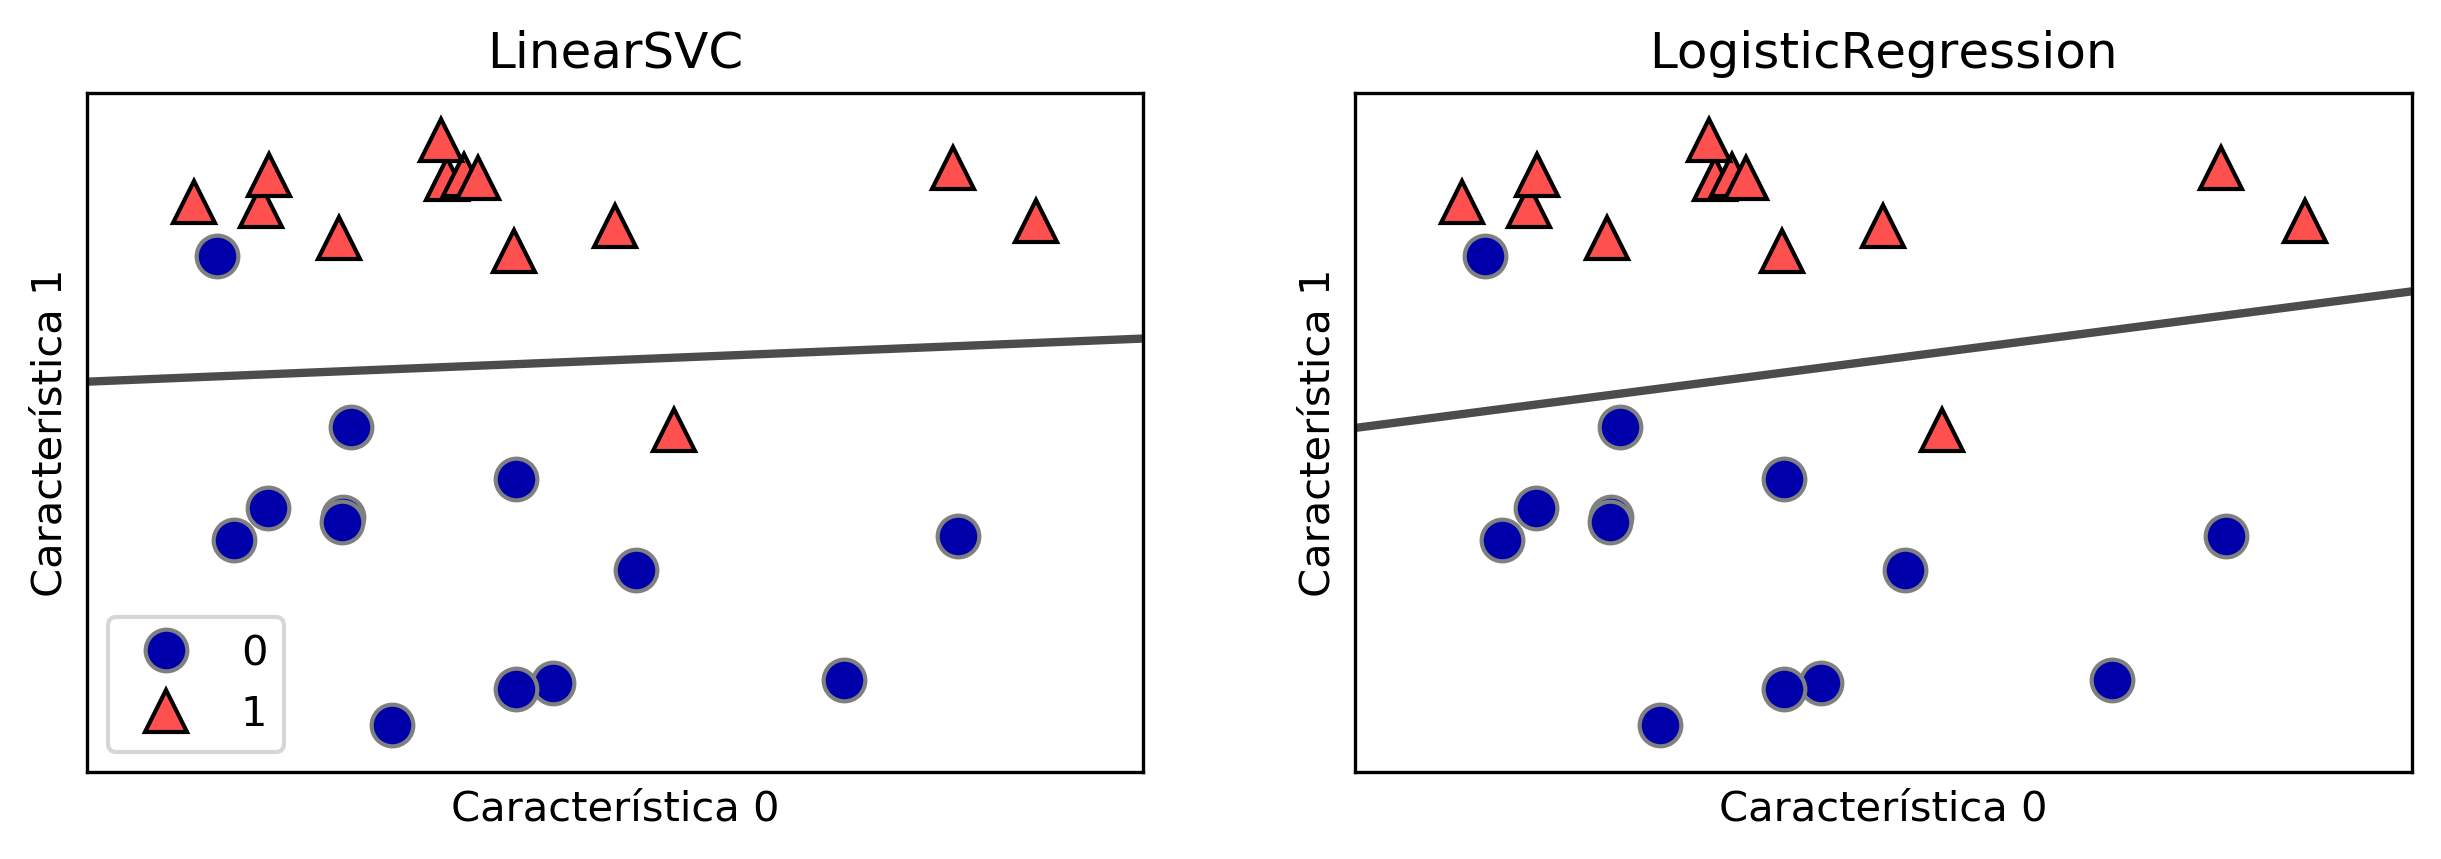

In [78]:
# Importamos paquetes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Importamos forge dataset
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression(solver="liblinear")], axes):
    # Entrenamos el modelo
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Característica 0")
    ax.set_ylabel("Característica 1")
axes[0].legend()

Puede verse que el límite de decisión es una línea recta que separa ambas clases. Cualquier punto encima de la línea será clasificado como perteneciente a la clase 1, mientras que puntos por debajo lo serán como clase 0.

Los dos límites son similares, y en ambos casos los algoritmos están utilizando regularización $L2$, que es lo mismo que hacía Ridge en el apartado anterior.

El parámetro que determina la fuerza de regularización en ambos casos se llama $C$, donde valores altos de $C$ corresponden a una menor regularización. Es decir, con un valor alto de $C$ ambos modelos intentarán ajustarse a los datos de training lo mejor posible, mientras que con un valor bajo los modelos se centrarán en encontrar un vector coeficientes $w$ cercano a cero.

El efecto de diferentes valores de C en `LinearSCV` puede verse en los siguientes tres gráficos:

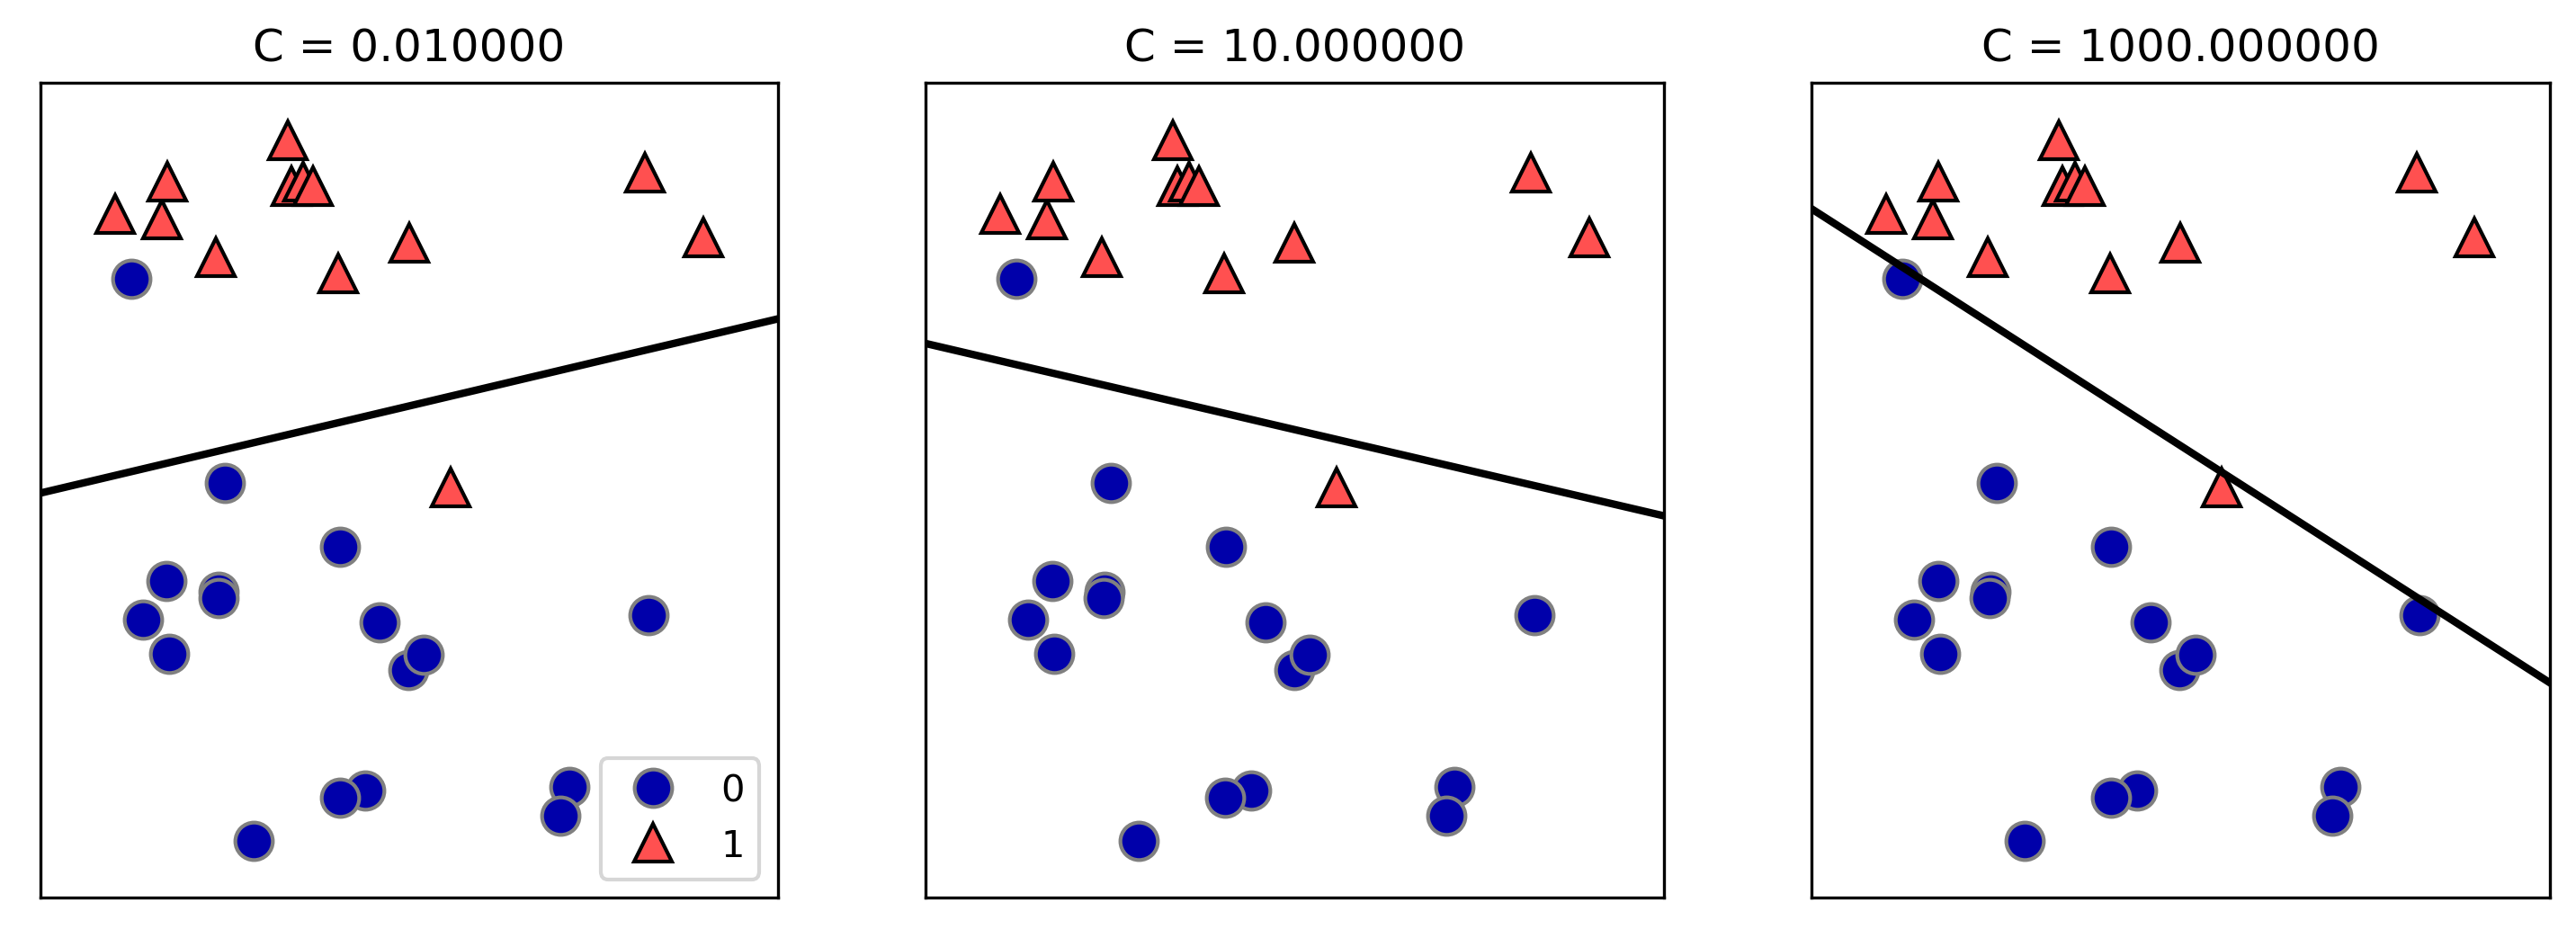

In [68]:
mglearn.plots.plot_linear_svc_regularization()

**Discusión**

El el gráfico de la izquierda, tenemos un valor de $C$ muy pequeño correspondiente a una alta regularización. El modelo fuertemente regularizado elige una linea relativamente horizontal, errando en la clasificación de 2 puntos.

El gráfico central inclina la línea hacia el otro lado, y se ve que el modelo se enfoca más en los dos puntos incorrectamente clasificados.

Finalmente, en el gráfico de la derecha, el valor alto de $C$ hace que el límite de decisión se incline mucho, clasificando correctamente todos los puntos de la clase 0. Uno de los puntos de la clase 1 permanece incorrectamente clasificado, pero no es posible hacerlo mejor con un límite lineal. Este último modelo está sobreajustando los datos de entrenamiento.

Al igual que en el caso de regresión, los modelos de clasificación lineal pueden parecer muy limitados en espacios de bajas dimensiones. Sin embargo, son más potentes en dimensiones más altas y protegen bien contra el sobreajuste cuando se consideran más características.

Veamos cómo se comporta la regresión logística en el dataset de cáncer de mama:

In [81]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Parte los datasets
#Aquí es crítico tener un stratify indicado porque si no está debido a como funciona la regresión logística o la SVM va a tender hacia un lado u otro para marcar la frontera
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Instancia y entrena el modelo
logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


Un valor de $C=1$ da un rendimiento bastante bueno, con un 95% de precisión en ambos datasets. Pero si ambos están muy próximos, es posible que estemos subajustando. Vamos a incrementar el valor de $C$ buscando un modelo con más flexibilidad hacia los datos de entrenamiento:

In [82]:
# Prueba con C=100
logreg100 = LogisticRegression(solver="liblinear", C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


**Discusión**

Con $C=100$ tenemos más precisión en el dataset de entrenamiento, y también un poco más en el de test, lo que confirma nuestra intuición de que un modelo más complejo debería comportarse mejor.

Podemos investigar también qué ocurre si usamos un modelo aún más regularizado que el suministrado por defecto, haciendo que $C=0.01$:

In [83]:
# Prueba con C=0.01 
logreg001 = LogisticRegression(solver="liblinear", C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


**Discusión**

Como era de esperar, moverse más en la escala de $C$ desde un modelo que ya desajustaba lo que hace es reducir la precisión con respecto a los valores de $C$ por defecto.

Finalmente, echemos un vistazo a los coeficientes aprendidos por el modelo con tres valores diferentes de $C$:

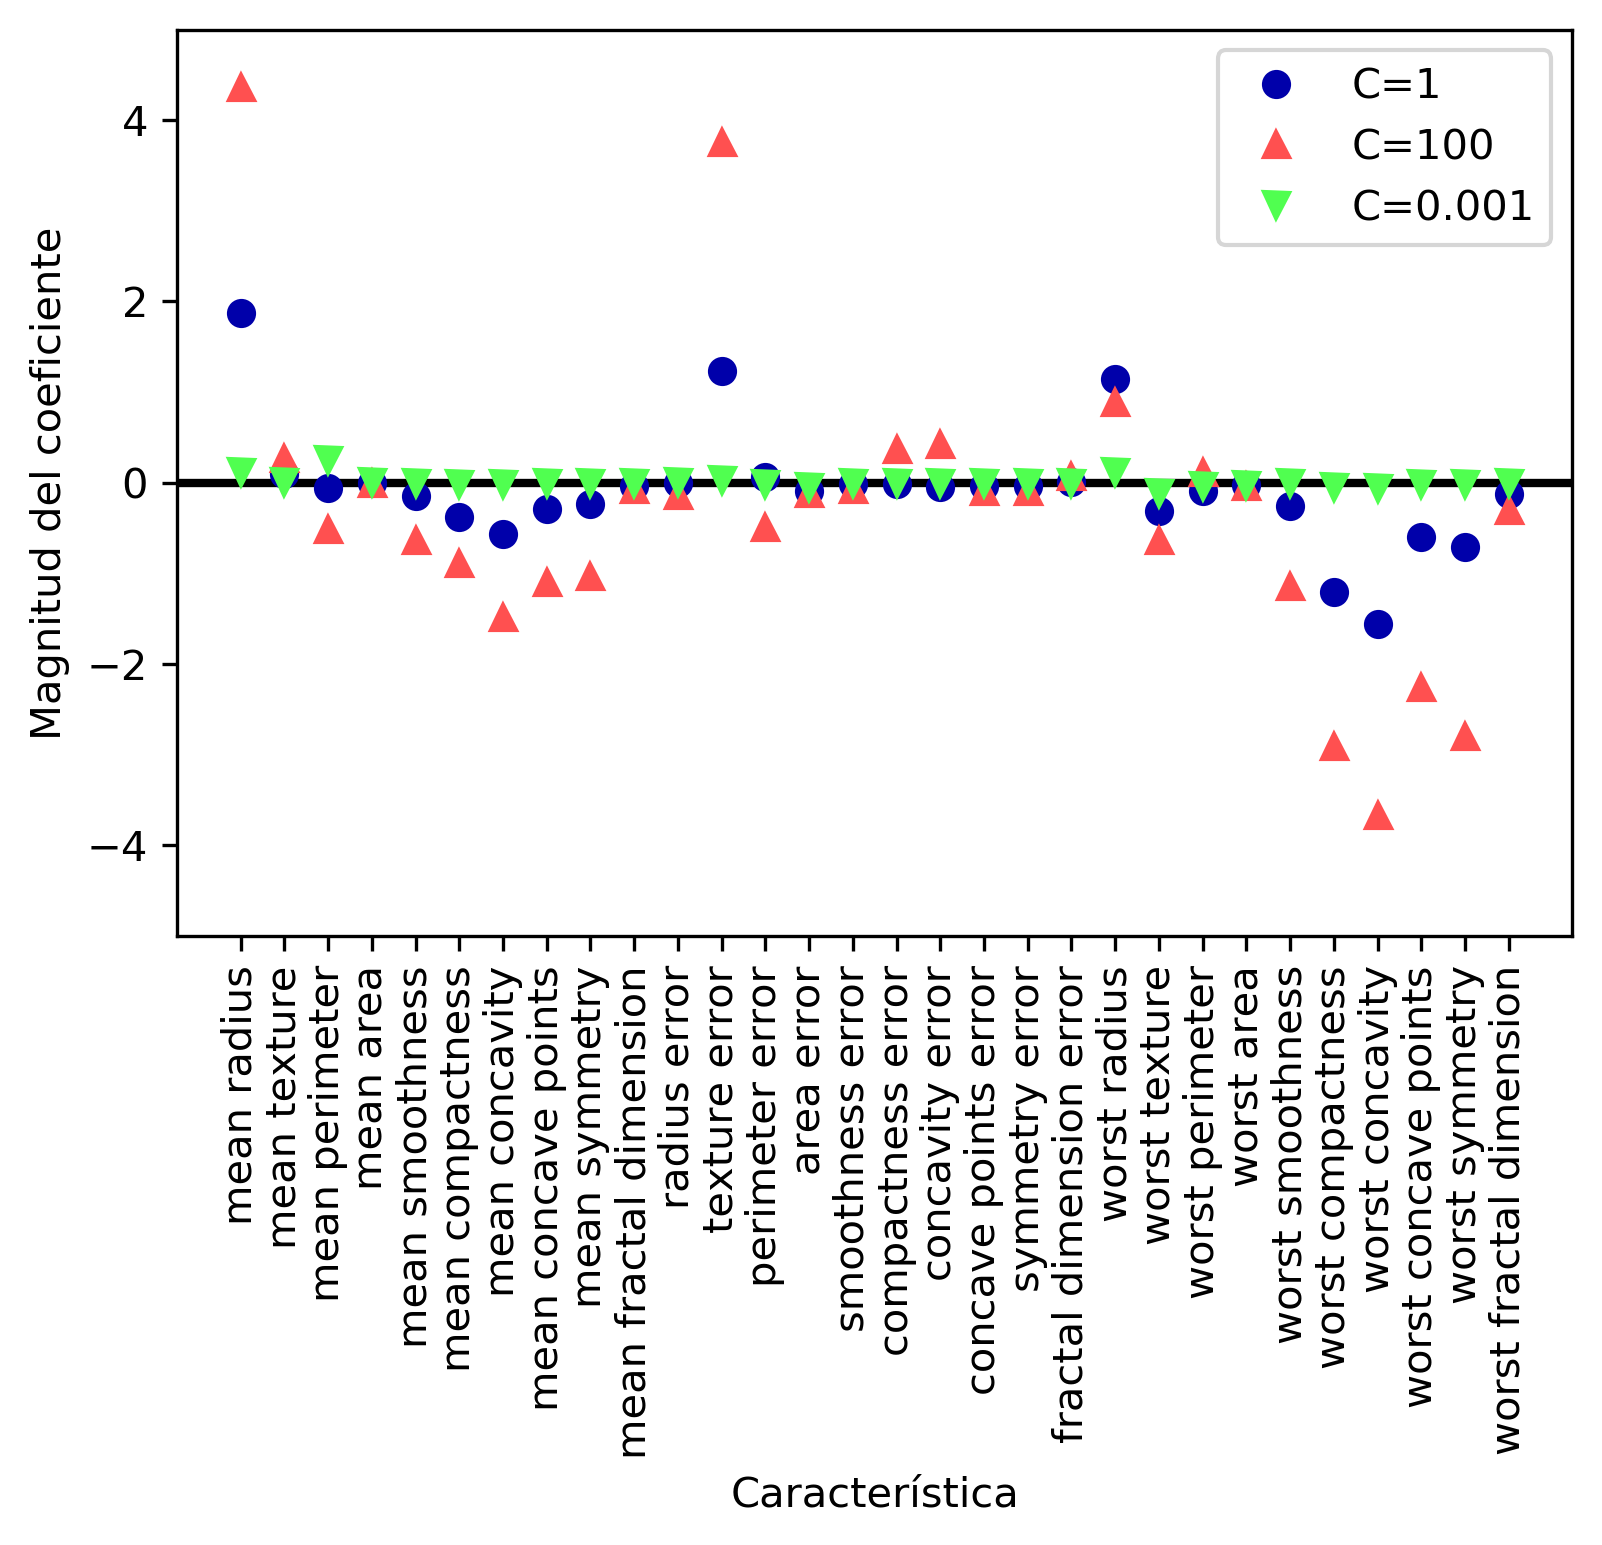

In [84]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),
           cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Característica")
plt.ylabel("Magnitud del coeficiente")
plt.legend()

`LogisticRegression` aplica una regularización tipo $L2$ por defecto, y por lo tanto sus resultados son parecidos a los que se obtenían con la regresión Ridge más arriba. Una regularización más fuerte aproxima más los coeficientes a cero, aunque estos nunca llegan a anularse.

Si se miran los puntos en el gráfico con más detalle, se ven un efecto interesante en el tercer coeficiente, `mean perimeter`. Para $C=100$ y $C=1$, el coeficiente es negativo mientras que para $C=0.001$ es positivo, con una magnitud que es incluso mayor que para $C=1$. 

Al interpretar un modelo como este, uno puede pensar que el coeficiente nos dice la clase a la que está asociada una característica. Por ejemplo, se podría pensar que grandes magnitudes de `texture error` están relacionadas con que una muestra sea maligna. Sin embargo, el cambio de signo `mean perimeter` significa que dependiendo del modelo en el que nos enfoquemos, un valor alto de `mean perimeter` podría ser tanto un indicativo de benigno como de maligno.

La conclusión es que las interpretaciones de los coeficientes en los modelos lineales no pueden realizarse a la ligera.

Si quisiésemos tener un modelo más fácilmente interpretable, una regularización de tipo $L1$ ayuda, ya que limita al modelo a usar sólo algunas características. He aquí un gráfico de los coeficientes y las precisiones para un modelo $L1$:

Precisión (Training) para Logistic Reg. L1 con C=0.001: 0.96
Precisión (Test) para Logistic Reg. L1 con C=0.001: 0.96
Precisión (Training) para Logistic Reg. L1 con C=1.000: 0.96
Precisión (Test) para Logistic Reg. L1 con C=1.000: 0.96
Precisión (Training) para Logistic Reg. L1 con C=100.000: 0.96
Precisión (Test) para Logistic Reg. L1 con C=100.000: 0.96


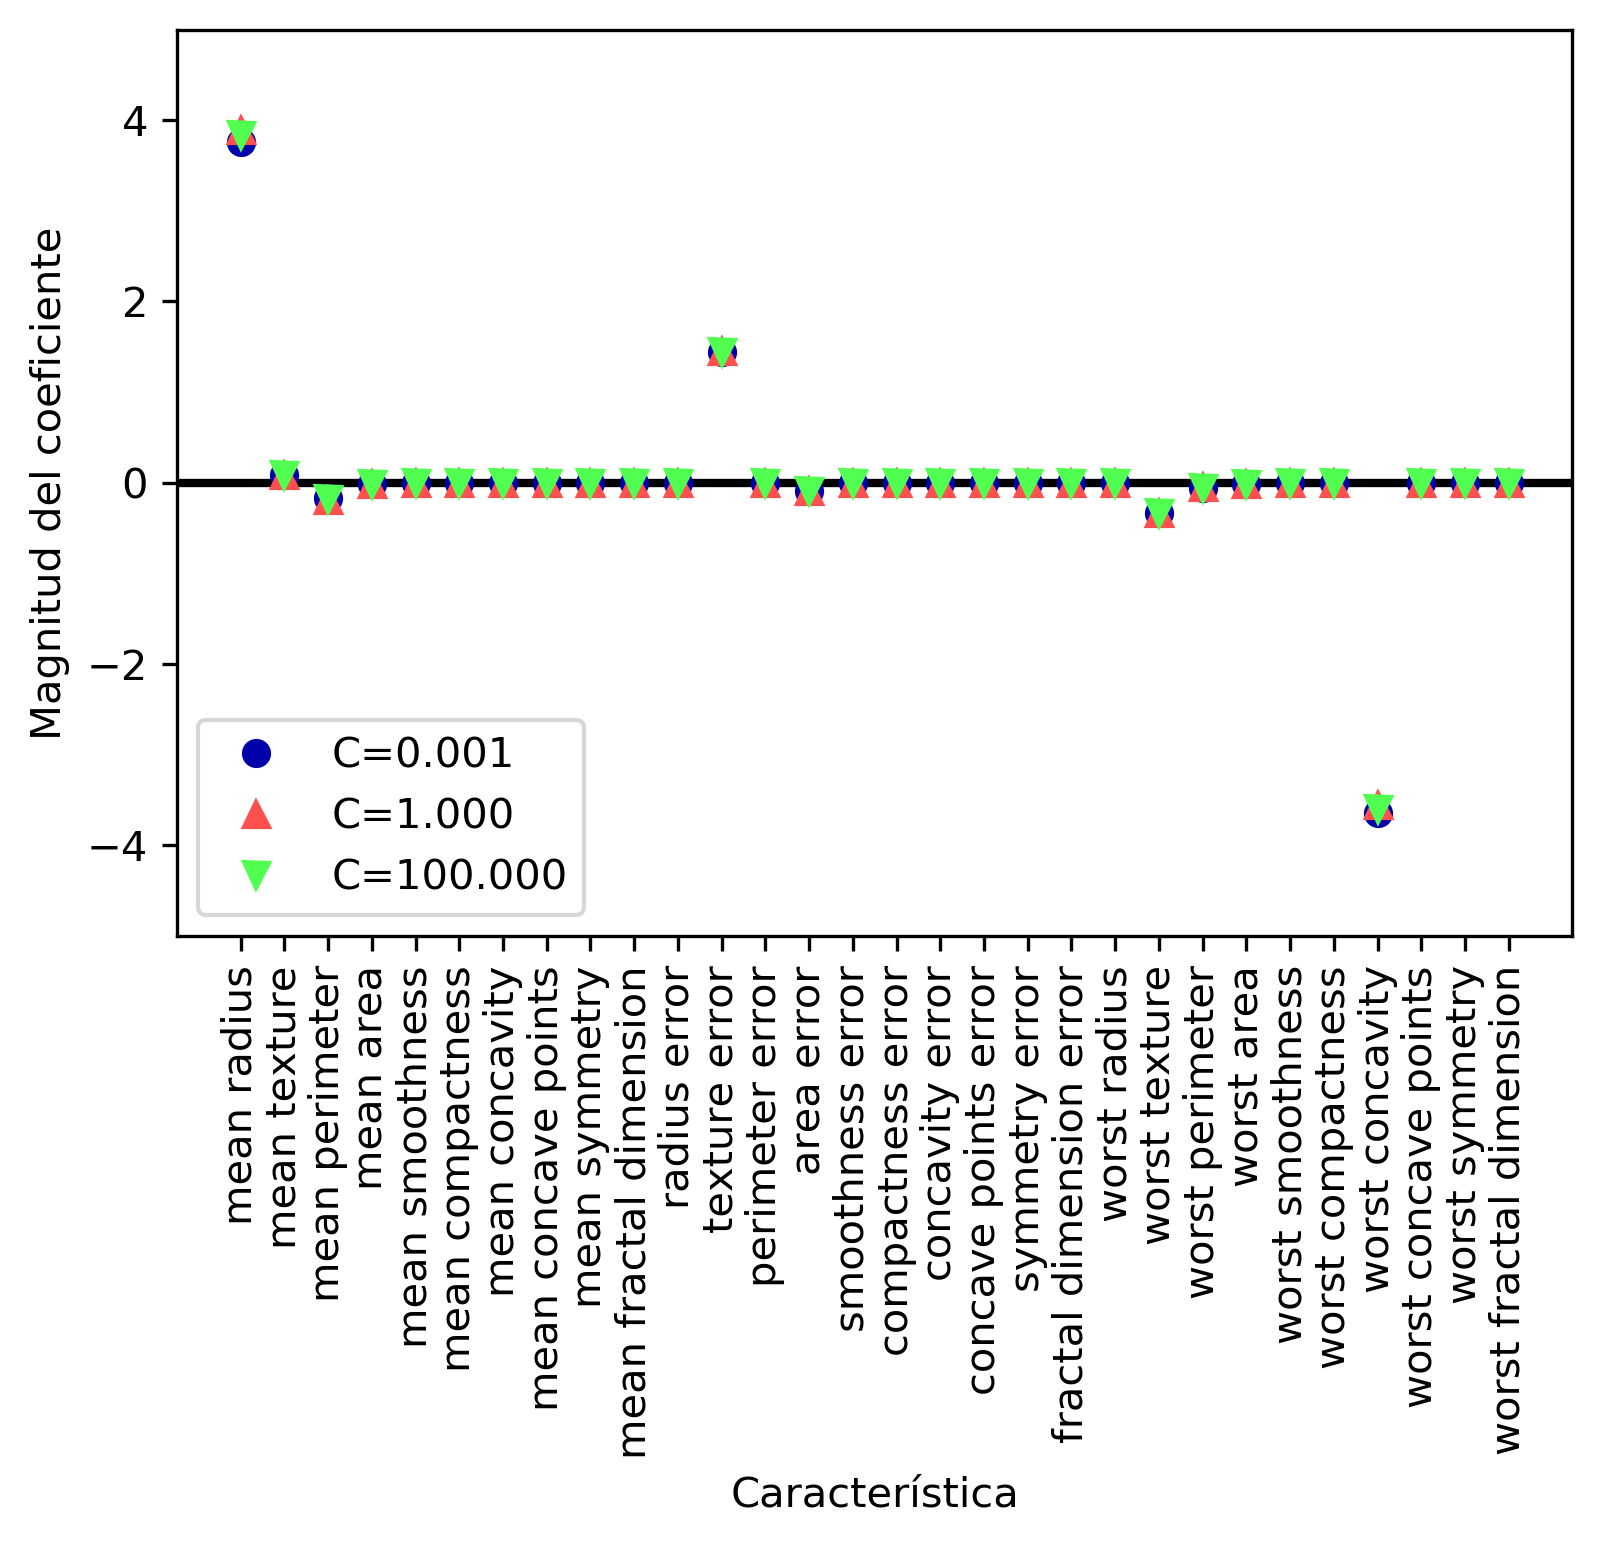

In [85]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # Entrenamos un modelo con L1
    lr_l1 = LogisticRegression(max_iter=10000, solver="liblinear", penalty="l1").fit(X_train, y_train)
    print("Precisión (Training) para Logistic Reg. L1 con C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Precisión (Test) para Logistic Reg. L1 con C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(
    range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Característica")
plt.ylabel("Magnitud del coeficiente")

plt.ylim(-5, 5)
plt.legend(loc=3)

**Discusión**

Aquí tengo un modelo mucho más interpretable. He perdido un poquito respecto al modelo L2 pero he ganado en interpretabilidad del modelo.
Y en este modelo sí sé en qué sentido tienen influencia si para decidir si son benignos o malignos.

### Modelos lineales de clasificación multiclase
<font size="1"> Fuente: https://rpubs.com/Cristina_Gil/SVM </font> 

Ya se ha explicado el SVC, pero como se ha comentado, estos hacían una división binaria, entre dos clases. Existen varias extensiones de los SVMs para problemas de clasificación con más de dos clases (K>2), siendo dos de las más populares:
- One-versus-one
- One-versus-all


#### Clasificación one-vs-one
Este método construye (k2) SVMs, cada uno comparando un par de clases. Una observación de test se clasifica usando cada uno de los SVMs, contando el número de veces que esta observación es asignada a cada una de las K clases. La clase final predicha será aquella a la que la observación ha sido asignada en la mayoría de los SVMs.


#### Clasificación one-vs-all o one-vs-rest
Con esta técnica, se entrena un modelo binario para cada clase frente al resto, resultando en tantos modelos binarios como clases haya. Para hacer una predicción, tendrán que ejecutarse todos los clasificadores binarios sobre la muestra en cuestión. El clasificador que tenga el score más alto marca cuál es la clase devuelta como resultado de la predicción.

![one-vs-rest](images/one-vs-rest.jpeg)

Vamos a aplicar la técnica *one-vs-rest* a un dataset sencillo con tres clases. Usamos aquí un dataset bidimensional, al que cada clase se obtiene a partir de datos de una distribución normal:

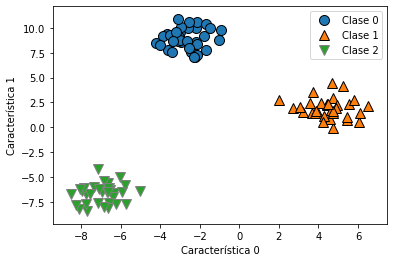

In [23]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(["Clase 0", "Clase 1", "Clase 2"])

Con estos datos, entrenamos un modelo `LinearSVC`:

In [24]:
# Instanciamos un modelo LinearSCV
linear_svm = LinearSVC().fit(X,y)
#Las dimensiones de los coeficientes indica cuántos hiperplanos hay que dictaminan qié no es cada cosa. Debajo veremos un código que ayud aa pintar esas líneas o hiperplanos
print("dimensiones coeficientes: ", linear_svm.coef_.shape)
print("Dimensiones término b: ", linear_svm.intercept_.shape)
print(linear_svm.coef_)

dimensiones coeficientes:  (3, 2)
Dimensiones término b:  (3,)
[[-0.17492727  0.2313987 ]
 [ 0.47621214 -0.06937743]
 [-0.18913908 -0.20400526]]


`coef_` tiene dimensiones (3,2): 3 filas y dos columnas, lo que significa que cada fila contiene el vector de coeficientes de cada clase, y las columnas el valor del coeficiente para una de las dos características presentes. El término `intercept` es un array unidimensional (vector), con la $b$ de cada clase.

Visualicemos las lineas frontera para cada clasificador binario:

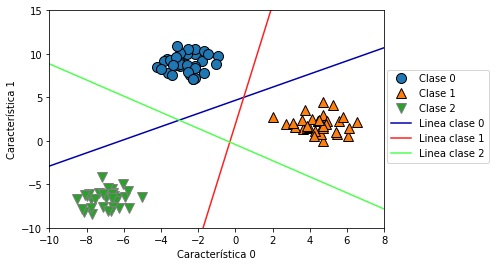

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Creamos puntos en una línea en el intervalo [-15, 15]
line = np.linspace(-15,15)

# Iteramos para pintar las lineas con colores distintos
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Linea clase 0', 'Linea clase 1',
            'Linea clase 2'], loc=(1.01, 0.3))

**Discusión**

Puede verse que las muestras de clase 0 están por encima de la línea de clase 0, que significa que están en el lado "clase 0" de este clasificador binario. Estas muestras también están por encima de la línea de la clase 2, que significa que están clasificadas como "resto" por el clasificador binario de la clase 2. Por último, también están a la izquierda de la línea de la clase 1, que significa que el clasificador binario de la clase 1 también los clasifica como "resto".

Cualquier punto en este área será clasificado como Clase 0 por el clasificador final pero, ¿qué ocurre con el triángulo en mitad de la gráfica? Los tres clasificadores clasifican las muestras en este área como "resto", así que la clase correspondiente a una muestra aquí será la que tenga el valor más alto en la fórmula de clasificación, que es la que corresponde a la línea de clase más cercana.

Para ilustrarlo, hagamos la predicción para todos los puntos de este espacio bidimensional: 

Text(0, 0.5, 'Característica 1')

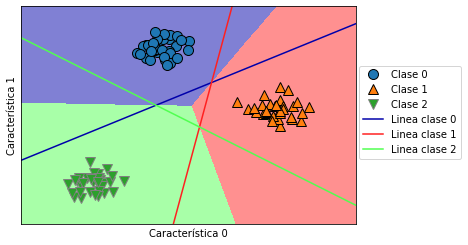

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Clase 0', 'Clase 1', 'Clase 2', 'Linea clase 0', 'Linea clase 1',
            'Linea clase 2'], loc=(1.01, 0.3))
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

## Lab 4 - Clasificadores Naive Bayes

Un clasificador Naive Bayes tipo Bernoulli cuenta con qué frecuencia las características de cada clase son distintas de cero. 

El típico clasificador de Naive-Bayes es el clasificador de Spam. Etiqueta los mensajes en spam o no spam basados en determinados términos que se repiten como Buy, Cheap, etc.

Los clasificadores Naive Bayes tienen tres implementaciones:
- **GaussianNB**: datos continuos, altas dimensiones
- **BernoulliNB**: datos binarios
- **MultinomialNB**: datos de conteo (enteros, frecuencias de aparición de palabras en una frase....)

Para entenderlo bien, veamos un ejemplo:

In [16]:
# Crear un array X de 4x4 con ceros y unos aleatoriamente
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

# Crear un array y de 1x4 con las etiquetas (ceros y unos)
y = np.array([0,1,0,1])

Tenemos cuatro muestras con cuatro características binarias cada una de ellas. Hay dos clases, 0 y 1. Para la clase 0 (primera y tercera muestra) la primera característica es 0 veces, y distinta de cero ninguna, la segunda característica es 0 una vez y distinta de 0 otra, y así sucesivamente.
​
El mismo tipo de conteo se realiza para las muestras en la segunda clase. Contar las entradas distintas de cero por clase tiene esta pinta:

Hagamos un conteo de muestras:

In [18]:
# Contar tipo de características
counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)

print(counts)

{0: array([1, 2, 0, 2]), 1: array([1, 0, 2, 1])}


In [20]:
# Importar BernoulliNB, instanciar y entrenar
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
# Probar una predicción
print(clf.predict([[1,1,1,0]]))

[1]


**Discusión**

Para hacer una predicción, la muestra suministrada se compara con la estadística de cada una de las clases, y el resultado es la mejor correspondencia.

En el caso de `MultinomialNB` y `GaussianNB`, utilizan parámetros estadísticos diferentes. `MultinomialNB` considera el valor medio de cada característica para cada clase, mientras que `GaussianNB` almacena el valor medio y la desviación estándar de cada característica para cada clase.

Al hacer una predicción, tanto para `MultinomialNB` como para `BernoulliNB` llegamos a una fórmula de predicción que es similar a la de los modelos lineales.

En Naive Bayes se puede indicar un parámetro alpha que, si bien no es crítico, permite mejorar la precisión del modelo.

## Lab 5 - Árboles de decisión

(Más información en https://rpubs.com/Cristina_Gil/arboles_ensemble)

Los métodos para regresión y clasificación basados en árboles de decisión segmentan el espacio del predictor en un número simple de regiones, y para obtener las predicciones se suele usar la media o moda de las observaciones de entrenamiento en la región en la que cada observación a predecir pertenece. Los árboles de decisión son simples y fáciles de interpretar, pero pueden no resultar lo suficientemente competitivos frente a otros métodos de aprendizaje supervisado en cuanto a la precisión de predicción. 

Sin embargo, existen técnicas para mejorarlos, como son los métodos de ***bagging o bootstrapping***, ***random forests*** y ***boosting***, que producen múltiples árboles que se combinan para mejorar la predicción, a expensar de una interpretación más complicada.

Los árboles de decisión pueden aplicarse tanto para problemas de regresión como de clasificación, y también pueden contener predictores tanto cuantitativos como cualitativos.

### Árboles de decisión para regresión
Una de las ventajas de los árboles de decisión en comparación con otros métodos de regresión es su fácil interpretación y útil representación gráfica. A la hora de construir un árbol de regresión, dos son los pasos principales:
-  División del espacio del predictor en N regiones distintas y no solapantes o nodos internos. Teóricamente, las regiones podrían tomar cualquier forma, aunque si se opta por regiones rectangulares de múltiples dimensiones se simplifica y facilita la interpretación del modelo final. El objetivo es encontrar las regiones que minimicen el Residual Sum of Squares (RSS).
-  Para cada una de las observaciones pertenecientes a una determinada región se asigna la misma predicción, que es simplemente la media de la variable respuesta de las observaciones de entrenamiento.

El proceso de división comienza en un **nodo raíz**, que corresponde al punto más alto del árbol, donde todas las observaciones pertenecen a una misma región, y de manera sucesiva se divide el espacio donde cada división genera dos nuevas ramas. Estas nuevas ramas se denominarán **nodos**. El nivel más bajo del árbol son las denominadas **hojas**. Además, para establecer nuevas ramas se optará por la mejor división en cada paso, sin tener en cuenta si dicha división mejorará el árbol en futuros pasos o divisiones.

### Árboles de clasificación
Los árboles de clasificación son muy similares a los de regresión, con la diferencia de que se usan para predecir una variable respuesta cualitativa, asignando la predicción para cada observación como la clase más común (moda) de observaciones de entrenamiento en la región o nodo terminal al que pertenece dicha observación de test.

Al igual que con los árboles de regresión, se aplica la división binaria recursiva para generar el árbol, pero el RSS no puede usarse como criterio para estas divisiones, sino otras alternativas como el **error de clasificación** (es decir, la fracción de observaciones de entrenamiento en una región o nodo que no pertenece a la clase más frecuente), el **índice de Gini** o la **entropía cruzada**, utilizando generalmente el segundo.

###  Ventajas e inconvenientes de los árboles de decisión

Algunas de las **ventajas** de los árboles de decisión son:
- Es invariante frente al escalado de los datos
- Características procesadas de manera independiente
- No hacen falta estrategias de pre-pro

Sus **inconvenientes** son que:
- Tiene tendencia al sobreajuste
- Tiene un mal rendimiento de generalización, que se soluciona con el *Ensemble learning*, que se verá más adelante.

Usemos ahora el método `make_moons` de Scikit-Learn para ilustrar gráficamente con un dataset de más puntos la construcción de un árbol de decisión, que también nos ayudará a revelar algunas de sus características. Se utilizará `graphviz` para pintar árboles de decisión y ver cómo se va clasificando el modelo:

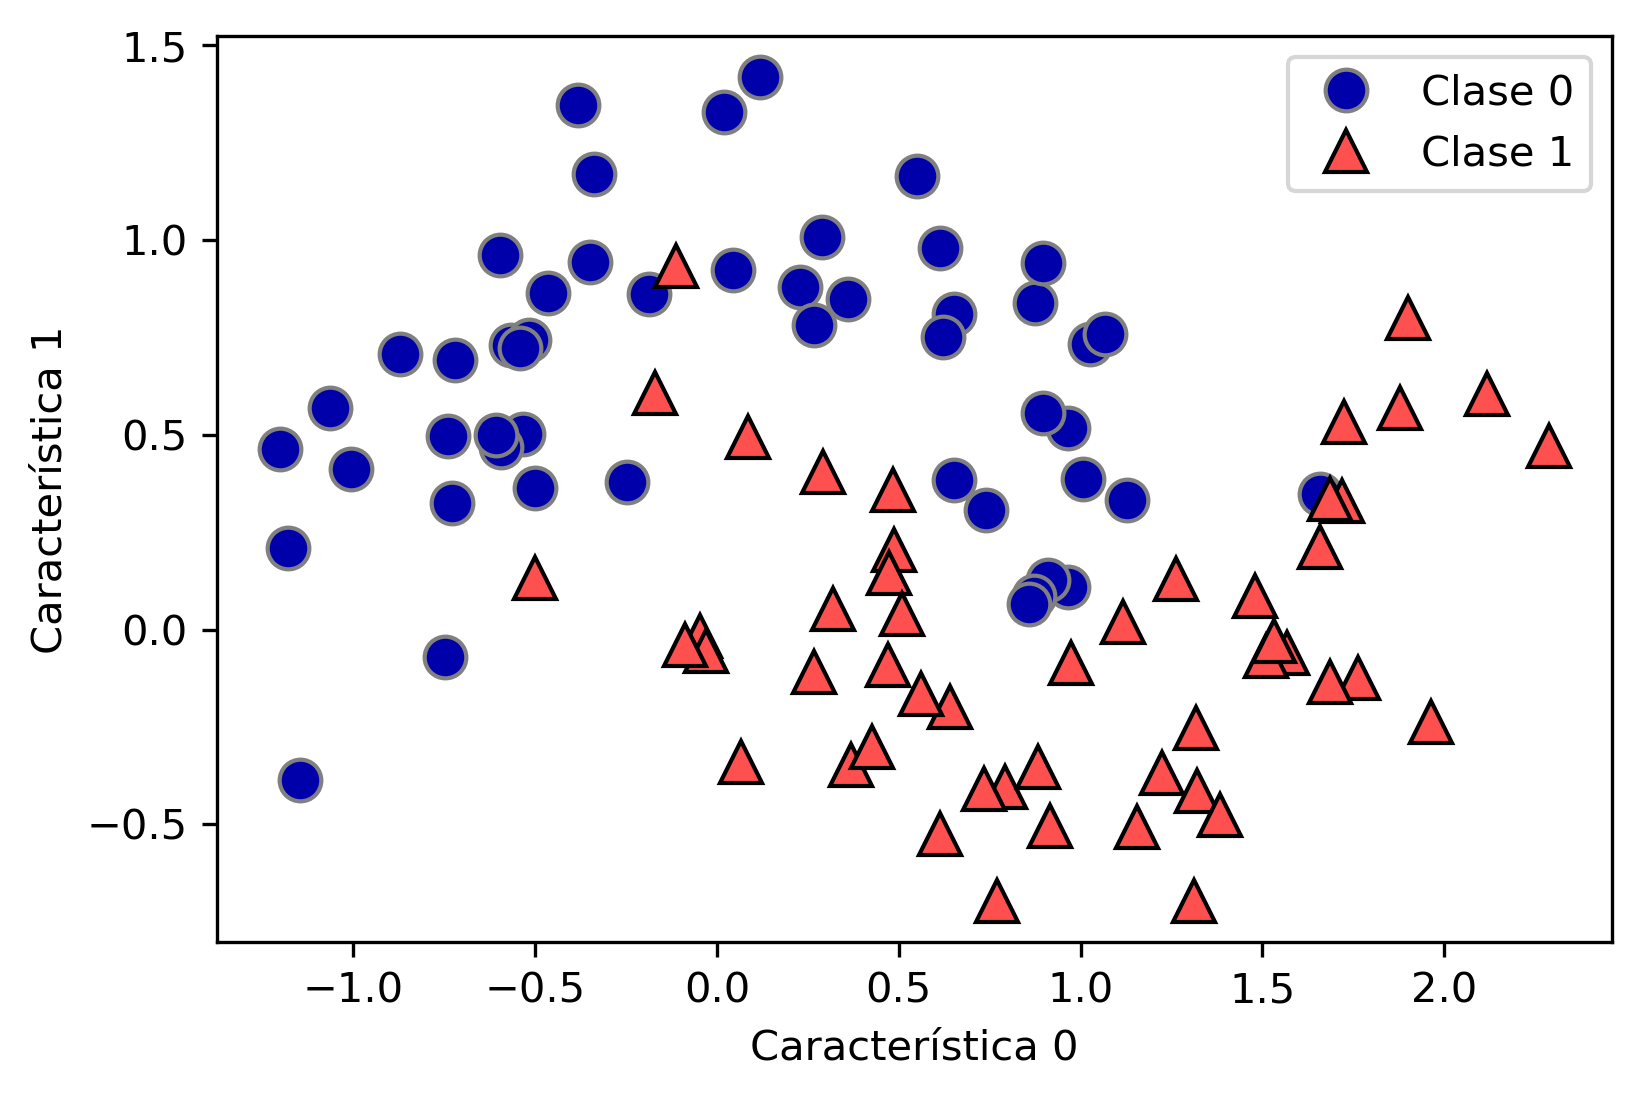

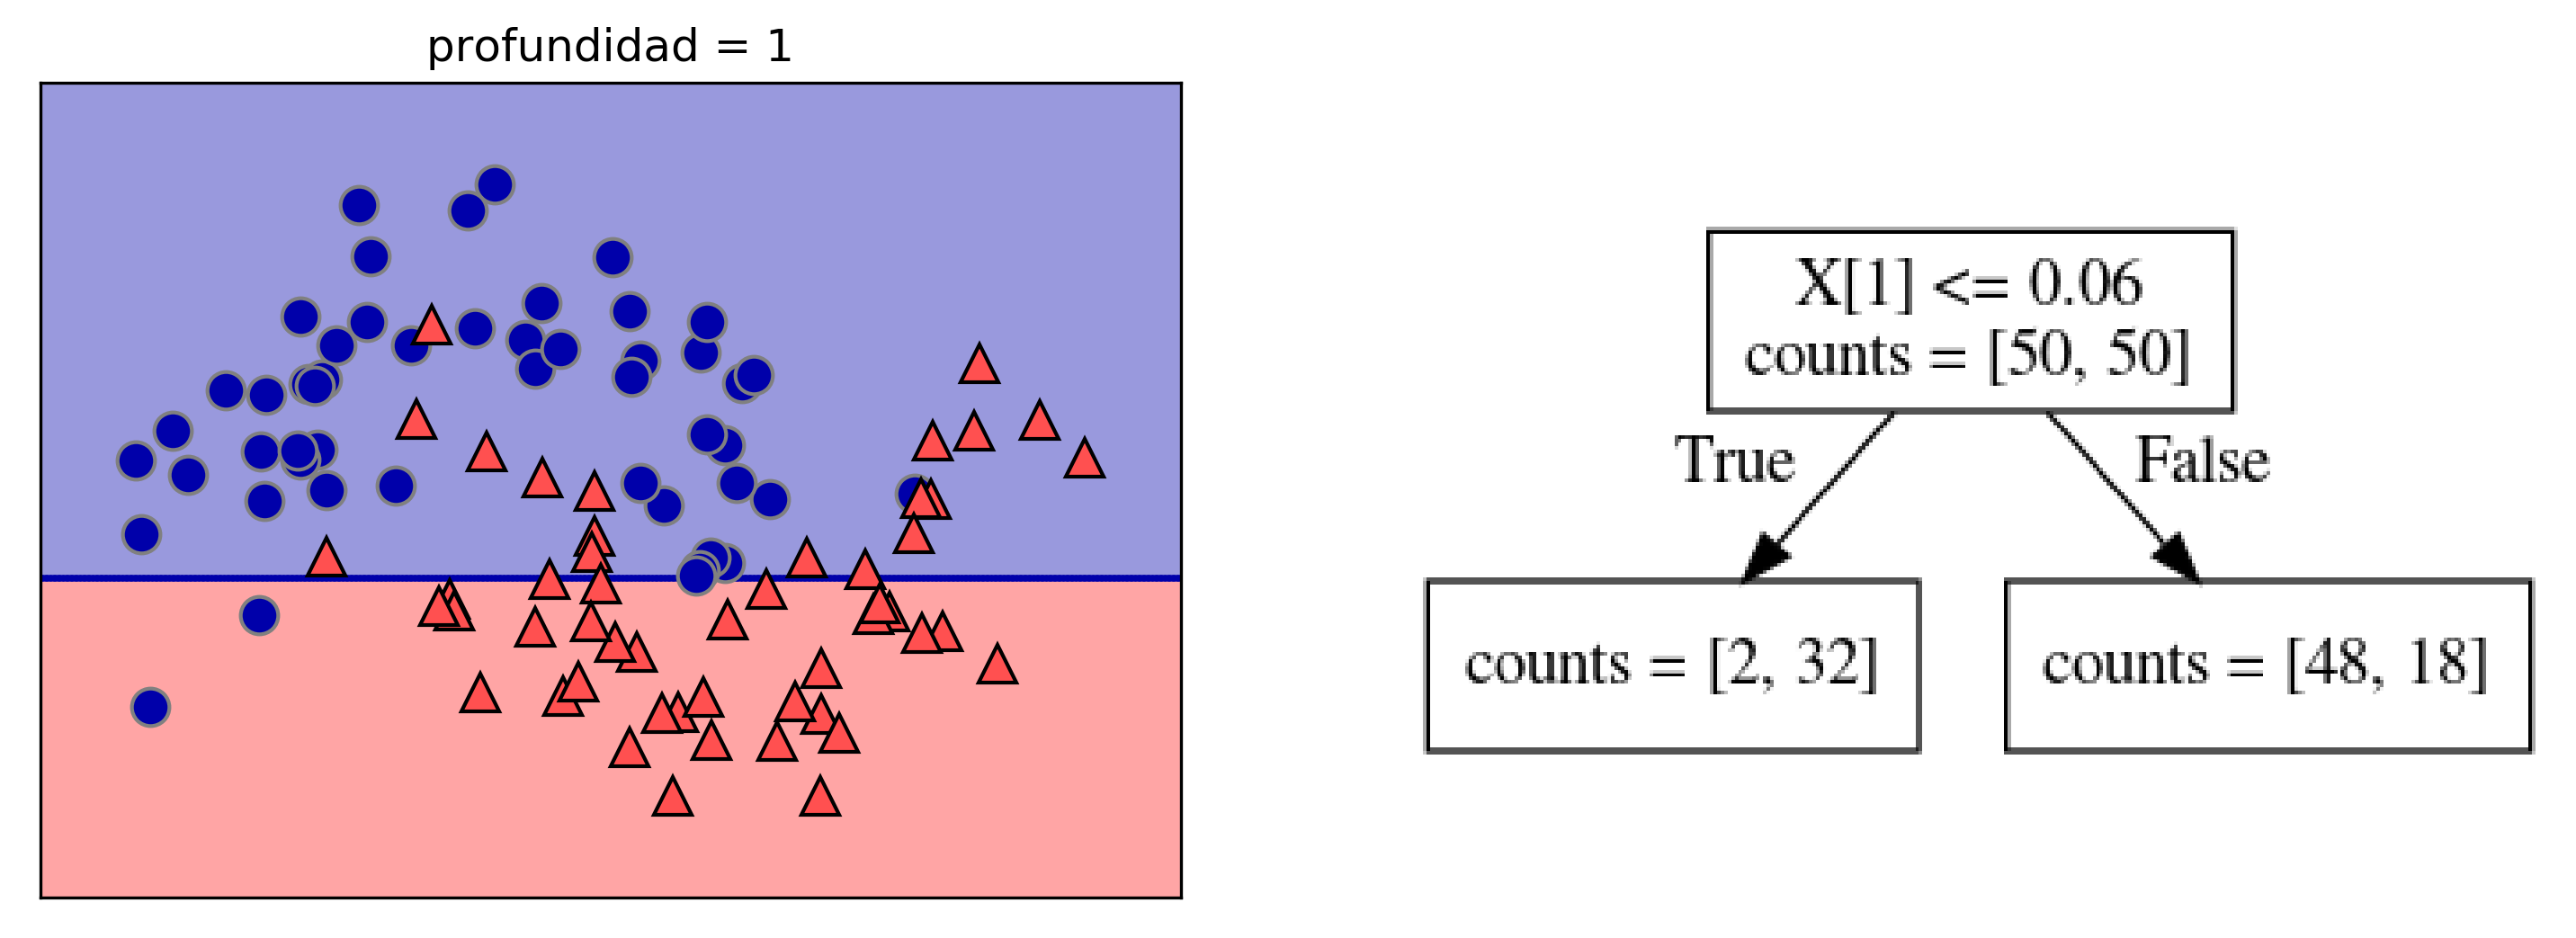

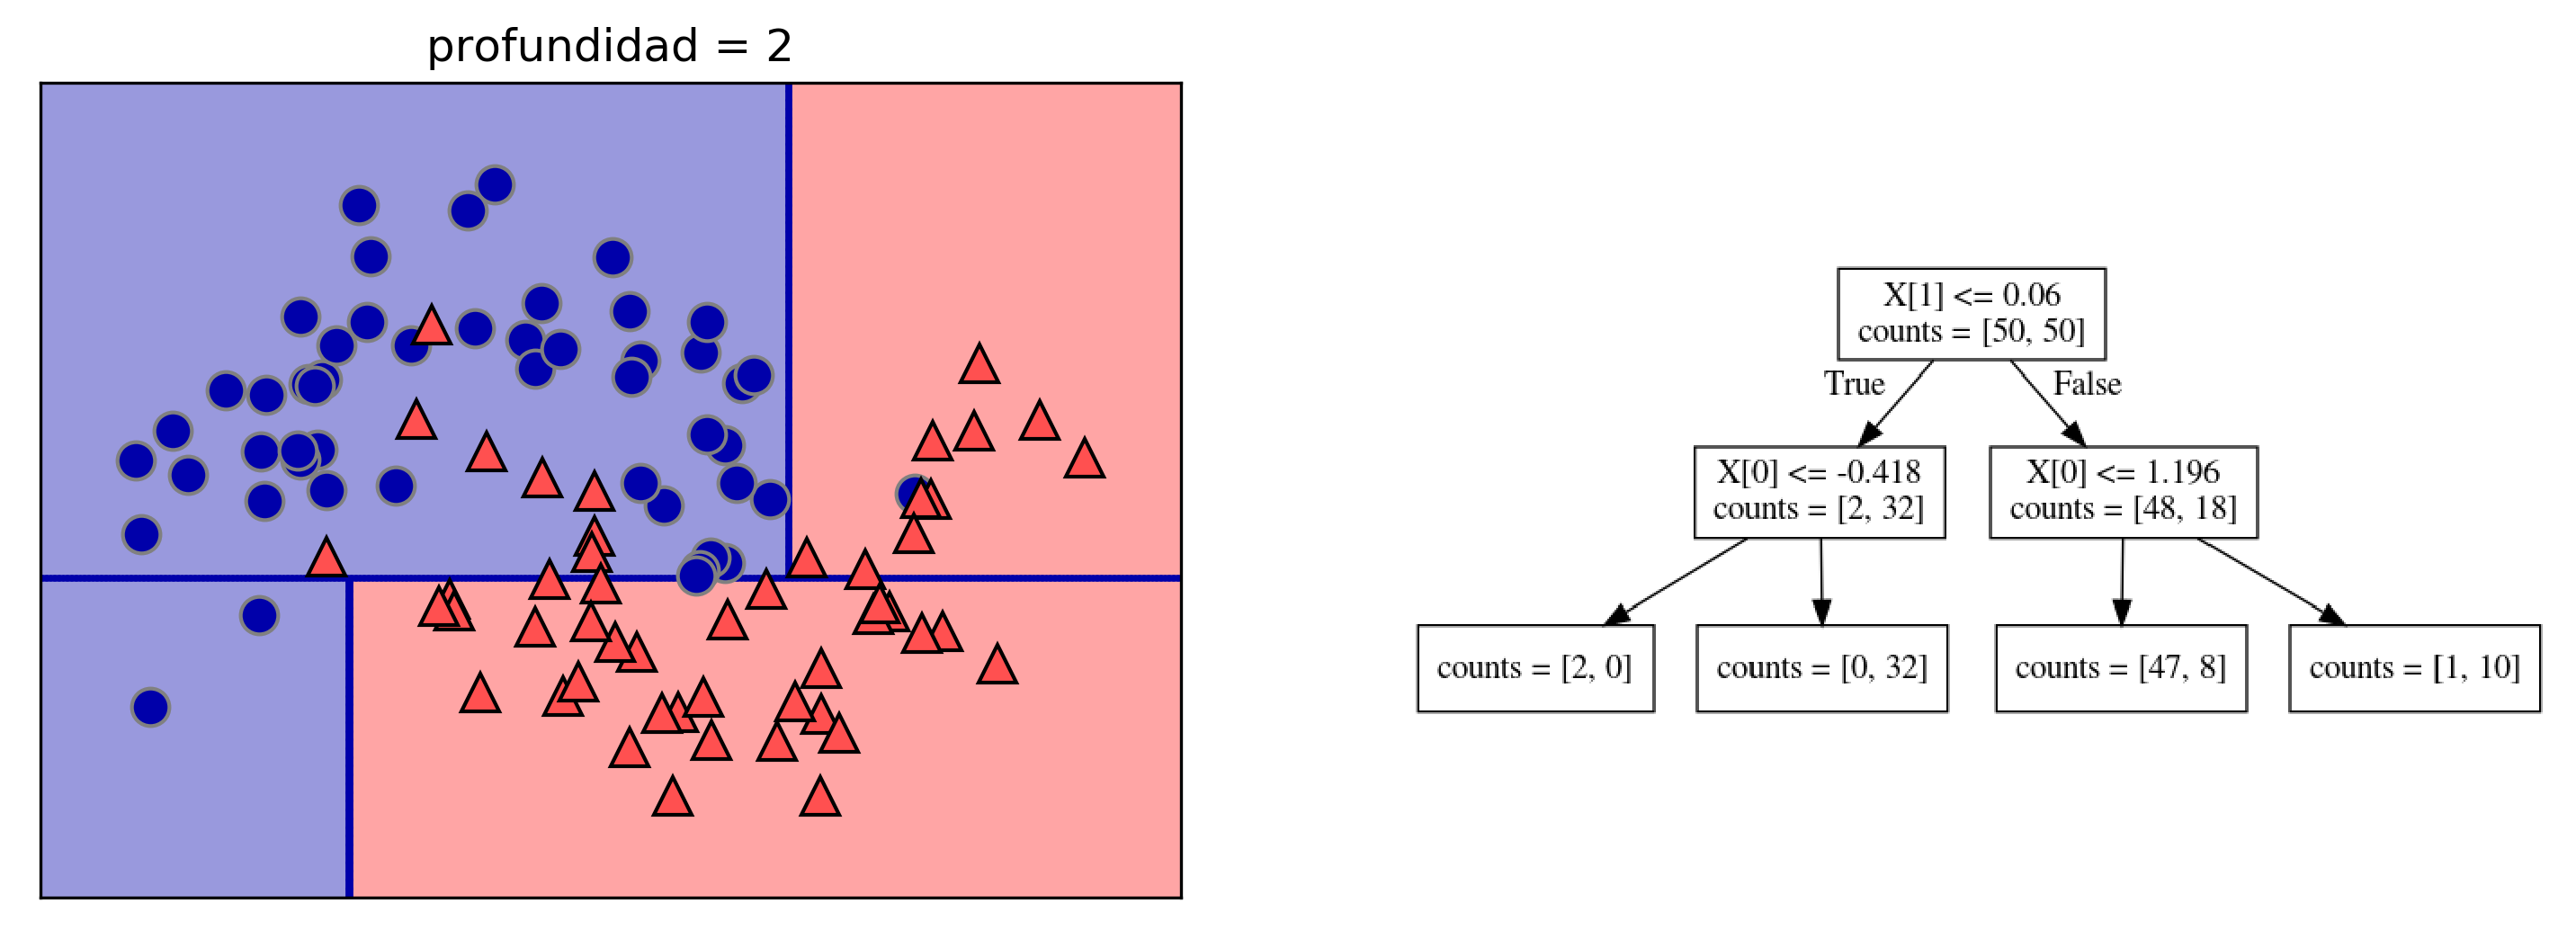

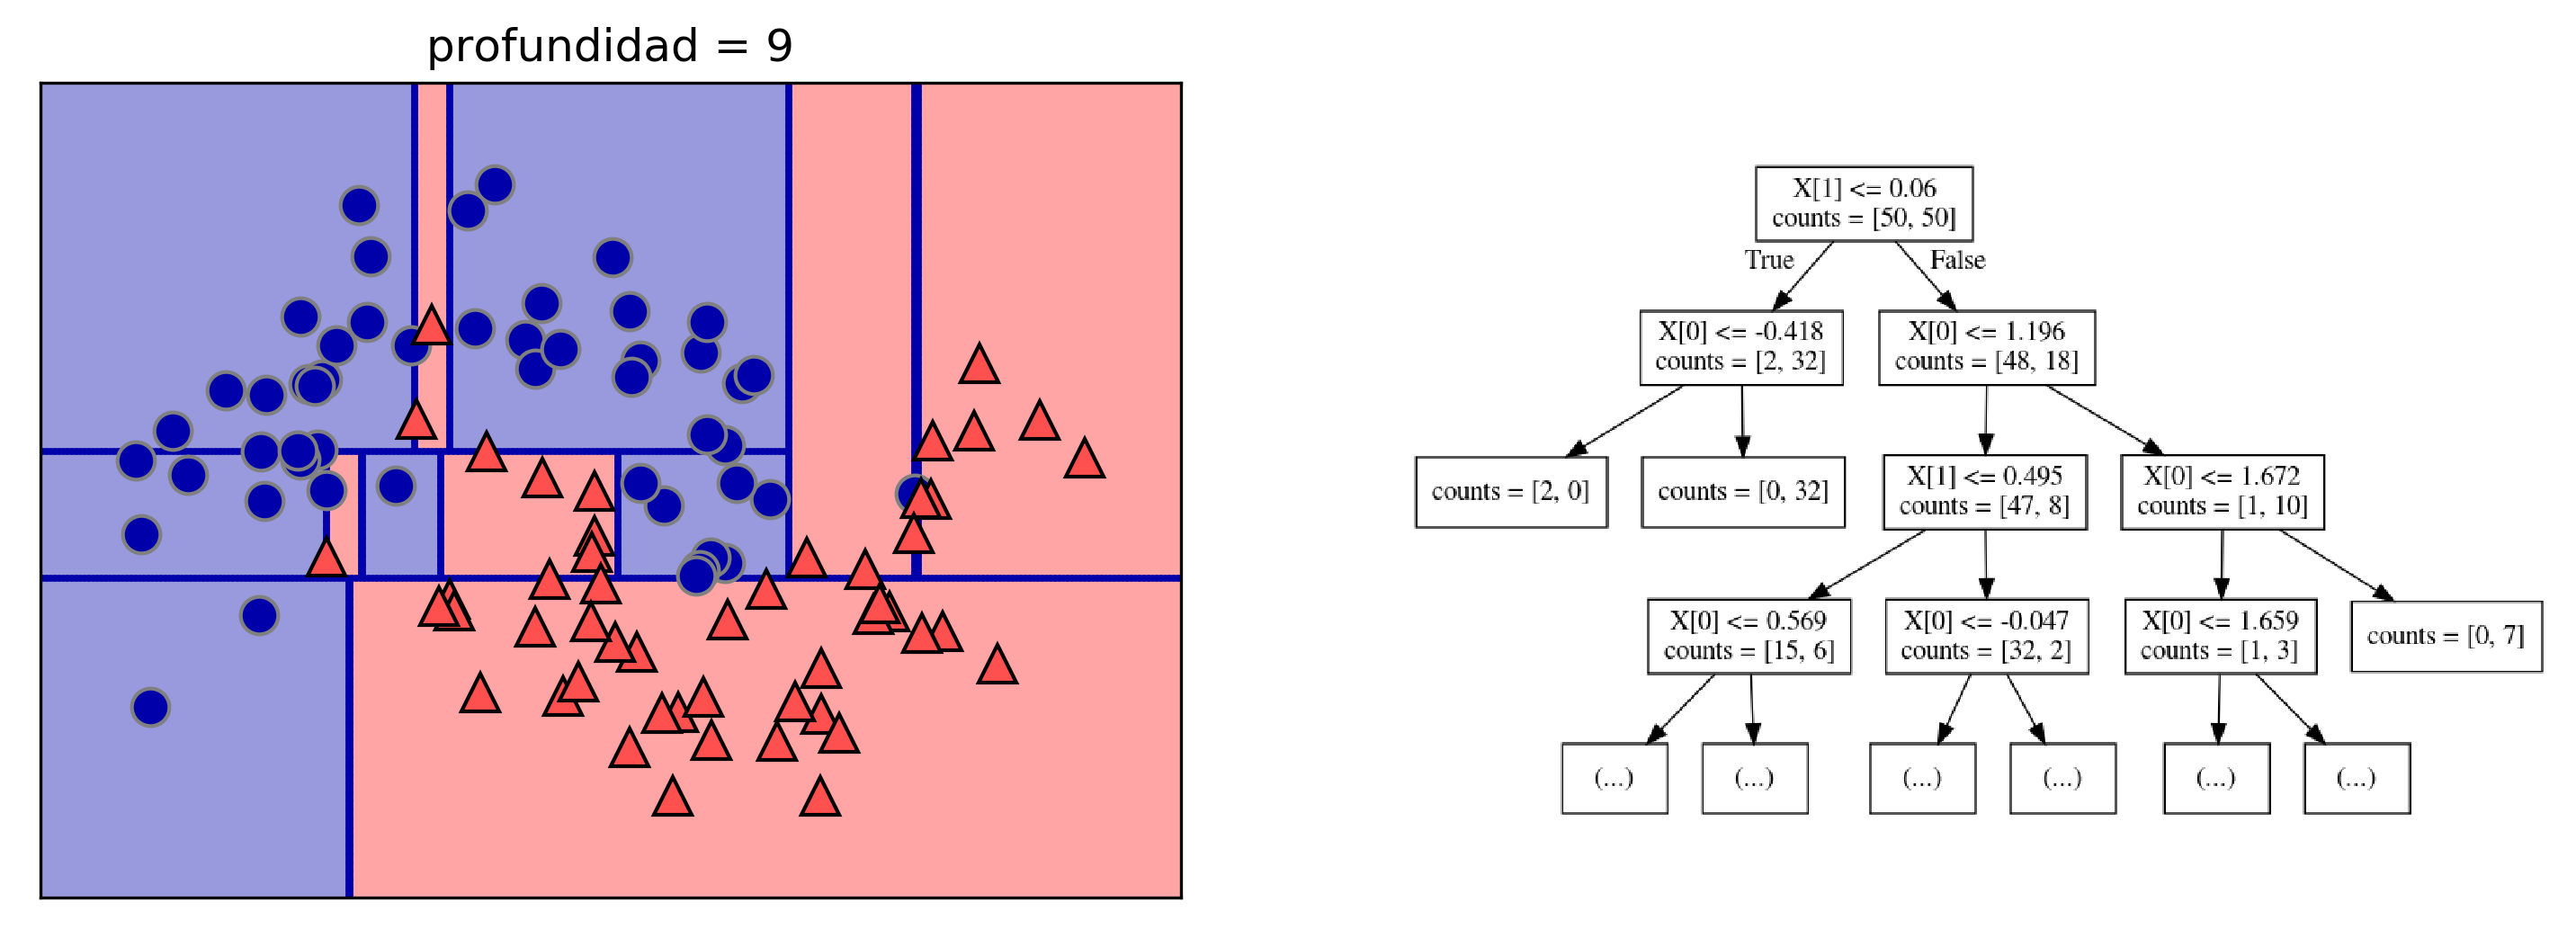

In [4]:
mglearn.plots.plot_tree_progressive()

**Discusión**

Todo este proceso, como puede intuirse, conduce a la construcción de árboles que son complejos y que sobreajustan mucho los datos de entrenamiento cuando su profundidad es elevada, como se puede ver en el ejemplo con produnfidad 9, donde hay líneas que cubren solamente rojos y azules y que provienen de hojas puras. 

Este exceso de profundidad nos lleva a la existencia de *overfitting*, mostrado por la existencia de hojas puras, llevándonos hasta un aciero del 100% del training set.

El tipo de fronteras de decisión así configuradas no es de la clase que uno se esperaría encontrar; hay demasiado foco en outliers y poco en elaborar un borde con un buen grado de generalización.

Estas técnicas, se van a explicar a continuación:

### Control de la precisión de los árboles de decisión

Dos de las estrategias más comunes para evitar el sobreajuste son:

 - **Pre-prunning**: consiste en parar anticipadamente la construcción del árbol, por ejemplo limitando la profundidad máxima del árbol, el número máximo de hojas, o requerir la presencia de un número mínimo de muestras en un nodo para poder seguir adelante.
 - **Post-prunning**, o simplemente **prunning**: consiste en construir el árbol completo, pero eliminar posteriormente nodos que contienen poca información.

Los árboles de decisión se implementan en Scikit-Learn con las clases `DecisionTreeRegressor` y `DecisionTreeClassifier`. classes. Scikit-learn sólo implementa estrategias de pre-pruning.

Vamos a echar un vistazo al efecto del pre-prunning en más detalle en nuestro dataset de cáncer de mama. En principio, usamos la configuración por defecto para construir el árbol completo, que implica su crecimiento hasta que todas las hojas son puras.

Para controlar la complejidad se suele utilizar:
- `max_depth`
- `max_leaf_nodes`
- `min_samples_leaf`

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargar el Breast Cancer Dataset
cancer = load_breast_cancer()
# Partir el dataset alrededor del target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Instanciar un modelo y entrenarlo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Evaluarlo
print("Precisión en el training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}".format(tree.score(X_test, y_test)))

Precisión en el training set: 1.000
Precisión en el test set: 0.923


**Discusión**

Como esperábamos, la precisión sobre el training set es del 100%, provocando un overfit increíbles, ya que todas las hojas son puras. Es decir, el modelo ha memorizado todos los datos. La precisión sobre el test set es un poco peor que en los modelos lineales que ya hemos visto, en los que alcanzábamos alrededor del 95%.


Si no restringiesemos la profundidad, el árbol se volvería innecesariamente profundo y complejo, y eso no generalizaría bien los datos. Si hacemos pre-prunning, pararemos el desarrollo del árbol antes de que los datos se memoricen.

Una de las opciones que hemos comentado es limitar la profundidad máxima. Vamos a fijar el parámetro ``max_depth=4``, haciendo que sólo se hagan cuatro decisiones. La precisión de entrenamiento bajará, sin duda, pero a cambio de un incremento de la precisión en test:

In [30]:
# Instanciar un modelo y entrenarlo
#SE hace con max_depth=4 con un nodo raíz, dos nodos intermedios y uno de hojas
tree = DecisionTreeClassifier(max_depth = 4, random_state=42)
tree.fit(X_train, y_train)

# Evaluarlo
print("Precisión en el training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}".format(tree.score(X_test, y_test)))

Precisión en el training set: 0.988
Precisión en el test set: 0.944


### Análisis de los árboles de decisión

Podemos visualizar el árbol utilizando la función `export_graphviz` incluida en el módulo `tree`. Esta función graba el árbol en un fichero de tipo `.dot`, que es un formato texto para describir árboles.

Usamos una opción para colorear los nodos para reflejar la clase mayoritaria en cada uno y le pasamos los nombres de clases y caracterísitcas:

In [31]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["maligno", "benigno"], feature_names=cancer.feature_names,
               impurity=False, filled=True)

In [32]:
!ls

 07_amadeus_data_science_challenge.ipynb
 07_Exercise_03.ipynb
 07_Exercise_04.ipynb
 10-11_Python_AmadChall_v20.pptx
 Apuntes_R.R
 babies_r.R
 babies.txt
 bookings_sample.csv.bz2
 cache
 ch_03-Empty.ipynb
 ch_04-Empty.ipynb
 DataSets
'DataSets(1).zip'
'DataSets (2)'
'DataSets(2).zip'
 DataSets.zip
 DataWranglingCleaningFSC.pdf
 DataWranglingCleaningFSC.Rmd
 DataWranglingCleaning.Rmd
'Data Wrangling.R'
 ejemplo_mtcars.R
 Ejercicio_mtcars.r
 Ejercicios.7z
 FINAL_Visualization.pdf
 FINAL_Visualization.Rmd
 Gapminder.csv
 ggplot2movies_example.R
 IntroR_II.pdf
 IntroR_II.rmd
 kschool-supervised-learning-master.zip
 life-expectancy-and-fertility-two-countries-example.csv
 life_expentancy_example.R
 murders.csv
 NHANES.txt
 pres.pdf
'progit_v2.1.19(1).pdf'
 R_analysis_murders.R
 RIntro_FINAL.pdf
 RIntro_FINAL_Students.Rmd
 R-Ubuntu-Install.txt
 Supervised-Learning-Day_1_Solution.ipynb
 Supervised_Learning.ipynb
'Supervised Learning KSchool - Master Data Science 20nd Ed - Dia 1.pptx'
 tragap

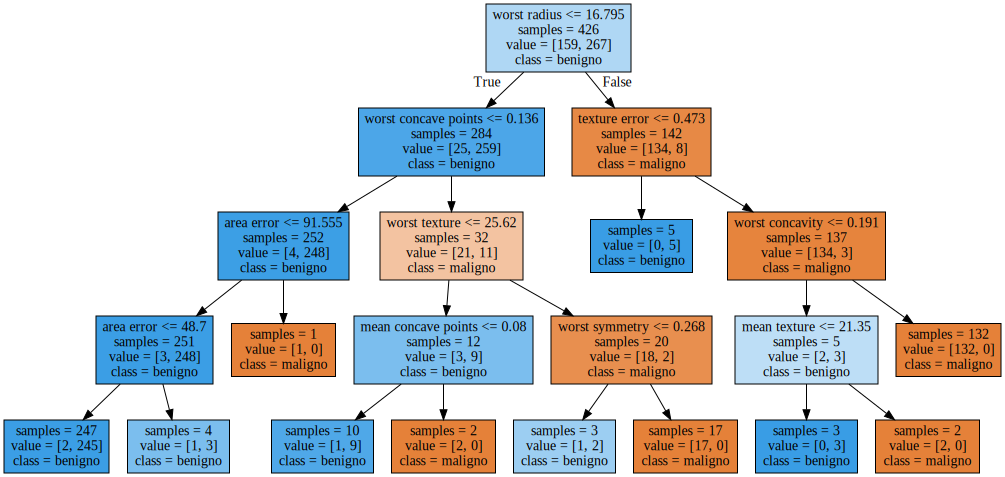

In [33]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

**Discusión**

La visualización del árbol nos da una buena visión de cómo el algoritmo hace predicciones en detalle, y es además un buen ejemplo de funcionamiento de algoritmo de Machine Learning que puede ser explicado con facilidad a legos en la materia.

Pero incluso con un límite de cuatro niveles de profundidad, el árbol puede volverse difícil de gestionar. Con 10 niveles, es prácticamente ininteligible.

Un método de inspeccionar cómo está comportándose el árbol es visualizar la ruta que están siguiendo los datos. Si vamos hacia la derecha, vemos que worst radius <= 16.795 crea un nodo que contiene sólo 8 muestras benignas pero 134 malignas. De las 142 muestras que fueron para la ramificación derecha, casi todas ellas terminaron en una hoja a la derecha del todo (132).

Si desde la raíz vamos hacia la izquierda, para worst radius > 16.795, acabamos con 25 malignas y 259 benignas. Casi todos las muestras benignas acaban en la segunda hoja de la derecha (254 muestras benignas), con al mayoría de las otras hojas con muy pocas muestras benignas.

Por ello, podríamos intentar mejorar el modelo reduciendo aún más `max_depth` o modificando `min_samples_leaf` o `max_leaf_nodes`

### Importancias de las características

En vez de mirar el árbol completo, que puede ser demasiado, hay algunas propiedades útiles que podemos sacar para resumir cómo está funcionando el árbol. 

La más usada es la llamada importancias de las características (*feature importance*), que puntúa cómo de importantes es cada característica para cada una de las decisiones que toma el árbol. Es un número $\in[0,1]$ para cada característica, donde 0 significa "no usada en absoluto" y 1 significa "predice perfectamente el objetivo". Las importancias de las características siempre suman uno:

In [89]:
print("Importancia de las características:")
print(tree.feature_importances_)

Importancia de las características:
[0.    0.013 0.    0.    0.    0.    0.    0.014 0.    0.    0.    0.048
 0.    0.013 0.    0.    0.    0.    0.    0.    0.727 0.033 0.    0.
 0.    0.    0.018 0.122 0.012 0.   ]


Podemos visualizar estas importancias de manera similar a la que visualizábamos los coeficientes en los modelos lineales:

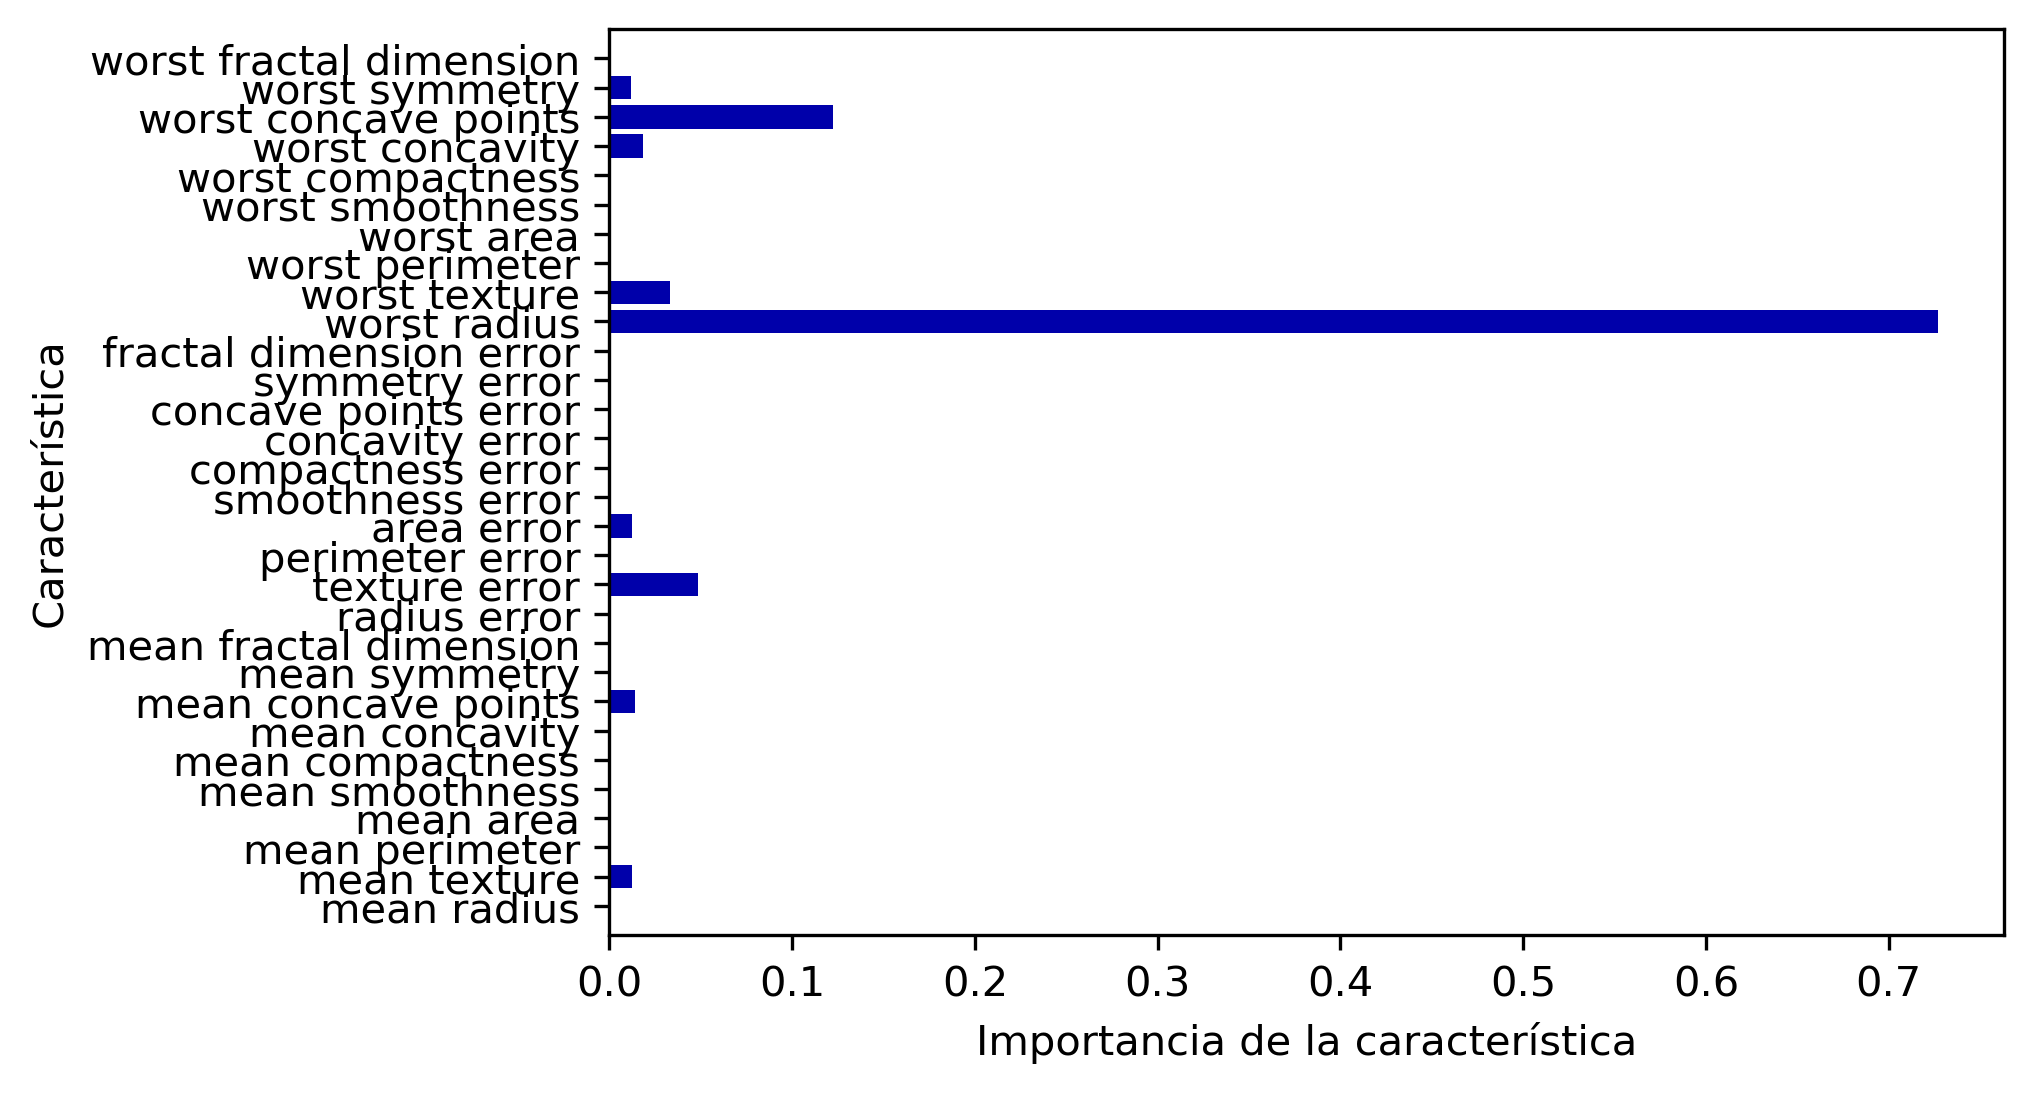

In [90]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importancia de la característica")
    plt.ylabel("Característica")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

**Discusión**

Se ve, como se esperaba, que la característica que aparece en el nodo raíz ("worst radius") es de lejos la más importante. Esto confirma nuestas observación en el análisis del árbol que el primer nivel separa las diferentes clases bastante bien.

Sin embargo, que una característica tenga una importancia relativamente baja no quiere decir que no sea informativa. Sólo significa que dicha característica no fue elegida por el árbol, seguramente porque hay otra característica que codifica la misma información.

En contraste con los coeficientes de los modelos lineales, las importancias de las características son siempre positivas y no codifican de qué clase es indicativa una característica. La importancia de una característica nos dice que "worst radius" es importante, pero no nos dice si es indicativo de una muestra maligna o benigna. De hecho no existe una relación tan sencilla entre características y clases, tal y como puede verse en el siguiente ejemplo:

Feature importances: [0. 1.]


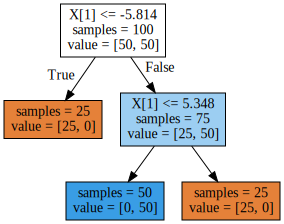

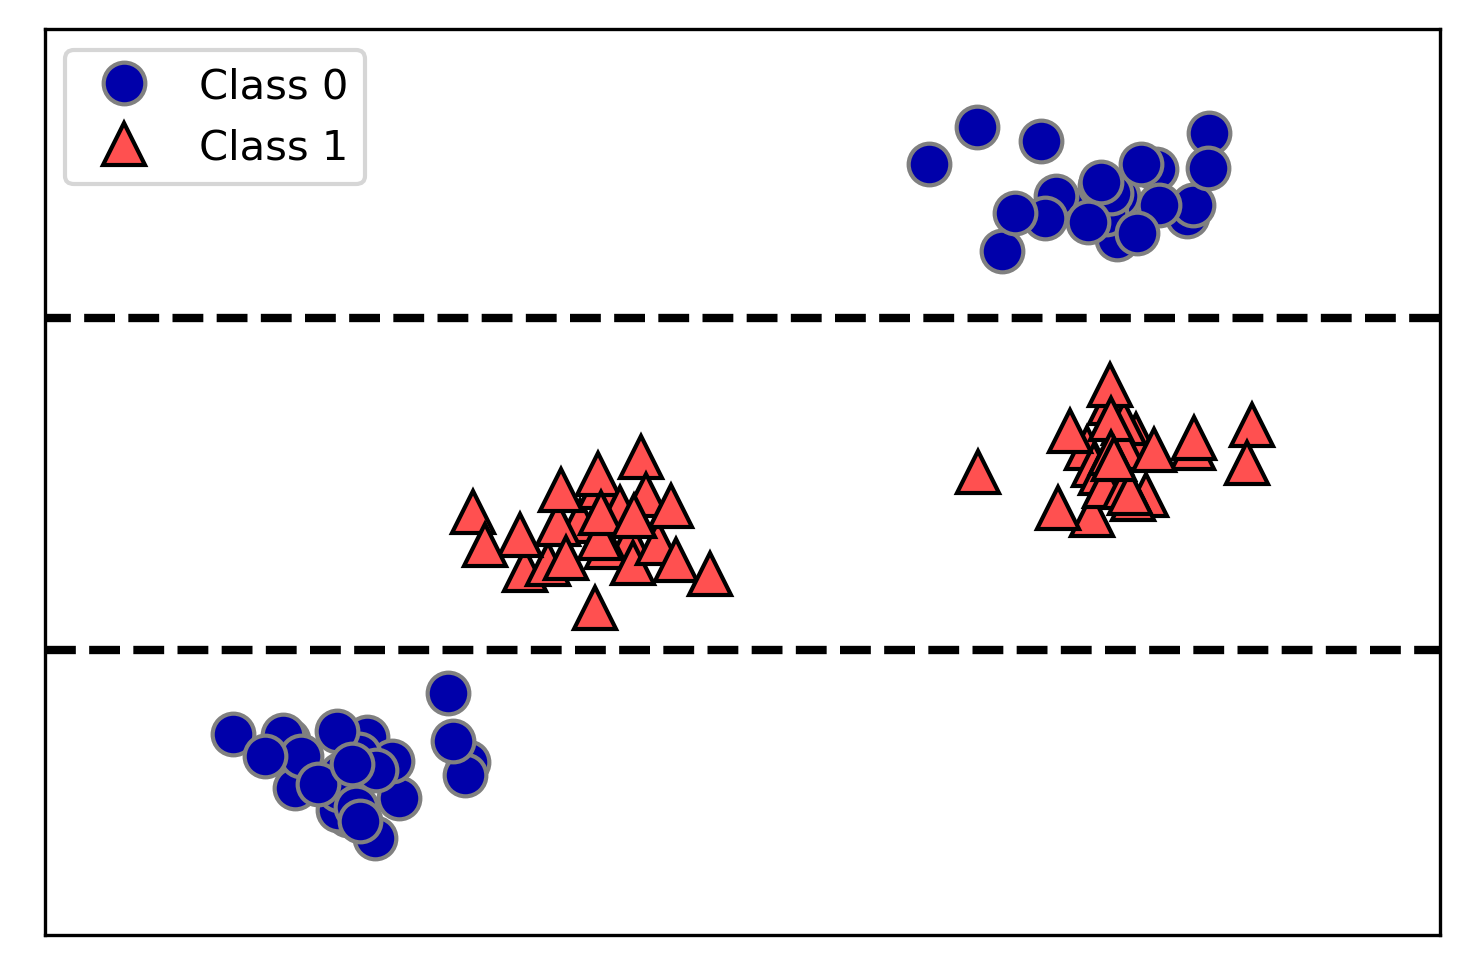

In [92]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**Discusión**

Este gráfico muestra un dataset con dos características y dos clases. En este caso, toda la información está contenida en $x_1$, mientras que $x_2$ no se usa en absoluto. Pero la relación entre $x_1$ y la clase resultante no es monótona, en el sentido en que podamos decir que un valor elevado de $x_1$ significa clase 0, y uno bajo significa clase 1 o viceversa.

Aunque la discusión aquí se ha centrado en árboles de decisión para clasificación, todo lo dicho es válido también para regresión, implementado en Scikit-Learn por la clase `DecisionTreeRegressor`. El uso y análisis es muy mimilar, con mención especial al hecho de que no se pueden hacer extrapolaciones para hacer predicciones fuera del rango de los datos.

### Árboles de decisión vs Regresiones lineales

Echemos un vistazo a esto en más detalle usando un dataset de precios históricos de RAM:

Text(0, 0.5, 'Precio en USD/MB')

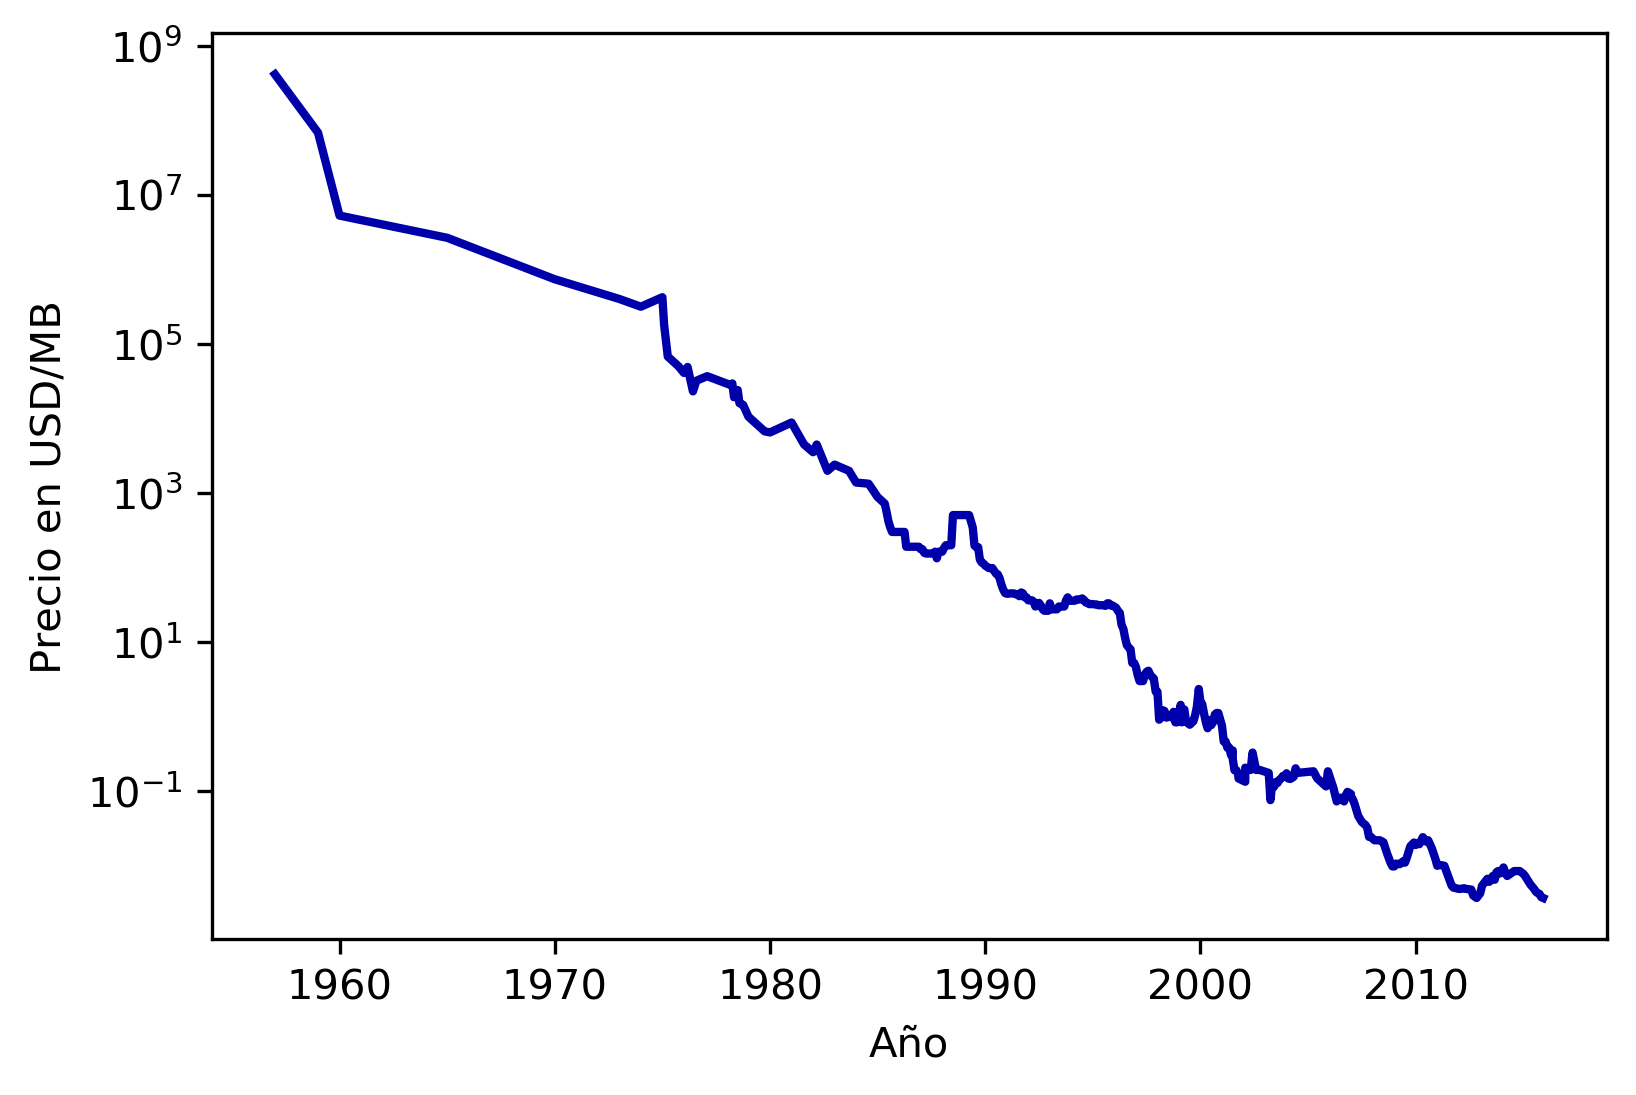

In [96]:
import os
ram_prices = pd.read_csv("data/ram_price.csv")

#Con Semilogy se ha hecho la transformación logarítmica, porque quiero que tenga una tendencia más o menos lineal
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Año")
plt.ylabel("Precio en USD/MB")

Nótese la escala logarítmica del eje de ordenadas. Cuando se grafica logarítmicamente, la relación entre año y precio en dólares/Mb parece lineal y relativamente sencilla de predecir (salvo algunas crestas).

Hagamos una predicción para los años posteriores al 2000 usando los datos históricos hasta este punto, contando con la fecha como única característica. Comparararemos dos modelos sencillos: `DecisionTreeRegressor` y `LinearRegressor`, reescalando los precios logarítmicamente para tener una relación lineal. Esto no supone una diferencia en cuanto a `DecisionTreeRegressor` pero sí para `LinearRegression`. Una vez entrenados los modelos y hechas las predicciones, aplicamos un mapeo exponencial para deshacer la transformación logarítmica.

Haremos predicciones sobre el dataset completo por razones de visualización, aunque para una evaluación cuantitativa deberíamos considerar sólo el dataset de test:

Aplicamos una regresión lineal y un árbol de decisión para hacer predicciones y comparar:

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis] #Lo convertimos en vector columna
y_train = np.log(data_train.price) #Lo convertimos en logaritmo

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis] #Aquí también convertimos en vector columna

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree) #Hacemos una exponencial para deshacer la transformación logarítmica
price_lr = np.exp(pred_lr)

Ahora, dibujamos  las predicciones para comparar los modelos con los datos de partida:

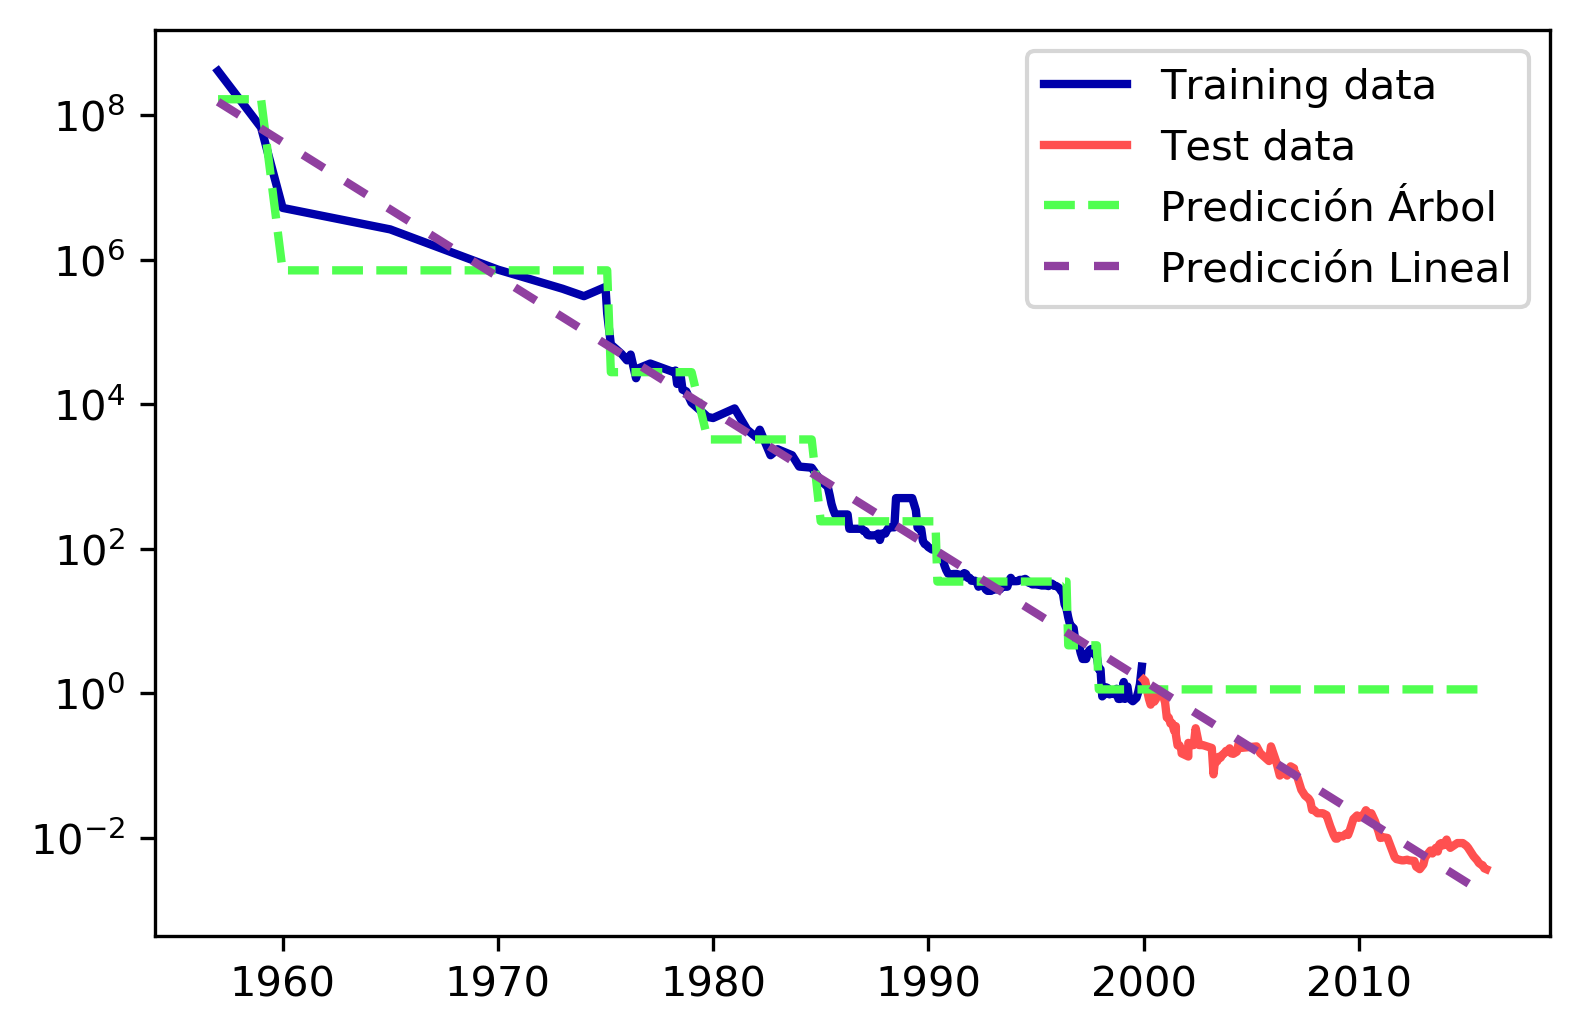

In [100]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Predicción Árbol")
plt.semilogy(ram_prices.date, price_lr, label="Predicción Lineal")
plt.legend()

**Discusión**

La diferencia que puede apreciarse entre el Árbol de decisión y el modelo lineal es importante.

El modelo lineal aproxima con una recta, como ya sabíamos que ocurriría, y la línea da una buena predicción de los datos de test omitiendo las variacionesque ocurren en ambos datasets.

El árbol de decisión por el contrario hace una predicción cuasi-perfecta en el dataset de entrenamiento. Sin embargo, una vez abandona el intervalo para el cual tiene datos, reutiliza la predicción del último datapoint del intervalo conocido para emitir predicciones en el dataset de test. El árbol no es capaz de generar respuestas nuevas fuera de lo que ha podido ver en el dataset de training. Esta limitación es de aplicación en todos los modelos basados en árbol.

Es decir, el DecissionTree no sabe evaluar tendencias, así que a partir del 2000 se queda con el último precio, mientras que la regresión lineal si es capaz de inferir resultados futuros.

Por todo ello, todo lo que se vea afectado por una tendencia, es mejor usar una regresión.

## Mejorando árboles de decisión: Métodos de ensemble
Los métodos de ***bagging***, ***random forests*** y ***boosting*** nos permiten mejorar sustancialmente el rendimiento predictivo de modelos basados en árboles, aunque con el inconveniente de una considerable reducción en la facilidad de interpretación del modelo final. Estos métodos también se conocen como **métodos de ensemble** o métodos combinados, que son los que utilizan múltiples algoritmos de aprendizaje para obtener predicciones que mejoren las que se podrían obtener por medio de cualquiera de los algoritmos individuales. Son aplicables a muchos métodos de aprendizaje estadísticos (no solo árboles de decisión) para regresión o clasificación.


## Ensembles de árboles de decisión
### Bootstrapping
Los árboles de decisión sufren de alta varianza, lo que significa que, si dividiéramos al azar los datos de entrenamiento en dos grupos y ajustáramos un árbol de decisión a cada mitad, los resultados que obtendríamos podrían ser bastante diferentes. Por el contrario, un procedimiento o método con baja varianza dará resultados parecidos aun aplicándose sobre sets de datos distintos. El método de ***bagging*** o ***bootstrap aggregation*** es un procedimiento utilizado para reducir la varianza de un método de aprendizaje estadístico, usado muy frecuentemente con árboles de decisión.

Se basa en que promediar un grupo de observaciones reduce la varianza y, por lo tanto, aumenta la precisión. De esta forma, el ***bootstrapping*** toma diferentes muestras como set de entrenamiento, de tal manera que este va rotando y devolviendo diferentes resultados y finalmente, los promedia.

Cuando se combinan múltiples árboles mediante bagging, no es posible representar gráficamente el modelo resultante mediante un árbol, y no es identificable de manera inmediata qué variables son las más importantes. Por tanto, bagging mejora la predicción del modelo a expensas de la pérdida de interpretabilidad.

## Random Forests: un método mejorado para árboles de decisión

Supóngase que se cuenta con un set de datos cuenta con un predictor muy importante que destaca sobre el resto. En este caso, todos o casi todos los árboles generados por bagging usarán este predictor en la primera ramificación, por lo que acabarán siendo similares unos a otros, y las predicciones entre ellos estarán altamente correlacionadas. En este escenario, la aplicación de bagging promediando valores correlacionados no consigue una reducción sustancial de la varianza con respecto a un solo árbol.

El método de ***random forests*** proporciona una mejora a los árboles combinados por bagging en cuanto a que los decorrelaciona, teniendo en cuenta solo un subgrupo de predictores en cada división. Y al igual que en el bagging, se construyen un número de árboles de decisión a partir de pseudo-muestras generadas por bootstrapping. Sin embargo, esta vez, se escogen de entre todos los p predictores una muestra aleatoria de m predictores como candidatos antes de cada división. Esto hace que no tengan en cuenta el predictor más influyente, dando más oportunidades al resto.

Esto provoca que los ***random forests*** sean uno de los métodos más usados para regresión y clasificación.

Entre sus ventajas se destacan:
- Son potentes, funcionan sin mucha optimización paramétrica
- No requieren de escalado de los datos
- Comparten las ventajas de los árboles de decisión, sin sus inconvenientes.

Entre sus inconvenientes:
- No suministran una visión tan compacta del proceso de decisión como los árboles de decisión
- La construcción de un gran bosque consume recursos (parámetro n_jobs para paralelizar), son más lentos de entrenar o predecir que modelos lineales.
- No funcionan bien en datos de muy alta dimensión o dispersión(e.g. texto)

Para trabajar con ellos se ajustan los siguientes parámetros:
- n_estimators → mejor cuanto más grande
- max_features → empezar con valor por defecto
    - Clasificación: $(n\_features )^{2}$
    - Regresión: $log_2 (n\_features )$
- max_depth → pre prunning
- max_leaf_nodes → para reducir consumo recursos

### Análisis de los random forests

Vamos a construir un random forest con cinco árboles sobre el dataset `two_moons` que vimos anteriormente:

In [ ]:
# Importamos un RandomForestClassifier del paquete ensemble
from sklearn.ensemble import RandomForestClassifier

# Importamos make_moons
from sklearn.datasets import make_moons

# Usa make moons con 100 muestras
X,y = make_moons(n_samples=100, noise=0.25, random_state=42)
# Haz el split test / training
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Instancia y entrena un random forest con 5 estimadores
forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)

Los arboles construidos como parte del random forest se almacenan en el atributo `estimators_`. 

Vamos a visualizar ahora las fronteras de decisión aprendidas por cada árbol, junto con la predicción agregada hecha por el forest:

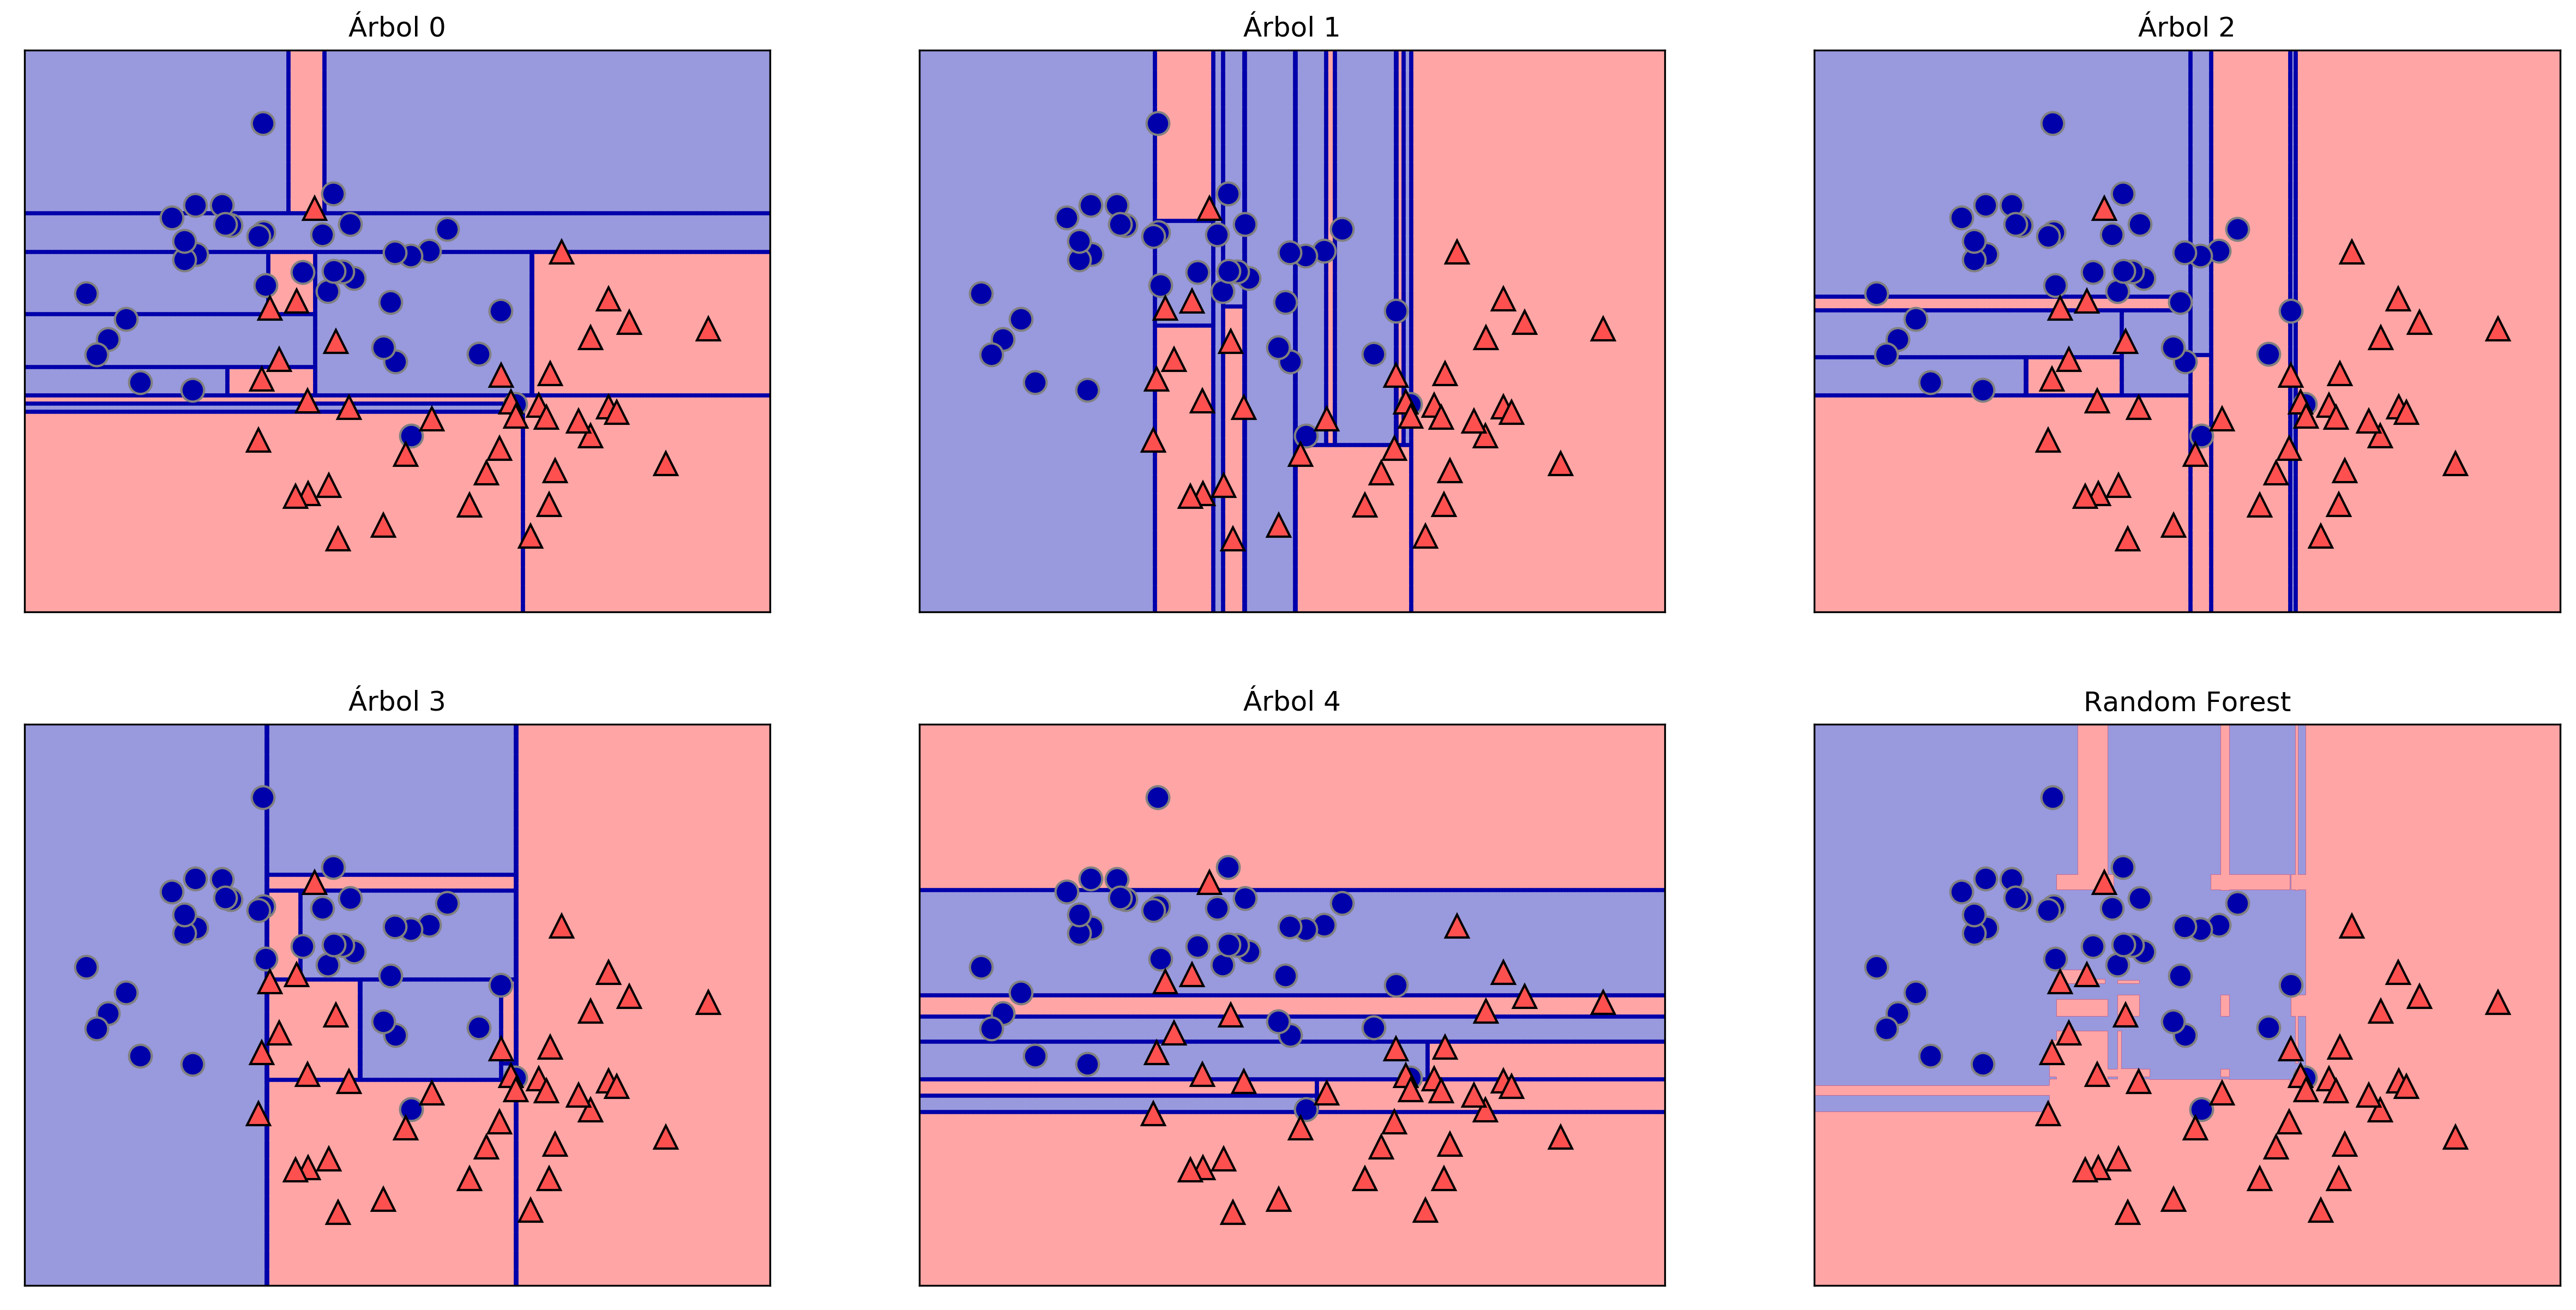

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# ravel(): devuelve un array aplanado de elementos contiguos
# Pasamos los árboles con el atributo _estimators_ a una 
# función visualizadora
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Árbol {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

**Discusión**

Puede verse con bastante claridad en los gráficos que la frontera de decisión aprendida por cada uno de los cinco árboles es bastante diferente. Cada uno de ellos comete errores ya que hay muestras de entrenamiento que no están incluidas en el dataset de entrenamiento del árbol en sí por efecto del bootstrapping.

El random forest sobreajusta menos que cualquiera de los árboles individuales, y por lo tanto suministra una frontera de decisión mucho más intuitiva. En un ejemplo real utilizaremos muchos más árboles (cientos o miles), lo cual producirán una frontera de decisión mucho más suave.

Pongamos un ejemplo más y construyamos una random forest de 100 árboles sobre el dataset de cancer de mama:

In [108]:
#from sklearn.datasets import load_breast_cancer
#cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(
    n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Precisión en el training set: {:.3f}"
      .format(forest.score(X_train, y_train)))
print("Precisión en el test set: {:.3f}"
      .format(forest.score(X_test, y_test)))

Precisión en training:  1.0
Precisión en training:  0.958041958041958


**Discusión**

El random forest nos da una precisión del 96%, mejor que la de los modelos lineales o la de un solo decision tree, sin tener que optimizar ningún parámetro. Podríamos ajustar el parámetro `max_features` o aplicar pre-prunning tal y como hicimos para el árbol de decisión único. Sin embargo, los valores por defecto parecer que funcionan bastante bien.

Al igual que el árbol de decisión, los random forests proporcionan importancia de características.  Éstas se calculan agregando las importancias de las características para todos los árboles del bosque. Lo habitual es que las importancias que suministra el random forest sean más fidedignas que las que suministra un único árbol.

Visualizamos las importancias de las características:

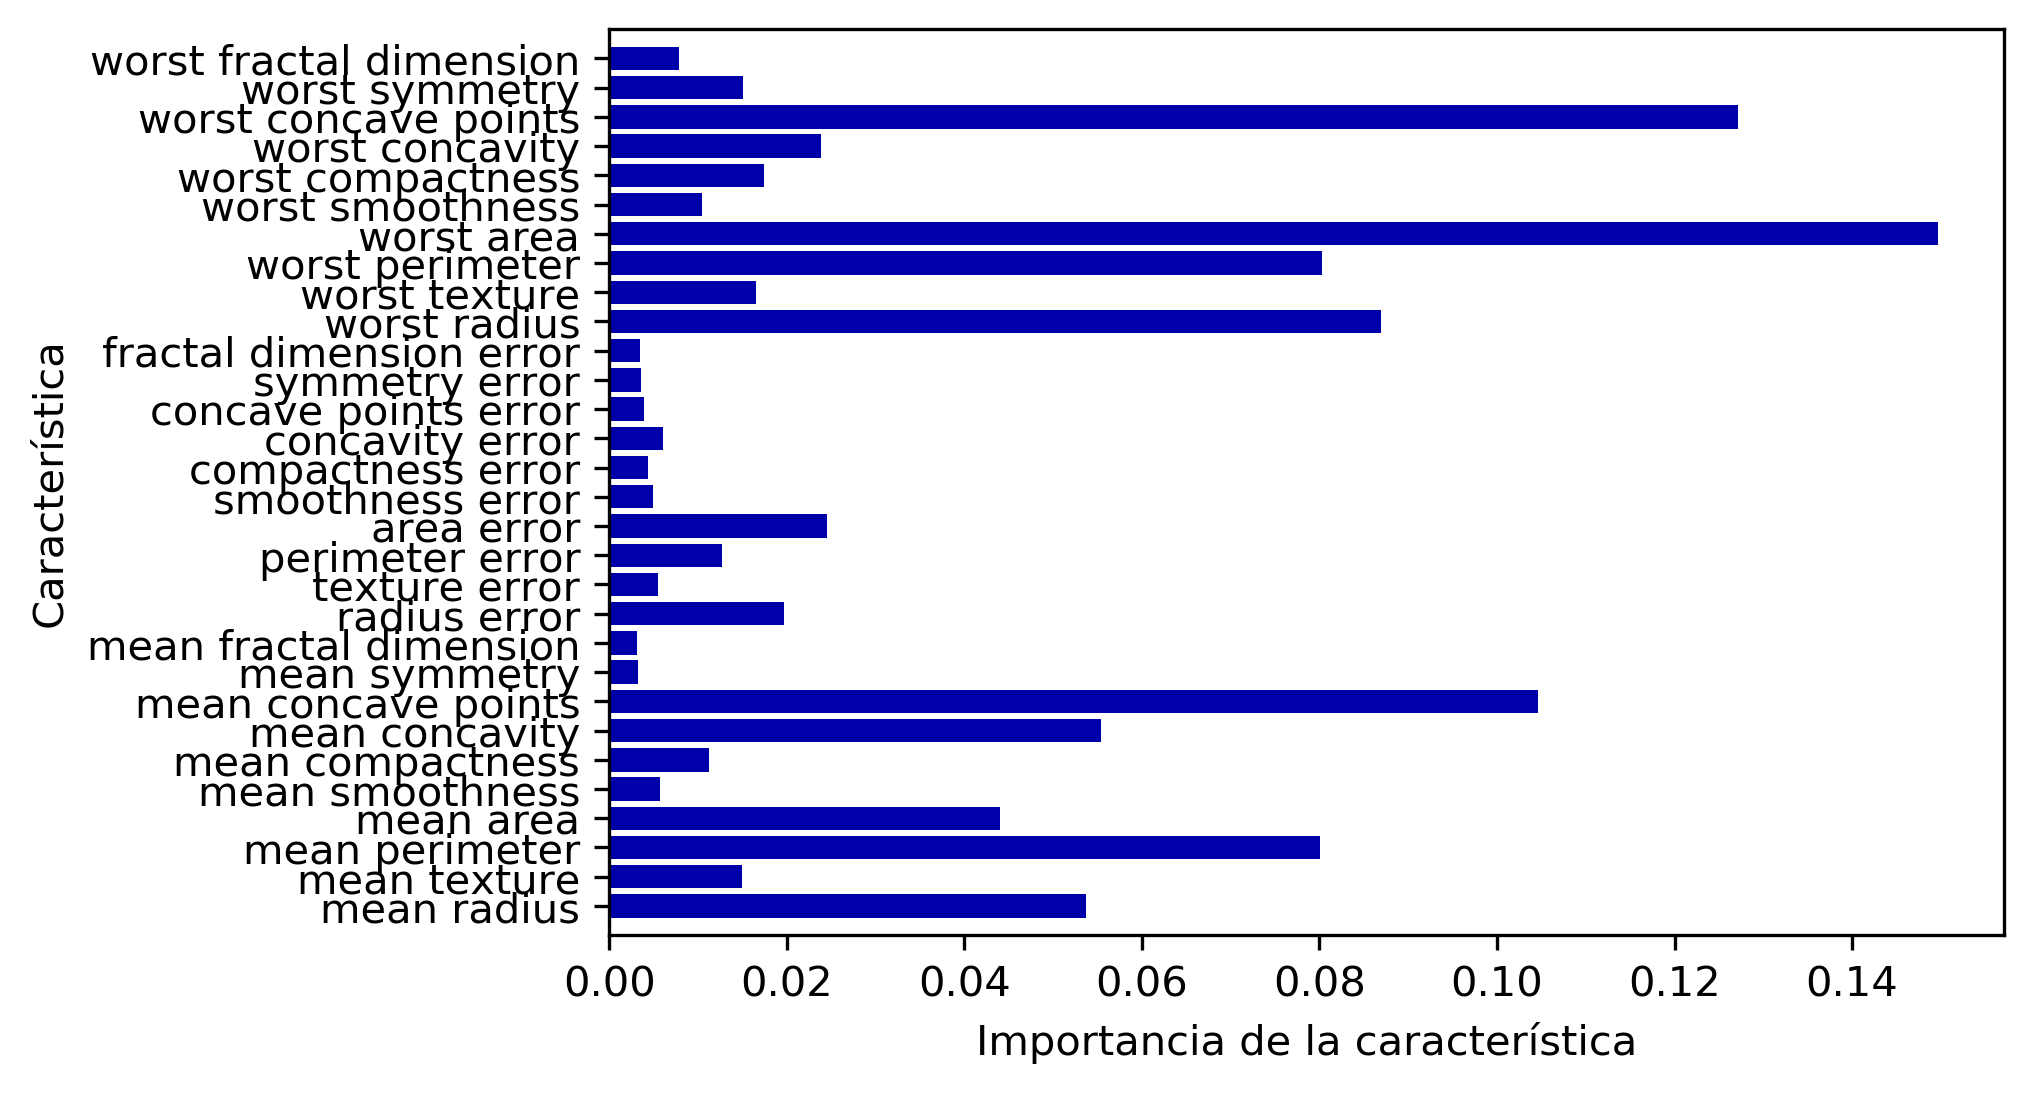

In [109]:
plot_feature_importances_cancer(forest)

**Discusión**
El random forest da una importancia distinta de cero a más caracteríscas que un único árbol, y al igual que éste, da mucha importancia a la característica *worst radius*. Sin embargo, elige *worst area* como la característica más informativa de todas. La aleatoriedad introducida en la construcción del random forest obliga al algoritmo a considerar múltiples explicaciones, con el resultado de que el random forest tienen una perspectiva más amplia de los datos que un único árbol.

### Análisis de las Gradient Boosting Machines

El Boosting funciona de manera parecida al bagging en cuanto a que combina un gran número de árboles, a excepción de que los árboles se construyen de manera secuencial: cada árbol se genera usando información, concretamente los residuos, de árboles previamente generados. Utiliza así los denominados **weak learners** es decir, evalúa qué ha fallado de los árboles anteriores para mejorarlo.

Otra diferencia es que boosting no utiliza remuestreo por bootstrapping, sino que cada árbol se genera utilizando una versión modificada del set de datos original. Los parámetros principales del algoritmo para generar árboles de regresión son:

-  Número de árboles (B). A diferencia del bagging y random forests, boosting puede sobreajustarse a los datos si el número de árboles es muy alto. B se selecciona por validación cruzada.

- Número de divisiones (d) en cada árbol, que controla el nivel de complejidad. Un valor de d = 1 (cada árbol contiene una única división, es decir, un único predictor) suele dar buenos resultados.

- Parámetro de penalización (λ), que controla el ritmo con el que boosting aprende. Valores comunes para este parámetro suelen ser 0,01 o 0,001, aunque la decisión depende del problema en cuestión. Por ejemplo, un valor muy pequeño de λ puede requerir un número elevado de árboles para conseguir buenos resultados.

Veamos un ejemplo de uso de `GradientBoostingClassifier` en el dataset de cáncer de mama. Por defecto, se usan 100 árboles de un máximo de tres niveles de profundidad y un learning rate de 0.1:

In [113]:
# Importamos GradientBoostingClassifier del mismo módulo ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Hacemos split train y test
X_train, X_tesy, y_train, y_test = train_test_split(cancer.data, cancer. target, stratify=cancer.target, 
                                                    random_state=42)

# Instanciamos y entrenamos el modelo
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

# Visualizamos las precisiones de ambos sets con 3 decimales
print("Precisión training: ", gbrt.score(X_train,y_train))
print("Precisión test: ", gbrt.score(X_test,y_test))

Precisión training:  1.0
Precisión test:  0.958041958041958


**Discusión**

La precisión en el training set indica que podemos estar sobreajustando. Para reducir este sobreajuste, podemos o bien aplicar un pre prunning más fuerte o bien bajar el parámetro learning rate:

In [114]:
# Reentrenamos aplicando prunning reduciendo la profundiad de los árboles a 1
gbrt = GradientBoostingClassifier(random_state=42, max_depth=1)
gbrt.fit(X_train, y_train)

# Visualizamos las precisiones de ambos sets con 3 decimales
print("Precisión training: ", gbrt.score(X_train,y_train))
print("Precisión test: ", gbrt.score(X_test,y_test))

Precisión training:  0.9882629107981221
Precisión test:  0.958041958041958


In [116]:
# Reentrenamos modificando la tasa de aprendizaje
gbrt = GradientBoostingClassifier(random_state=42, learning_rate=0.01)
gbrt.fit(X_train, y_train)

# Visualizamos las precisiones de ambos sets con 3 decimales
print("Precisión training: ", gbrt.score(X_train,y_train))
print("Precisión test: ", gbrt.score(X_test,y_test))

Precisión training:  0.9882629107981221
Precisión test:  0.9370629370629371


Ambos métodos de decremento de la complejidad del modelo reducen la precisión en el training set, como era de esperar. En este caso, bajar la profundidad máxima del árbol mejora bastante el modelo (preprunning), ya que mejora la generalización, mientras que bajar el learning rate solo mejora la generalización levemente.

Como en los otros casos, vamos a ver cómo se están asignando las importancias de las características ahora:

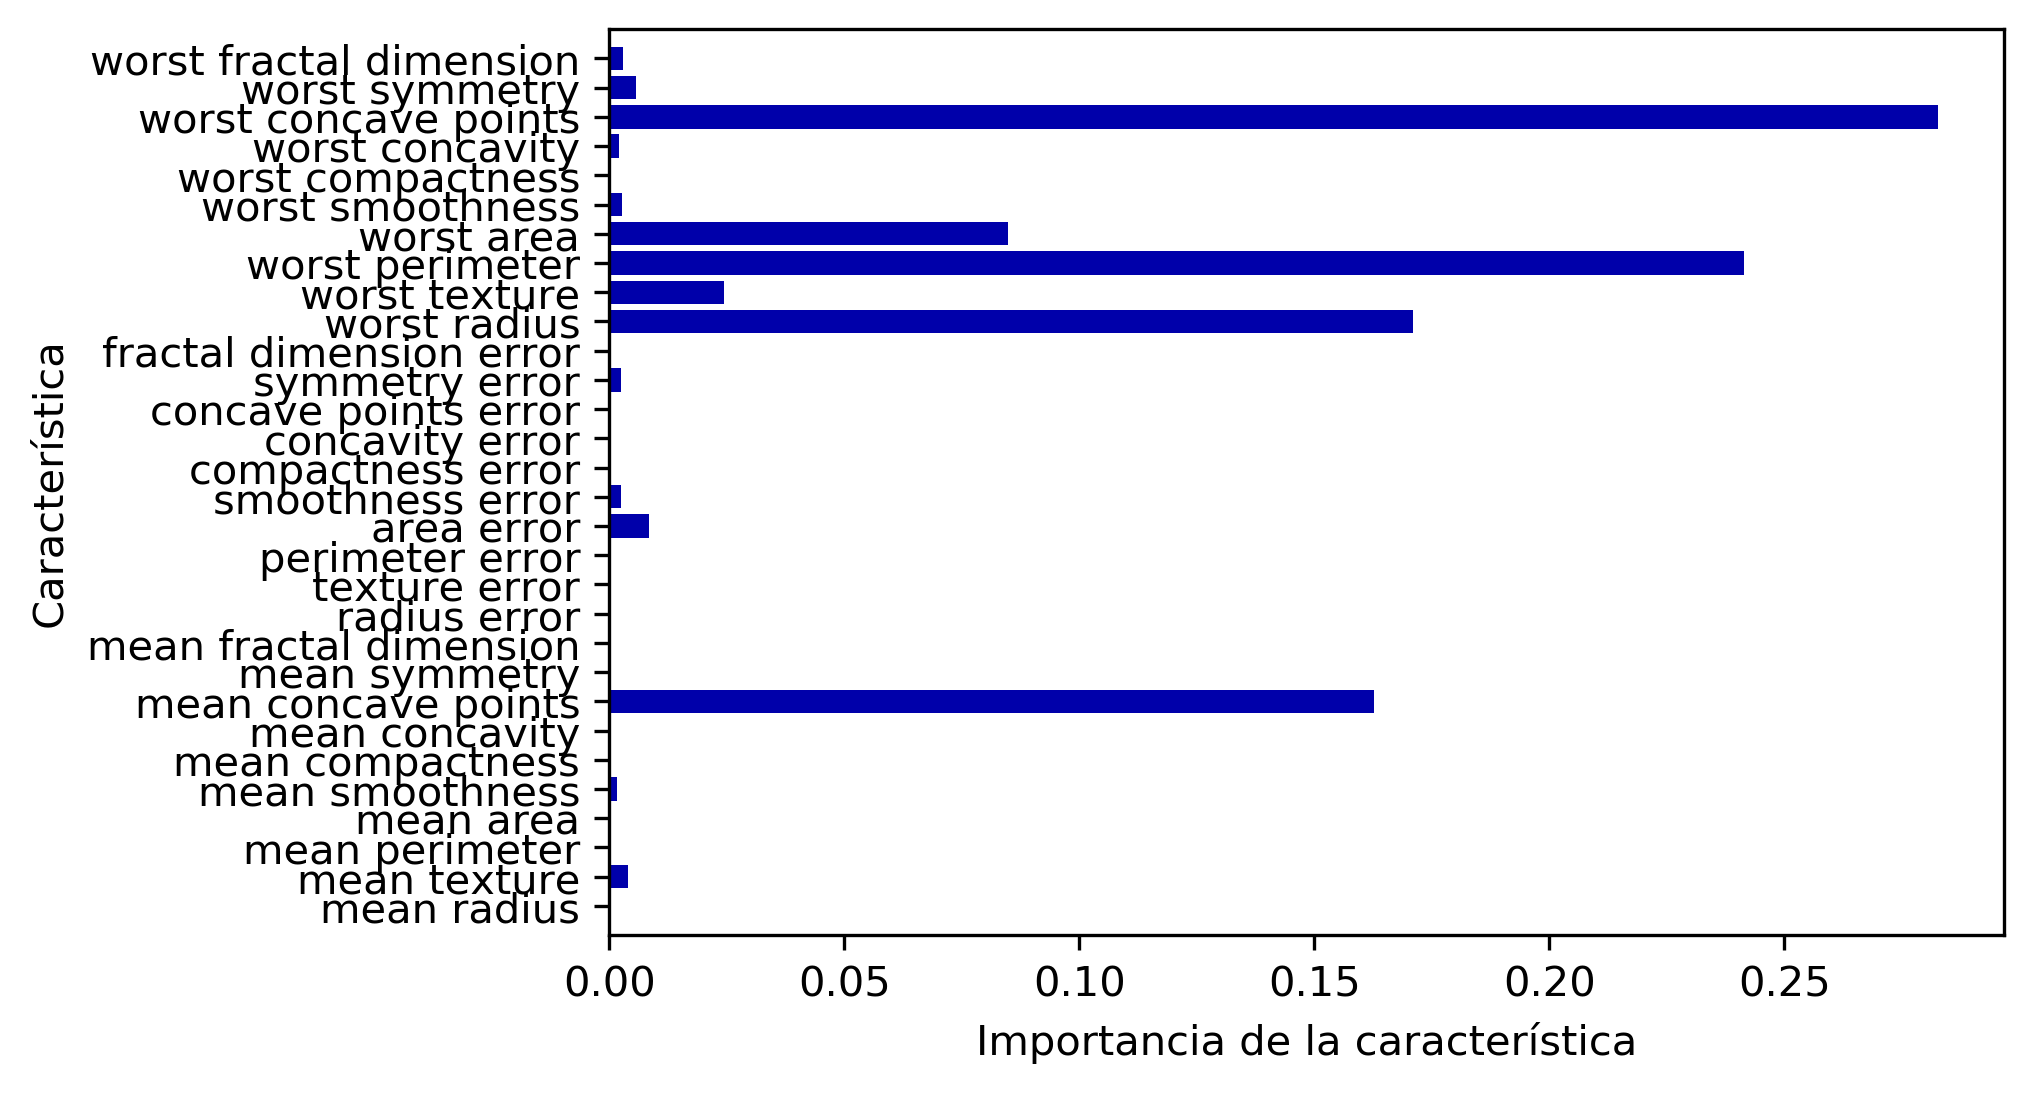

In [117]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

**Discusión**

Podemos ver que la importancia de las características es similar a la de los random forests, aunque aquí se ve que gradient boosting ignora completamente algunas de ellas.

Ya que tanto gradient boosting machines como random forests se comportan bien sobre tipos de datos parecidos, una aproximación tomada con frecuencia es probar primero un random forest, que es bastante robusto. Si el random forest funciona bien pero el tiempo que se tarda en hacer una predicción es crítico, o es importante exprimir al máximo la precisión en predicción del modelo, probar con gradient boosting suele ser de ayuda.

Si se quiere aplicar gradient boosting a problemas en gran escala, puede merecer la pena investigar algo más el paquete xgboost y su interfaz Python, que es más rápido que la implementación de Scikit-Learn para muchos datasets.

## Kernelized Support Vector Machines
### Modelos lineales con características no lineales
<font size="1"> Fuente: https://rpubs.com/Cristina_Gil/SVM </font> 

Un poco antes se han explicado los SVC o Support Vector Classifiers y cómo utilizaban los soft margin classifier. También se han explicado los SVM aplicados a clasificaciones multiclase. ¿Pero qué ocurre cuando se hacer clasificaciones binarias pero que linealmente no son separables en dos?

Una posibilidad para tratar con límites no lineales entre clases consiste en aumentar manualmente el espacio de los predictores mediante funciones polinómicas o con términos de interacción. Aun así, corremos el riesgo de acabar con demasiados predictores. Como alternativa está el uso de los support vector machines o máquinas de vector soporte (SVM), que suponen una extensión de los support vector classifiers que aumenta la dimensionalidad de una manera específica, mediante el uso de **kernels**, un enfoque computacionalmente más eficiente. Los kernels son funciones que transforman un espacio de pocas dimensiones en un espacio de dimensiones mayores mediante transformaciones complejas de los datos. 

Entre los kernels más populares para usar con SVMs se encuentran:
- Kernel lineal. El kernel lineal cuantifica la similitud de un par de observaciones usando la correlación de Pearson. Con un kernel lineal, el clasificador obtenido es equivalente a un support vector classifier.
- Kernel polinómico. Un kernel polinómico de grado d (siendo d>1) permite un límite de decisión mucho más flexible. Cuando un support vector classifier se combina con un kernel no lineal, se obtiene un support vector machine.
- Kernel radial

En cualquier caos, se debe indicar también que los modelos SVM son muy sensibles a cómo está escalado el dataset, ya que estamos midiendo con ellos distancias. Escalar es necesario en esta técnica.

Echemos un vistazo al dataset sintético que usamos para analiza la importancia de las características previamente:

Text(0, 0.5, 'Feature 1')

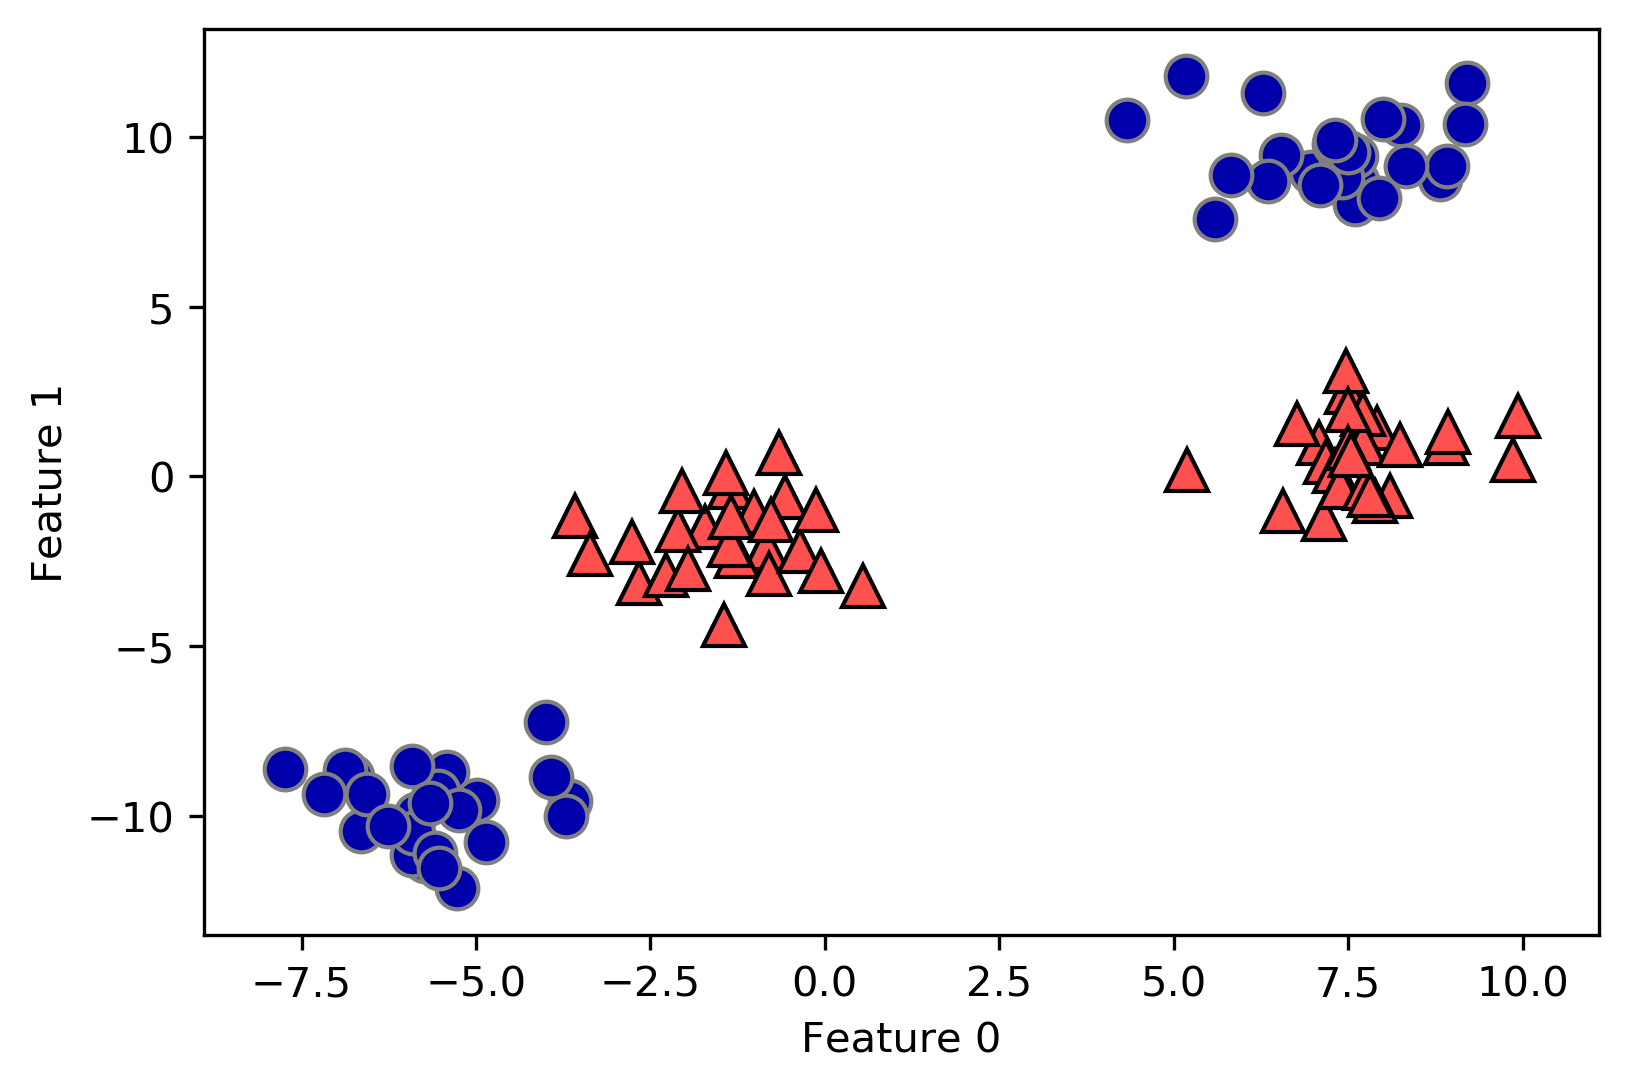

In [119]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Como se puede ver, no se puede dividir estos dos grupos con un único hiperplano lineal y hace falta recurrir al Kernel SVM.

Text(0, 0.5, 'Característica 1')

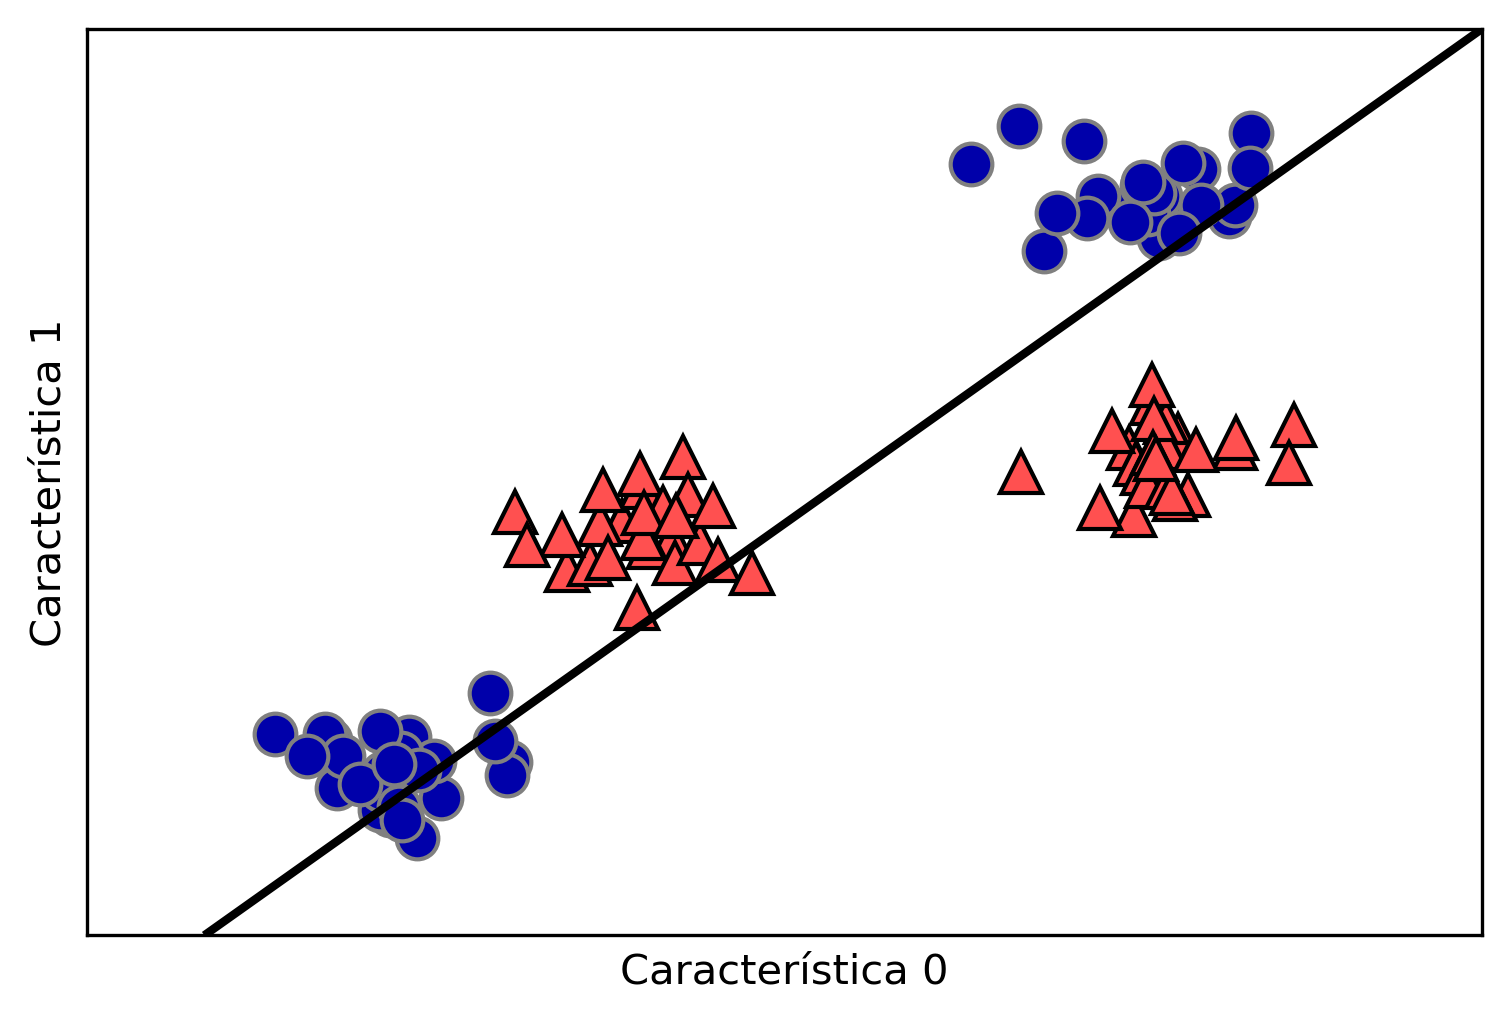

In [121]:
# Hacer una clasificación lineal sobre el dataset
from sklearn.svm import LinearSVC

lineal_svm = LinearSVC(max_iter=10000).fit(X,y)
mglearn.plots.plot_2d_separator(lineal_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

En el ejemplo de arriba la regresión lineal hace lo que puede y como se puede ver el resultado es malo.
Lo que hace lo que estamos viendo vamos a hacerlo ahora de manera manual, donde cogemos la caracteristica 1 y la elevamos al cuadrado, por lo que al tener una característica más la elevamos al cuadrado tenemos ya tenemos tres dimensiones

Extendemos la características

Text(0.5, 0, '(característica 1)ˆ2')

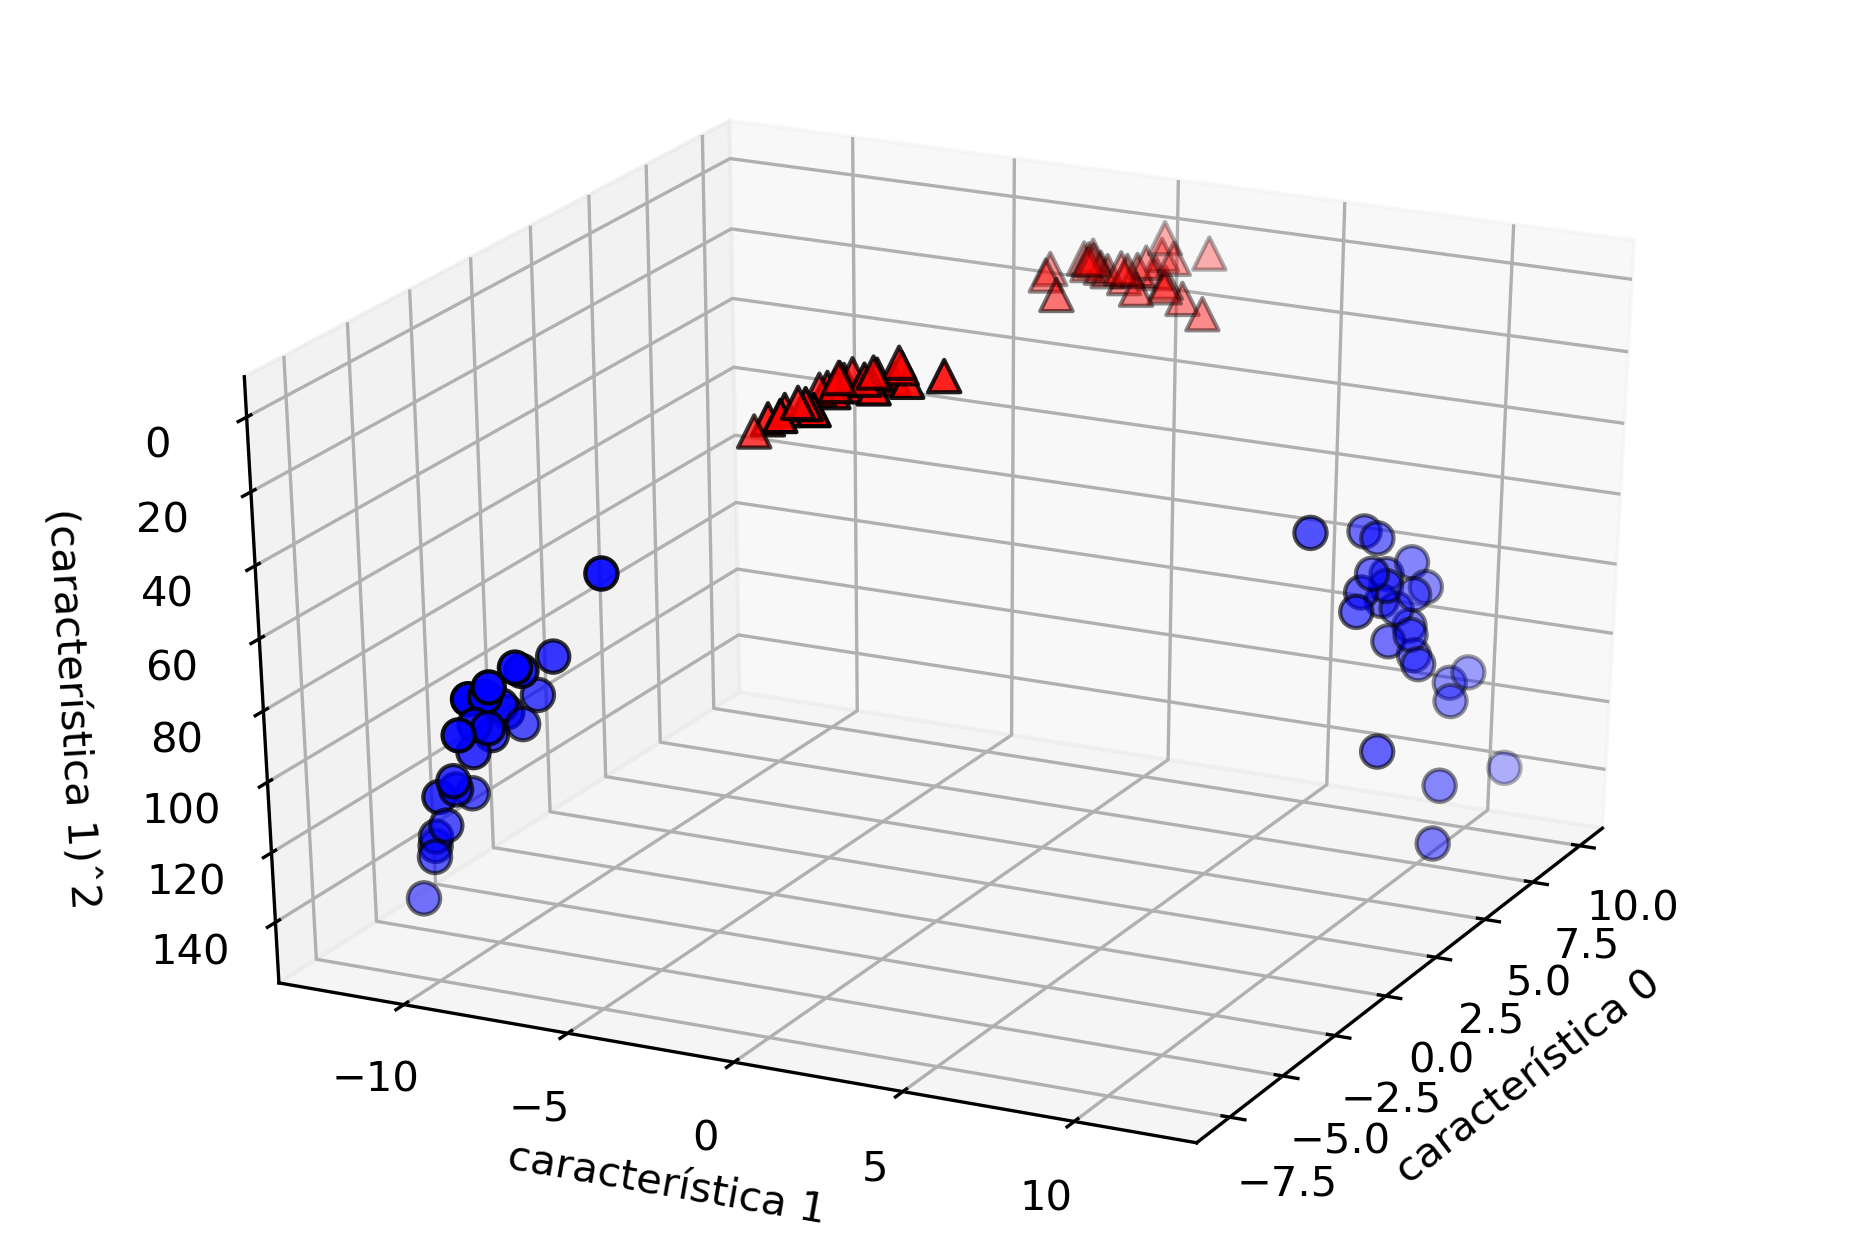

In [122]:
# Añadimos la segunda característica elevada al cuadrado
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualizamos en 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# Pintamos todos los puntos con y==0, y luego con y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("característica 0")
ax.set_ylabel("característica 1")
ax.set_zlabel("(característica 1)ˆ2")

Usamos ahora un modelo lineal

In [129]:
# Entrena de nuevo un modelo lineal
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
# Caputramos los coeficientes y el corte con los ejes
coef, intercept = linear_svm.coef_.ravel(), linear_svm_3d.intercept_ #Ravel se utiliza par aplanarlo y reconvertirlo en dimesiones

# Mostramos la frontera de decisión lineal
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Característica 0")
ax.set_ylabel("Característica 1")
ax.set_zlabel("(Característica 1)^2")

NameError: name 'linear_svm' is not defined

Text(0, 0.5, 'Característica 1')

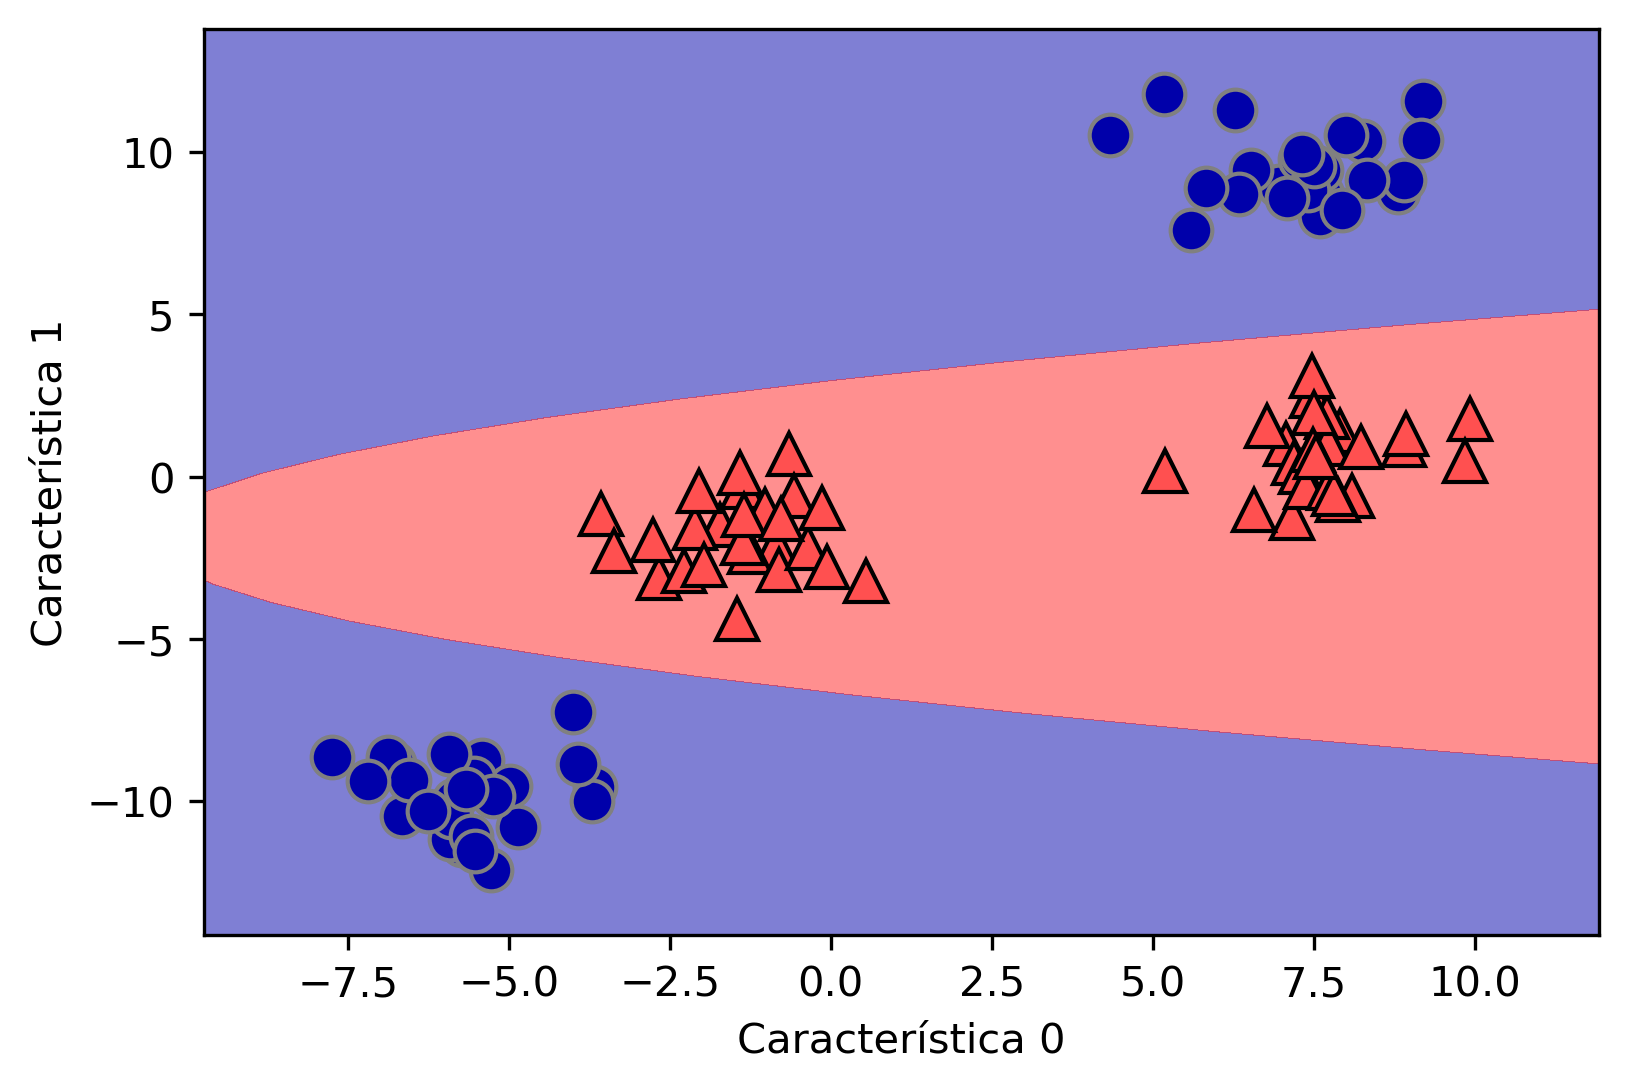

In [130]:
# Usamos la función de decisión (decision_function) sobre el modelo

# Tenemos una nueva característica más, ahora extendemos el meshgrid
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

Esta frontera de decisión en 2d si que es buena. Es la misma que la representada arriba en 3d, pero convertida en 2d

### El truco del Kernel
La lección a a aprender aquí es que la adición de características no lineales a la representación de nuestros datos puede hacer que los modelos lineales sean muchos más potentes. Sin embargo, en muchas ocasiones no sabremos qué características tenemos que añadir, y añadir tantas como todas las interacciones posibles en, por ejemplo, un espacio de 100 dimensiones, es computacionalmente muy caro.

Afortunadamente, como hemos visto en la teoría de las presentaciones, hay un truco matemático muy conveniente  que nos permite entrenar un clasificador en un espacio dimensional más alto sin la necesidad de calcular esa nueva representación de los datos. Esto es lo que hemos visto ya que se conoce con el nombre de *kernel trick*, y funciona calculando directamente la distancia (más concretamente, el producto escalar) de las muestras en la representación expandida de las características, sin tener que llegar a calcular nunca esta representación.

Hay dos maneras de hacer el mapeo de los datos a un espacio dimensional más alto que son las más utilizadas con SMVs:

 - **Un kernel polinómico**, que computa todos los posibles polinomios hasta un grado dado de las características originales (tipo (característica 1)^2 * (característica 2)^5)
 - **Un kernel RBF (Radial Basis Function)**, también conocido como kernel Gaussiano. El kernel gaussiano es un poco más complicado de explicar (lo hemos intentado en el material de presentación del curso), ya que corresponde a un espacio de características de dimensión infinita. Una manera de explicar el kernel Gaussiano es decir que considera todos los posibles polinomios de todos los grados, pero que la importancia de las características decrece conforme crece el grado polinómico.

### Análisis de Support Vector Machines

Durante el entrenamiento, SMV aprende cuán importante es cada uno de las muestras en la representación de la frontera de decisión entre las dos clases. Por norma general, sólo un subconjunto de las muestras de entrenamiento son importantes aquí: las que caen en el borde entre las dos clases, como ya hemos visto en la teoría. Éstas son las muestras que llamábamos vectores soporte y que dan a SVM su nombre.

Cuando vamos a hacer la predicción de un nuevo punto, lo que hace el modelo es medir la distancia a cada uno de los vectores soporte. La clasificación se realiza basándose en esas distancias y la importancia de las características que se aprendió durante la fase de entrenamiento (almacenada en el atributo `dual_coef_` del modelo).

Por defecto, la distancia entre las muestas se mide con el kernel Gaussiano:

$k_rbf(x_1, x_2) = e^{\gamma \left\Vert x_1 - x_2 \right\Vert ^ 2}$

En esta ecuación, $x_1$ y $x_2$ son muestras, $\left\Vert x_1 - X-2 \right\Vert$ denota la distancia euclídea, y $\gamma$ es un parámetro que controla la anchura del kernel Gaussiano.

A continuación se muestra el resultado del entrenamiento de SVM en un dataset bidimensional (*Forge* dataset). La frontera de decisión se muestra en negro, y los vectores soporte están remarcados:

Text(0, 0.5, 'Característica 1')

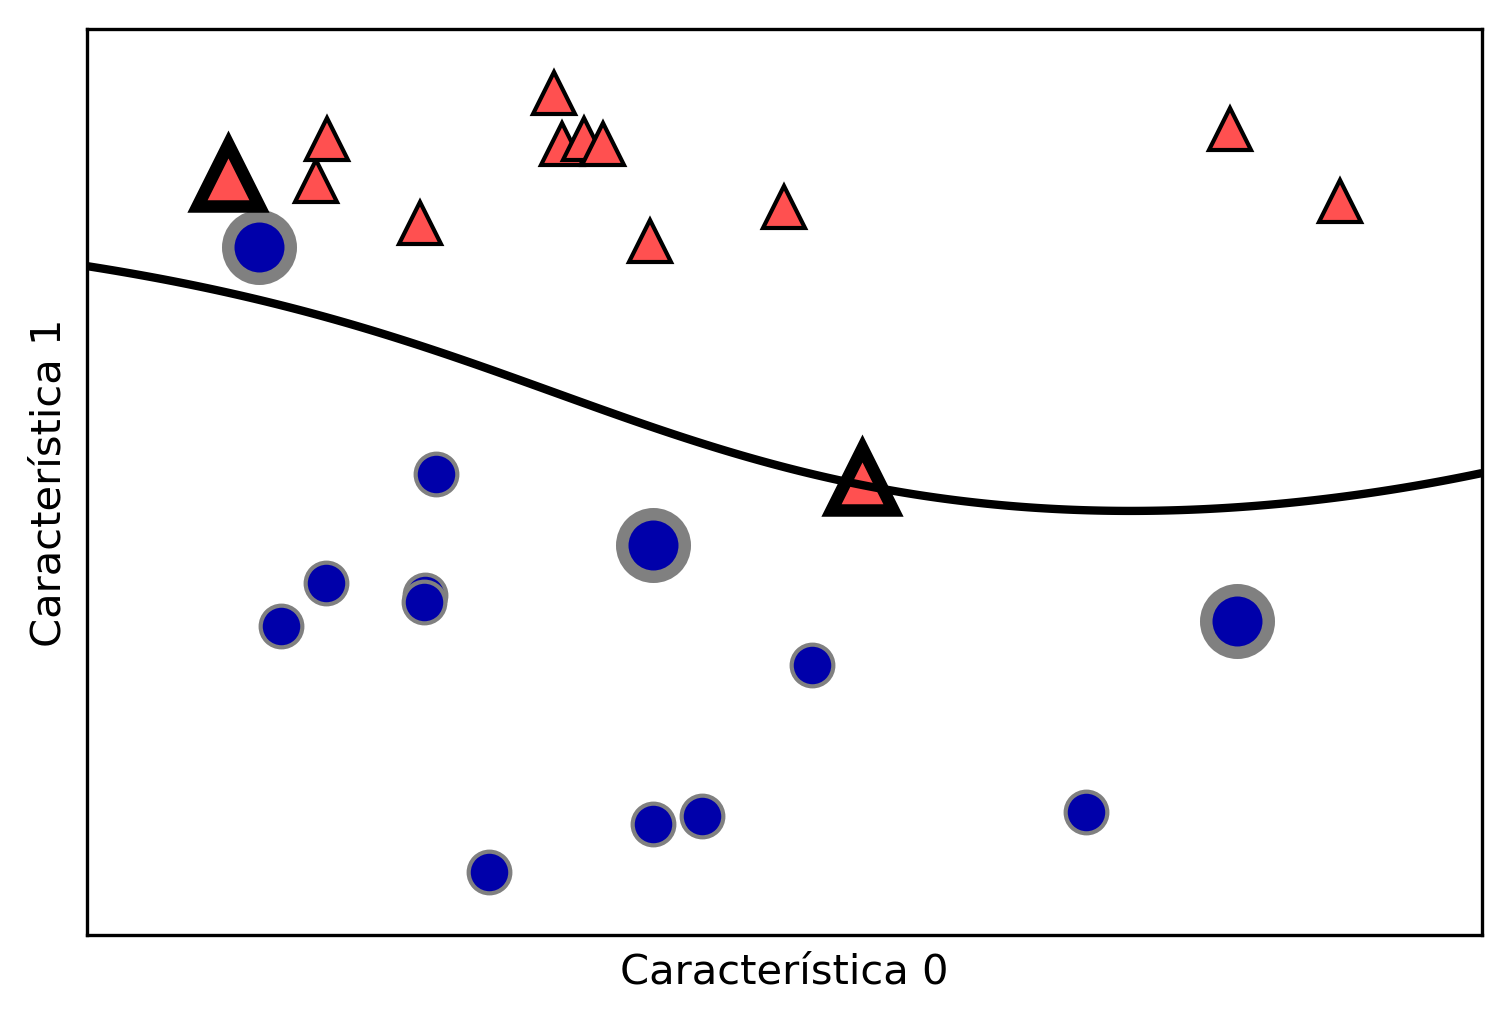

In [132]:
# Importamos SVC desde el módulo svm
from sklearn.svm import SVC

# Hacemos un dataset levemente modificado
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  

# Instanciamos y entrenamos un SVC con RBF, C=10 y gamma=0.1
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

# Pintamos el separador
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Pintamos los vectores soporte
sv = svm.support_vectors_
# Las etiquetas de clase de los vectores vienen dadas por el signo de dual_coef
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

En este caso, SMV produce una curva suave. Hemos ajustado dos parámetros, $C$ y $\gamma$, que vamos a ver ahora en detalle:


### Ajuste de los parámetros de SVM

El parámetro $\gamma$ es el que hemos mostrado en la fórmula anterior, y controla la anchura del kernel Gaussiano. Esto es básicamente determinar la escala de qué significa que dos puntos esté juntos. El parámetro $C$ es un parámetro de regularización, similar al utilizado en los modelos lineales, que limita la importancia de cada punto (y más específicamente, el valor `dual_coef_`).

Veamos que ocurre cuando vamos variando estos parámetros:

Vamos a ir variando $\gamma$ y $C$:

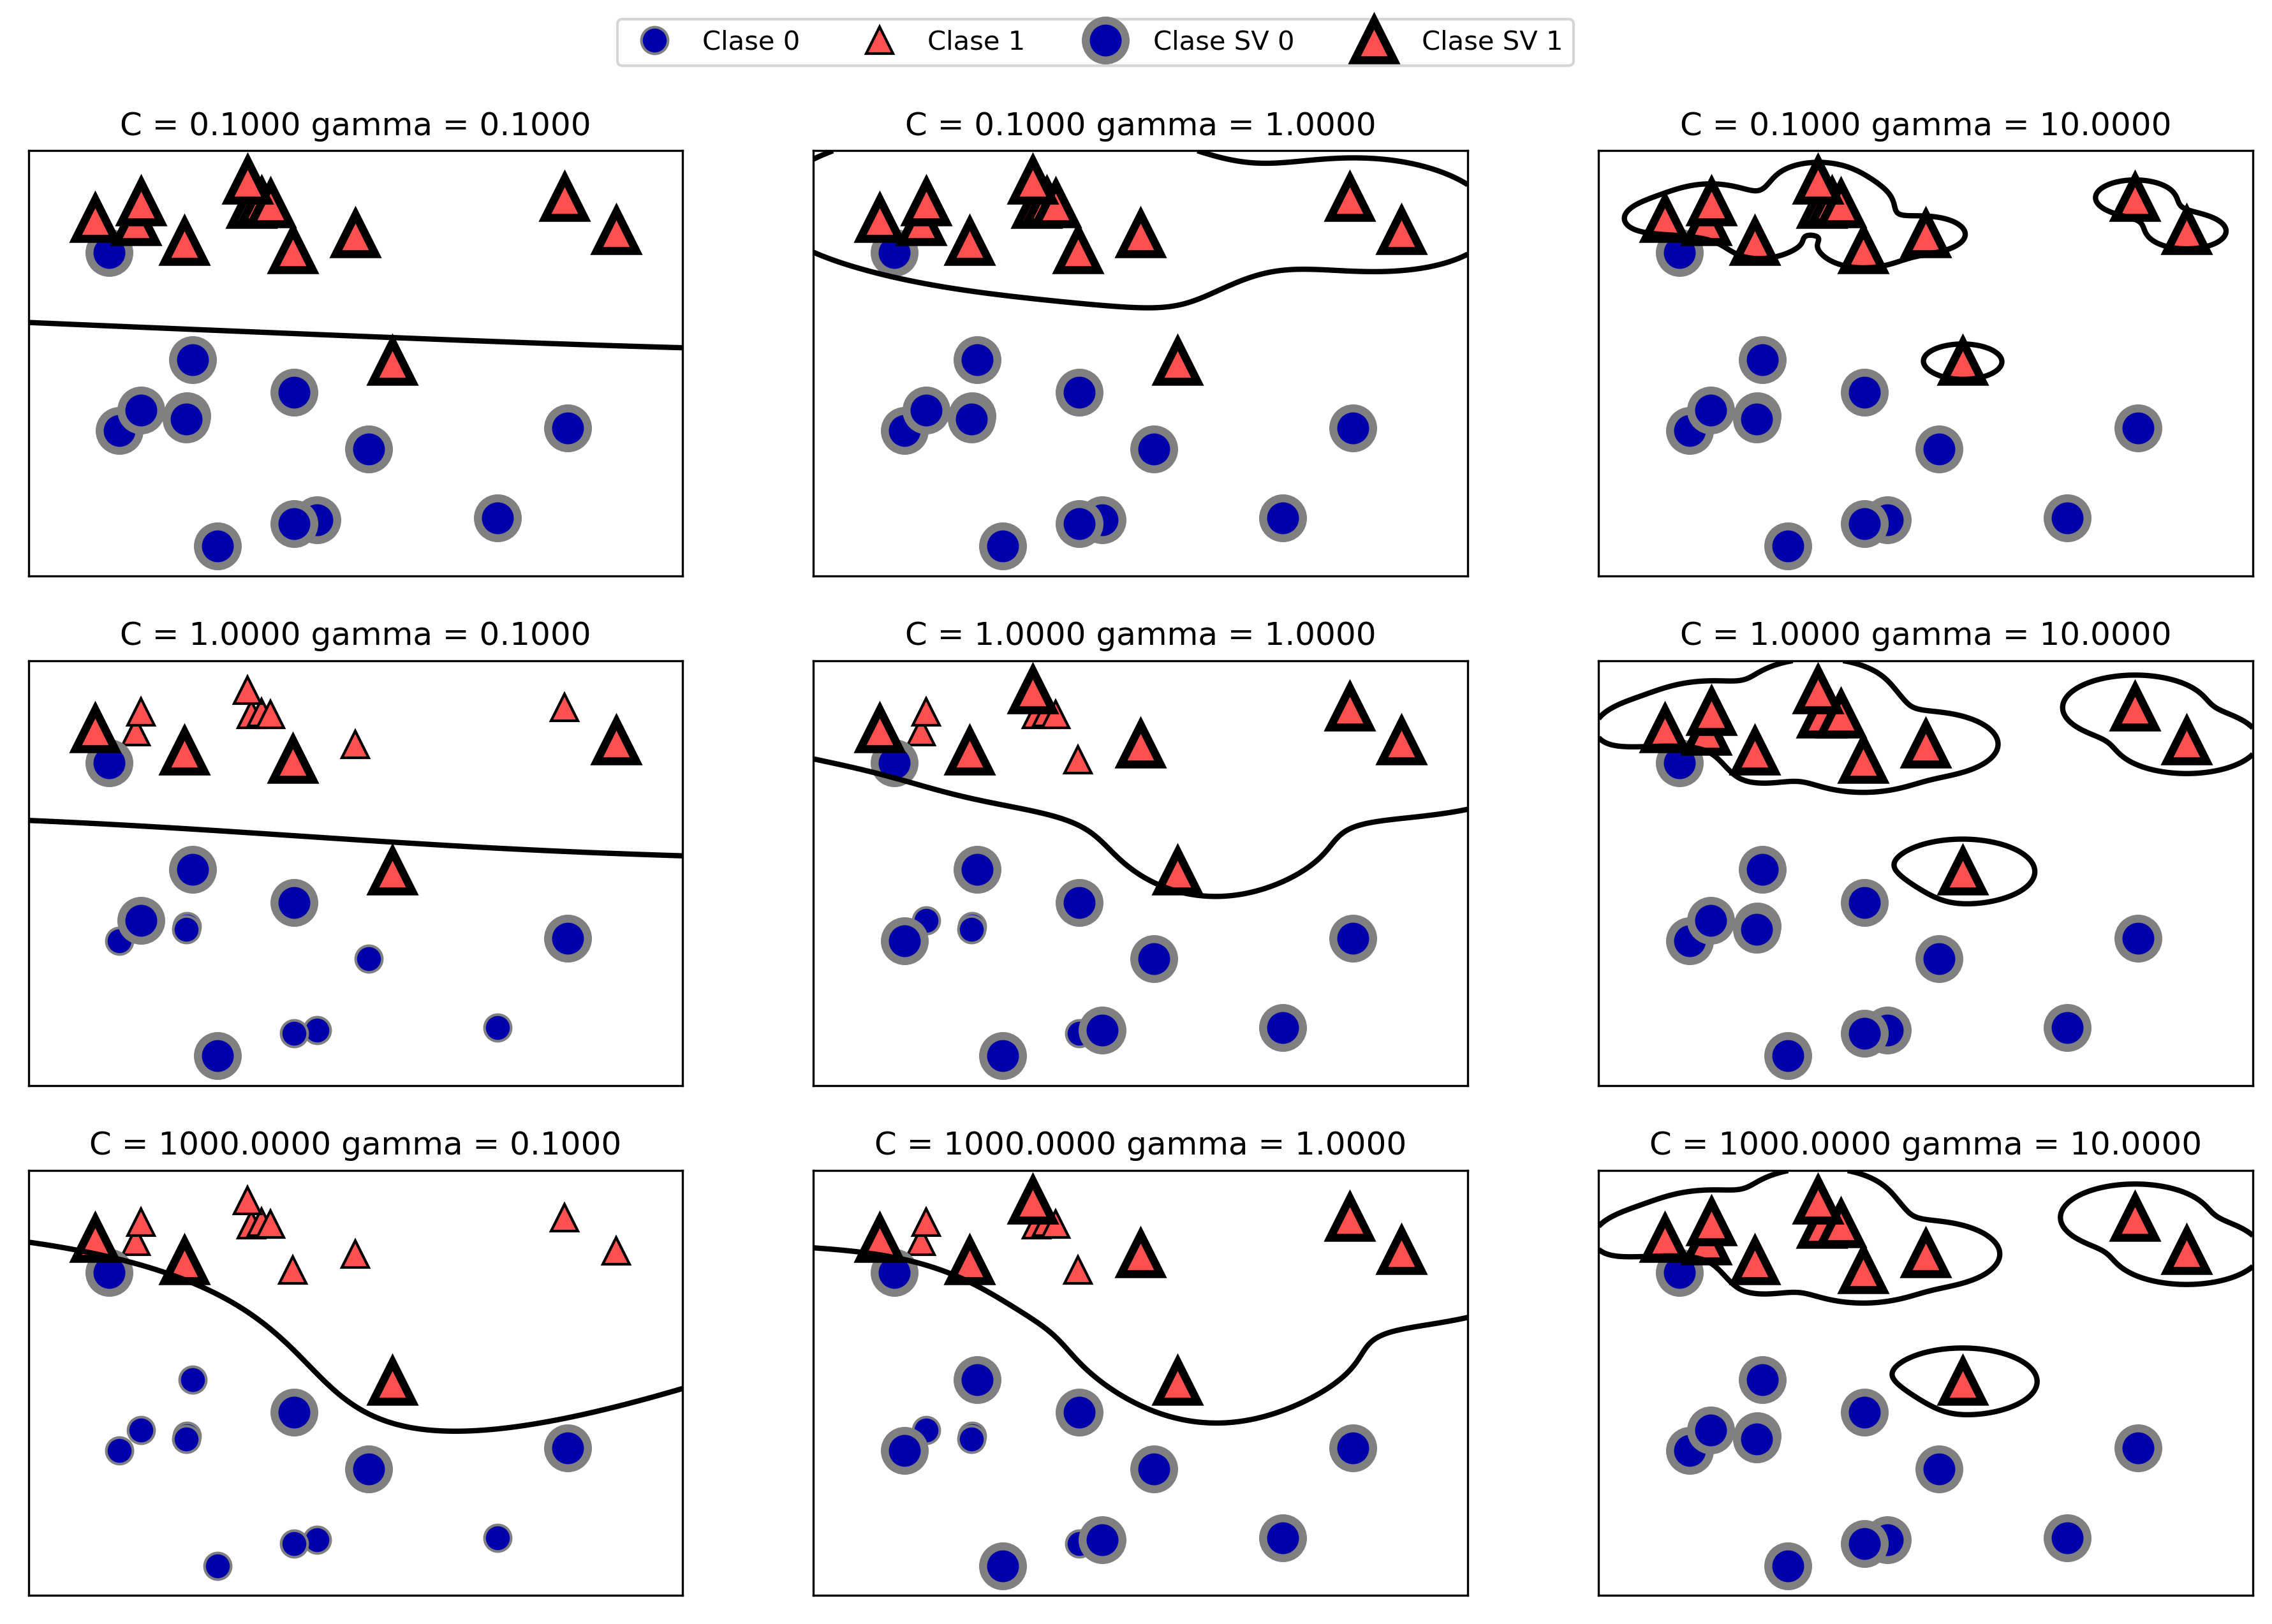

In [133]:
# Hacemos 6 subplots
fig, axes = plt.subplots(3,3, figsize=(15,10))

# Iteramos para valores de C=0.1, 1 y 1000 en filas, y gamma -1, 0, 1 en columnas
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):#Es decir, -1, 0 y 1
        # Nos apoyamos en una función ya definida para pintar los SVMs
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["Clase 0", "Clase 1", "Clase SV 0", "Clase SV 1"],
                  ncol=4, loc=(.9, 1.2))

**Discusión**

Yendo de izquierda a derecha, vamos incrementando el valor del parámetro $\gamma$ de 0.1 a 10. Un $\gamma$ pequeño implica un radio grande para el kernel Gaussiano, que significa que son muchos puntos los que se consideran en proximidad. Esto se refleja en fronteras de decisión más suaves a la izquierda, y más enfocadas en muestras concretas a medida que nos vamos moviendo a la derecha. Un valor bajo de $\gamma$ significa que la frontera de decisión variará lentamente, lo cual genera un modelo de baja complejidad, mientras que un valor alto de gamma generará modelos más complejos.

Yendo de arriba a abajo, incrementamos el valor del parámetro $C$ de 0.1 a 1000. Como en el caso de los modelos lineales, una $C$ pequeña implica un modelo muy restringido, donde cada punto de datos puede tener puede tener sólo una influencia muy limitada. Esto se puede arriba a la izquierda, donde la frontera de decisión parece casi lineal, con las muestras mal clasificadas apenas teniendo ninguna influencia sobre la línea. Al incrementar $C$, como ocurre en los gráficos de abajo, se permite que estos puntos tengan una influencia más fuerte sobre el modelo y esto provoca que la frontera de decisión se adapte para clasificarlos correctamente.

Apliquemos ahora SVM con kernel RBF al Breast Cancer dataset. Por defecto, $C=1$ y $\gamma = \frac{1}{\mathrm{n\_features}}$:

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Partimos en test y training
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

# Instanciamos y entrenamos un SVC
svc = SVC(gamma="auto").fit(X_train,y_train)

# Mostramos las precisiones
print("Precisión training: ", svc.score(X_train,y_train))
print("Precisión test: ", svc.score(X_test,y_test))

Precisión training:  1.0
Precisión test:  0.6293706293706294


**Discusión**

El modelo sobreajusta bastante, con una precisión perfecta en el training set y sólo un 63% de precisión en el test set. Aunque los modelos SVM se comportan muy bien, son muy sensibles al ajuste de los parámetros y al escalado de los datos. En particular, requieren que todas las características varíen dentro de una escala similar.

Echemos un vistazo a los valores mínimos y máximos de cada característica, graficados en espacio logarítmico:

Text(0, 0.5, 'Magnitud de la característica')

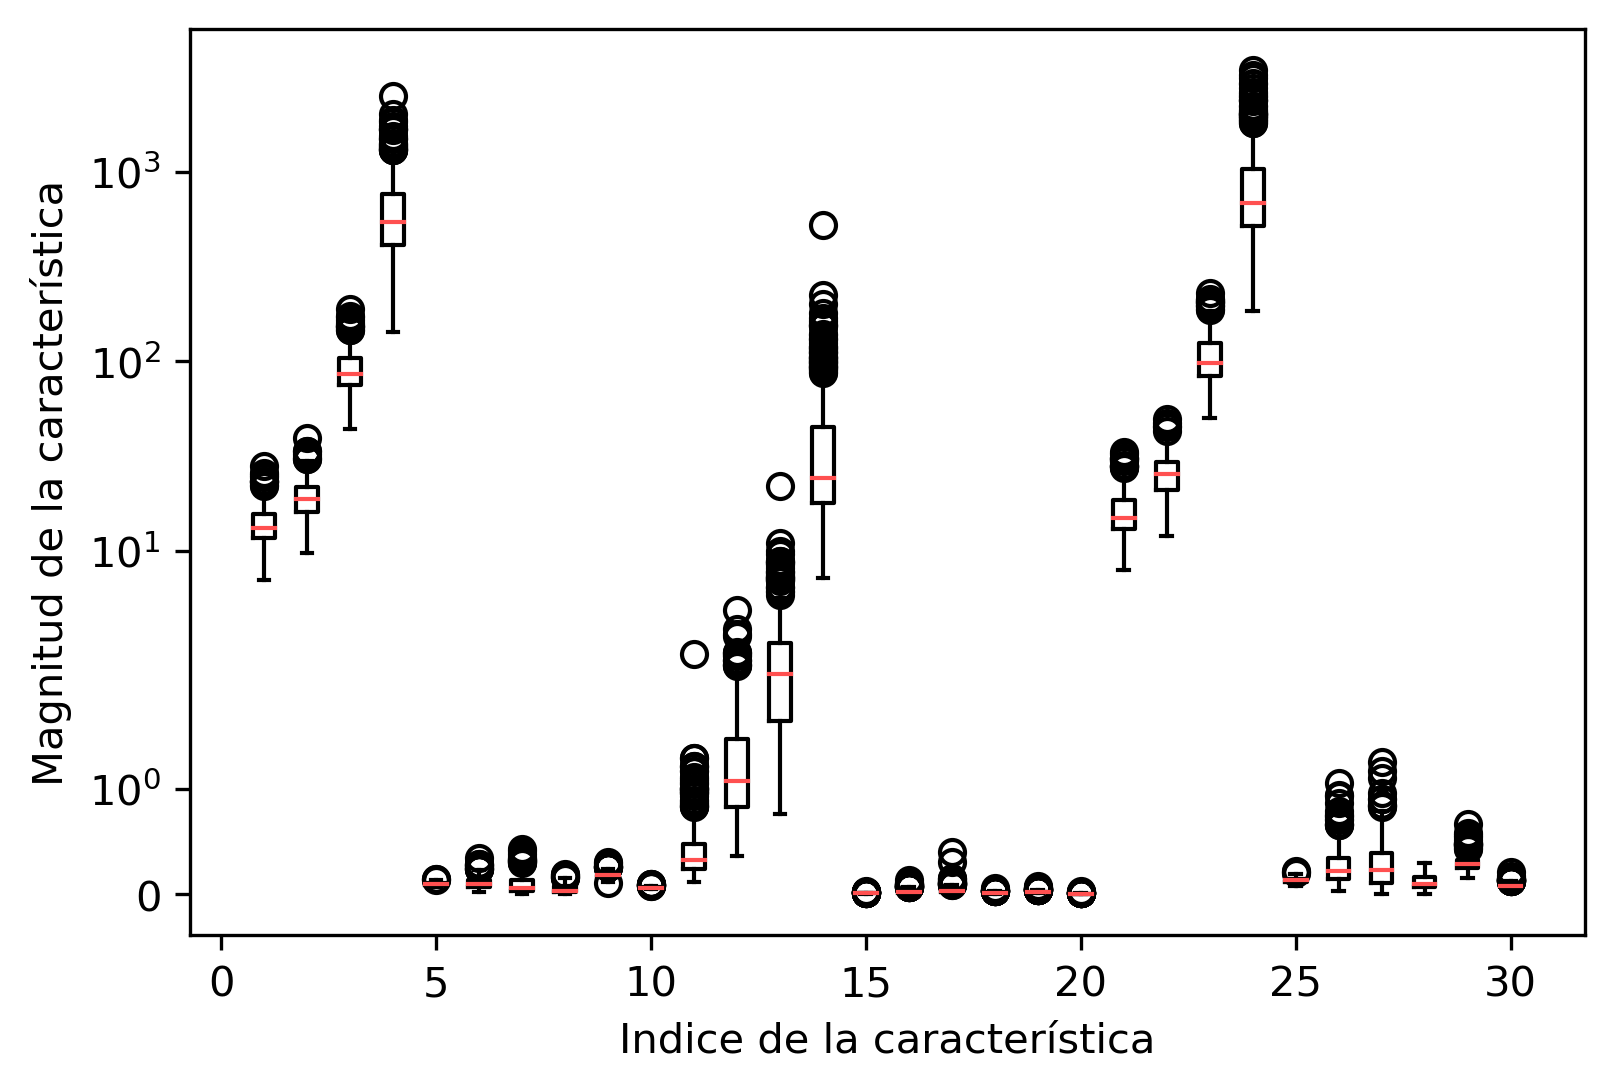

In [136]:
# Usamos un boxplot para mostrarlos
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Indice de la característica")
plt.ylabel("Magnitud de la característica")

**Discusión**
A partir de este gráfico podemos ver que las características en el Breast Cancer dataset son de órdenes de magnitud diferentes. Esto, que ya puede ser problemático para otros modelos (por ejemplo, modelos lineales), es devastador para kernel SVMs. 

Veamos algunas maneras de tratar con este problema.

### Preprocesado de datos para SVMs

Una manera de resolver este problema es mediante el reescalado de cada característica, como ya se ha visto en otros ejercicios, para que todas permanezcan en el mismo rango de escala (hablamos también de esto en las [notas adicionales de clase](https://docs.google.com/document/d/1ywFwDW-M4g2Skt-gU0UQWsX6P5ITbvjTOuDl-eGchj8). Un método muy común utilizando en SVMs es escalar todas las características entre 0 y 1, lo que se puede hacer con el preprocesador `MinMaxScaler` de Scikit-Learn.

Con el ánimo de ilustrar exactamente qué hace este preprocesador, lo hacemos a continuación manualmente:

In [137]:
#Hay una librería (MinMAxScaler) pero se va a hacer manualmente
# Calculamos el valor mínimo de cada característica en el training set
min_on_training = X_train.min(axis=0)
# Calculamos el rango de cada característica (max - min) en el training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Restamos el mínimo y dividimos por el rango
# después, min=0 y max=1 para cada caracterísitca
X_train_scaled = (X_train - min_on_training) / range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

#Estoy esperando 0s y 1s aSÍ QUE ESTÁ BIEN

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [140]:
# Utilizamos la misma transformación en el test set,
# usando el mínimo y el rango del training set. See Chapter 3 (unsupervised learning) for details.
# usando el mínimo y el rango del training set.
x_test_scaled = (X_test - min_on_training) / range_on_training
print(x_test_scaled)

[[0.273 0.236 0.268 ... 0.276 0.297 0.2  ]
 [0.521 0.37  0.511 ... 0.678 0.295 0.197]
 [0.378 0.318 0.368 ... 0.512 0.275 0.195]
 ...
 [0.223 0.318 0.211 ... 0.197 0.379 0.095]
 [0.356 0.04  0.349 ... 0.42  0.261 0.164]
 [0.246 0.275 0.235 ... 0.202 0.13  0.123]]


Con estos cambios, probamos de nuevo a entrenar y evaluar el modelo:

In [145]:
# Instanciamos y entrenamos un SVC
svc = SVC(gamma="auto").fit(X_train_scaled,y_train)

# Mostramos las precisiones
print("Precisión training: ", svc.score(X_train_scaled,y_train))
print("Precisión test: ", svc.score(x_test_scaled,y_test))

Precisión training:  0.9553990610328639
Precisión test:  0.9440559440559441


Como puede verse, escalar los datos mejora enormemente los resultados. De hecho, ahora estamos en una situación de subajuste, donde ambos rendimientos de training y test son similares pero menos cercanos a 100%. Desde esta situación de partida, podemos intentar incrementar $C$ o $\gamma$ para ajustar con un modelo más complejo.

Por ejemplo:

In [154]:
# Entrena svc on C=1000
# Instanciamos y entrenamos un SVC
svc = SVC(gamma="auto", C=1000).fit(X_train_scaled,y_train)

# Mostramos las precisiones
print("Precisión training: ", svc.score(X_train_scaled,y_train))
print("Precisión test: ", svc.score(x_test_scaled,y_test))

Precisión training:  0.9882629107981221
Precisión test:  0.986013986013986
